# **Imports and CSV**

In [ ]:
!pip install git+https://github.com/oracle/Skater.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/oracle/Skater.git to /tmp/pip-req-build-bk11ih1t
  Running command git clone -q https://github.com/oracle/Skater.git /tmp/pip-req-build-bk11ih1t


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Perceptron
from timeit import timeit
from sklearn import datasets, tree
import datetime
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
import pylab 
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from graphviz import Source
from IPython.display import Image
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy import interp
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from sklearn import metrics, tree
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler, PolynomialFeatures, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
#from mlxtend.classifier import StackingClassifier
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
import scipy
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pd.set_option('display.max_columns', None)                  #para poder visualizar todas as colunas no display
pd.set_option('display.width', 1000)

pd.set_option('display.max_columns', None)                  #para poder visualizar todas as colunas no display
pd.set_option('display.width', 1000)                        # para a largura do display ser de dimensao 1000

#redwines = pd.read_csv("redwine.csv",delimiter=";")
#whitewines = pd.read_csv("whitewine.csv",delimiter=";")
redwines = pd.read_csv("/content/drive/MyDrive/IACEC - WINE/redwine.csv",delimiter=";")
whitewines = pd.read_csv("/content/drive/MyDrive/IACEC - WINE/whitewine.csv",delimiter=";")
redwines.columns = redwines.columns.str.replace(' ', '_')       # torna mais facil a utilizaçao das colunas
whitewines.columns = whitewines.columns.str.replace(' ', '_')   # torna mais facil a utilizaçao das colunas

# **Business and Data Understanding**

### Print to 50 first instances for each wine dataset

In [ ]:
print('\n')
print('Red wine dataset')
print(redwines.head(50))
print('\n')
print('White wine dataset')
print(whitewines.head(50))



Red wine dataset
    fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality
0             7.4             0.700         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1             7.8             0.880         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2             7.8             0.760         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3            11.2             0.280         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4             7.4             0.700         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
5  

### Preparing data for the dataset

In [ ]:
print('\n')
print('Number of matrix elements for red wine')
print(redwines.size)
print('Number of matrix elements for white wine')
print(whitewines.size)
print('\n')
print('Matrix dimension for red wines')
print(redwines.shape)
print('Matrix dimension for white wines')
print(whitewines.shape)
print('\n')
print("Total number of data in each attribute for red wine")
print(redwines.count())
print("Total number of data in each attribute for white wine")
print(whitewines.count())
print('\n')
print("Type of variables and amount of data in each column for red wine")
print(redwines.info())
print("\nType of variables and amount of data in each column for white wine")
print(whitewines.info())



Number of matrix elements for red wine
19188
Number of matrix elements for white wine
58776


Matrix dimension for red wines
(1599, 12)
Matrix dimension for white wines
(4898, 12)


Total number of data in each attribute for red wine
fixed_acidity           1599
volatile_acidity        1599
citric_acid             1599
residual_sugar          1599
chlorides               1599
free_sulfur_dioxide     1599
total_sulfur_dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64
Total number of data in each attribute for white wine
fixed_acidity           4898
volatile_acidity        4898
citric_acid             4898
residual_sugar          4898
chlorides               4898
free_sulfur_dioxide     4898
total_sulfur_dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
d

### Check how many null values exist

In [ ]:
nulos_red = redwines.isnull().sum()
nulos_white = whitewines.isnull().sum()
print('\n')
print('Red wine dataset')
print(nulos_red)
print('\n')
print('White wine dataset')
print(nulos_white)
print('\n')
print("There are no null values in both datasets!!!")



Red wine dataset
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


White wine dataset
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There are no null values in both datasets!!!


### Create descriptive statistics (only for numeric columns)

In [ ]:
print("\n")
print("Red Wine")
print(redwines.describe())
print("\n")
print("White Wine")
print(whitewines.describe())
print("\n")

rs = round(redwines.describe(),3)
ws = round(whitewines.describe(),3)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T



Red Wine
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density           pH    sulphates      alcohol      quality
count    1599.000000       1599.000000  1599.000000     1599.000000  1599.000000          1599.000000           1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000
mean        8.319637          0.527821     0.270976        2.538806     0.087467            15.874922             46.467792     0.996747     3.311113     0.658149    10.422983     5.636023
std         1.741096          0.179060     0.194801        1.409928     0.047065            10.460157             32.895324     0.001887     0.154386     0.169507     1.065668     0.807569
min         4.600000          0.120000     0.000000        0.900000     0.012000             1.000000              6.000000     0.990070     2.740000     0.330000     8.400000     3.000000
25%         7.100000          0.390000     0

Red Wine Statistics                                                         White Wine Statistics                                                            
                                   count    mean     std    min     25%     50%     75%      max                 count     mean     std    min      25%      50%      75%      max
fixed_acidity                     1599.0   8.320   1.741  4.600   7.100   7.900   9.200   15.900                4898.0    6.855   0.844  3.800    6.300    6.800    7.300   14.200
volatile_acidity                  1599.0   0.528   0.179  0.120   0.390   0.520   0.640    1.580                4898.0    0.278   0.101  0.080    0.210    0.260    0.320    1.100
citric_acid                       1599.0   0.271   0.195  0.000   0.090   0.260   0.420    1.000                4898.0    0.334   0.121  0.000    0.270    0.320    0.390    1.660
residual_sugar                    1599.0   2.539   1.410  0.900   1.900   2.200   2.600   15.500                4898.0    6.391   5.072  0.600    1.700    5.200    9.900   65.800
chlorides                         1599.0   0.087   0.047  0.012   0.070   0.079   0.090    0.611                4898.0    0.046   0.022  0.009    0.036    0.043    0.050    0.346
free_sulfur_dioxide               1599.0  15.875  10.460  1.000   7.000  14.000  21.000   72.000                4898.0   35.308  17.007  2.000   23.000   34.000   46.000  289.000
total_sulfur_dioxide              1599.0  46.468  32.895  6.000  22.000  38.000  62.000  289.000                4898.0  138.361  42.498  9.000  108.000  134.000  167.000  440.000
density                           1599.0   0.997   0.002  0.990   0.996   0.997   0.998    1.004                4898.0    0.994   0.003  0.987    0.992    0.994    0.996    1.039
pH                                1599.0   3.311   0.154  2.740   3.210   3.310   3.400    4.010                4898.0    3.188   0.151  2.720    3.090    3.180    3.280    3.820
sulphates                         1599.0   0.658   0.170  0.330   0.550   0.620   0.730    2.000                4898.0    0.490   0.114  0.220    0.410    0.470    0.550    1.080
alcohol                           1599.0  10.423   1.066  8.400   9.500  10.200  11.100   14.900                4898.0   10.514   1.231  8.000    9.500   10.400   11.400   14.200
quality                           1599.0   5.636   0.808  3.000   5.000   6.000   6.000    8.000                4898.0    5.878   0.886  3.000    5.000    6.000    6.000    9.000

### Histograms showing all components of white and red wine

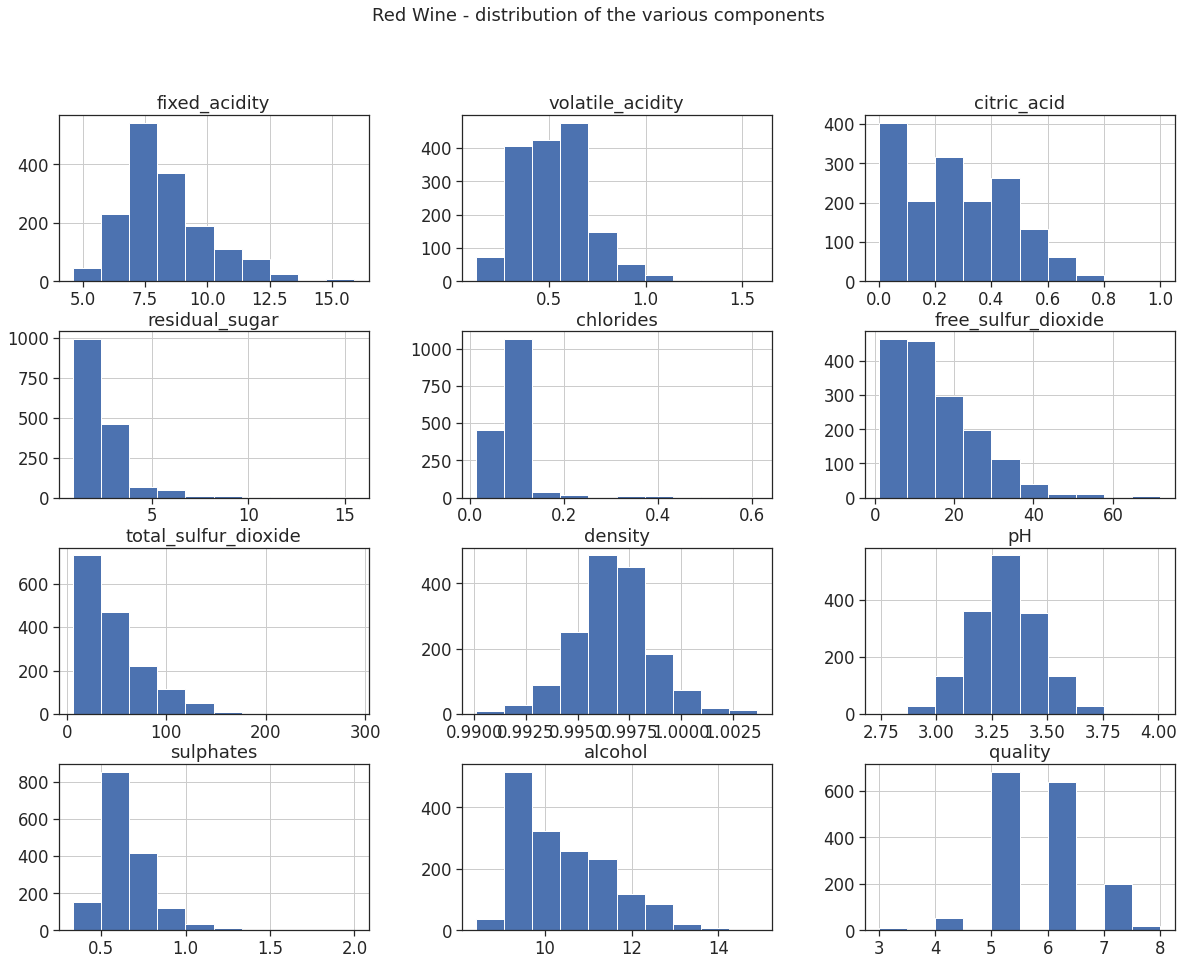

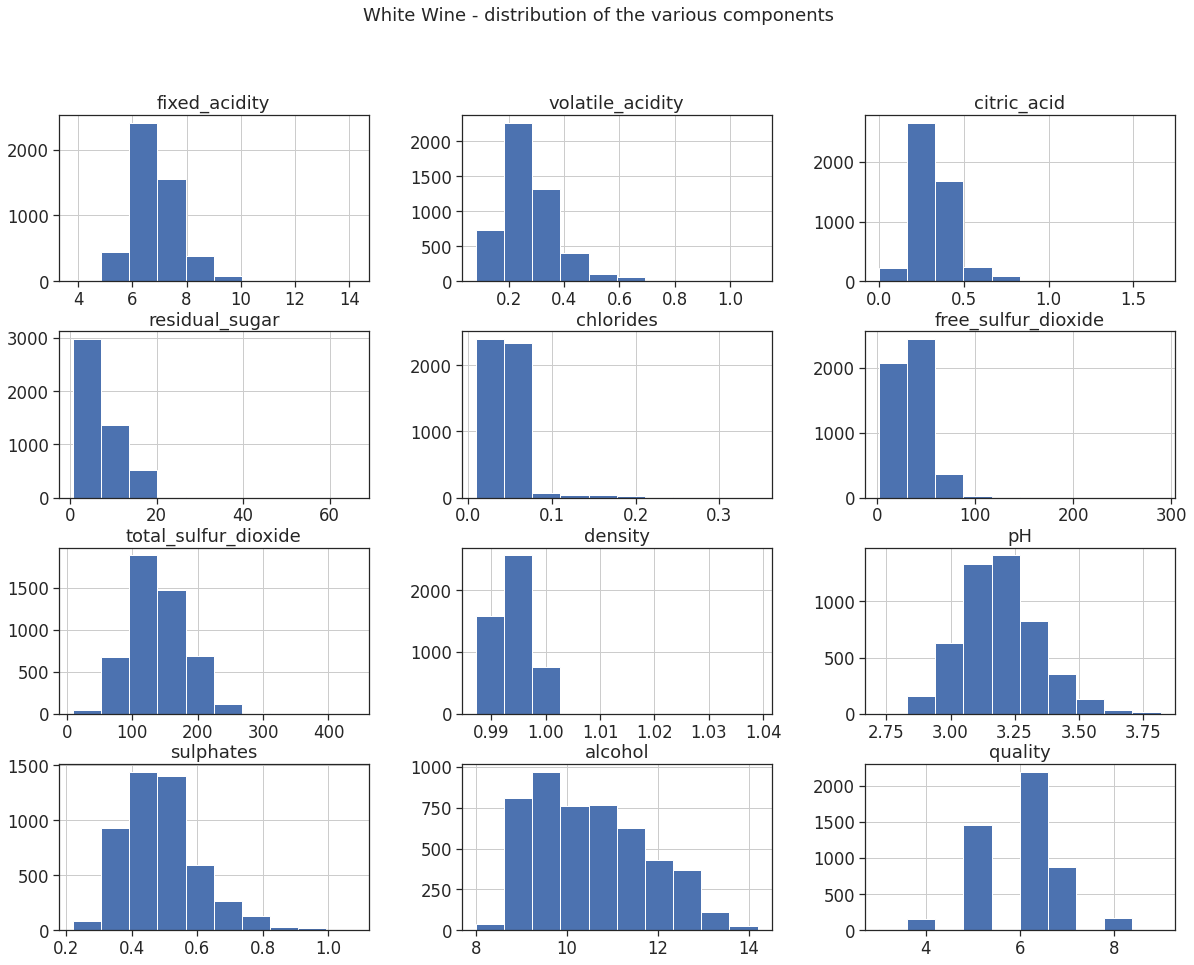

In [ ]:
redwines.hist(figsize=(20,15))
plt.suptitle('Red Wine - distribution of the various components', fontsize=18)
whitewines.hist(figsize=(20,15))
plt.suptitle('White Wine - distribution of the various components', fontsize=18)
plt.show()

### Distribution of red and white wine taking into account the quality

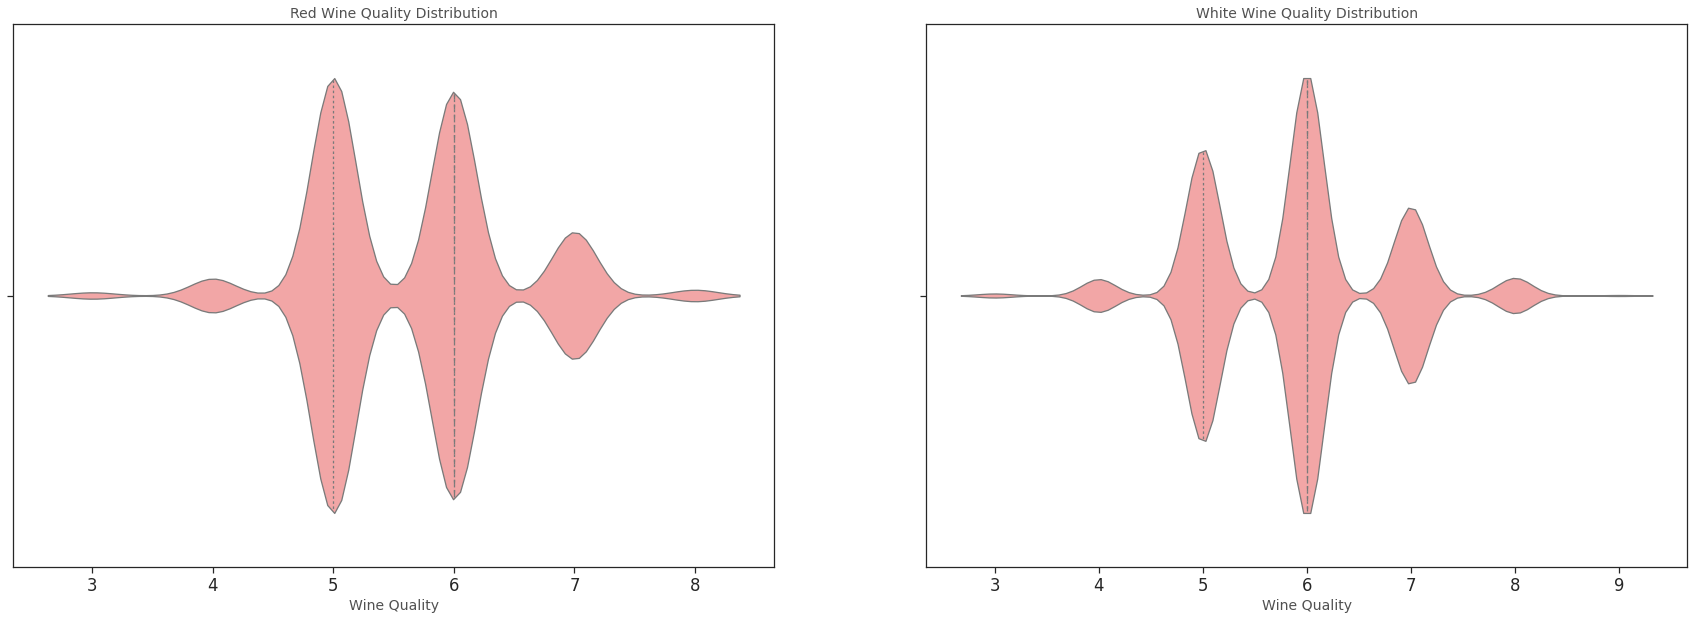

In [ ]:
my_colors = ["#FF9999", "white"]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
sns.violinplot(x='quality', data=redwines, split=True, inner='quart',
                               linewidth=1.3,
                               palette=my_colors, ax=ax1)
ax1.set_xlabel("Wine Quality", size=14, alpha=0.8)
ax1.set_title("Red Wine Quality Distribution", size=14, alpha=0.8)
sns.violinplot(x='quality', data=whitewines, split=True,
                               inner='quart', linewidth=1.3,
                               palette=my_colors, ax=ax2)
ax2.set_xlabel("Wine Quality", size=14, alpha=0.8)
ax2.set_title("White Wine Quality Distribution", size=14, alpha=0.8)
plt.show()

### Boxplots showing all components of white and red wine

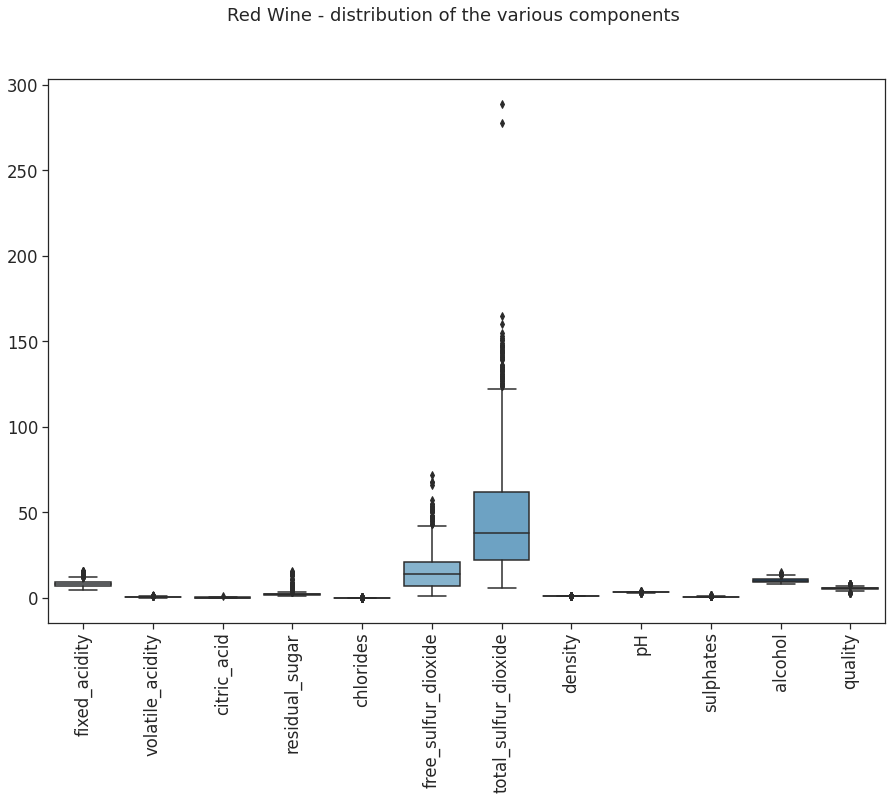

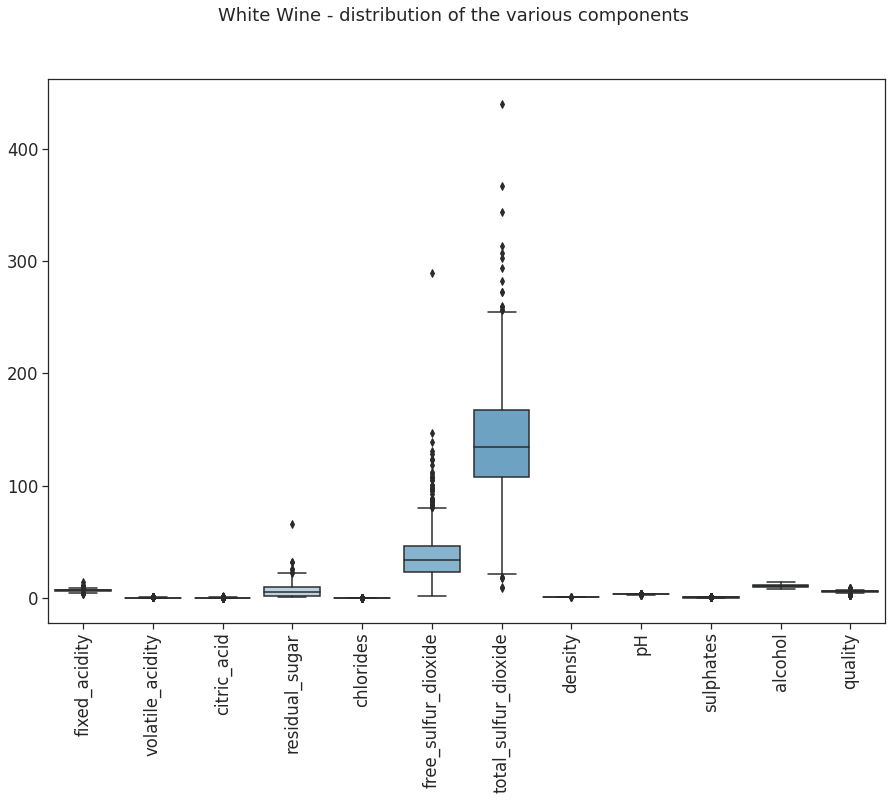

In [ ]:
plt.figure(figsize=(15, 10))
b1 = sns.boxplot(data=redwines, palette='Blues')
b1.set_xticklabels(b1.get_xticklabels(), rotation=90)
plt.suptitle('Red Wine - distribution of the various components', fontsize=18)
plt.figure(figsize=(15, 10))
b2 = sns.boxplot(data=whitewines,  palette='Blues')
b2.set_xticklabels(b2.get_xticklabels(), rotation=90)
plt.suptitle('White Wine - distribution of the various components', fontsize=18)
plt.show()

### Existing correlation between quality and the various attributes

Text(0.5, 1.0, 'HeatMap- Correlation between white wine attributes')

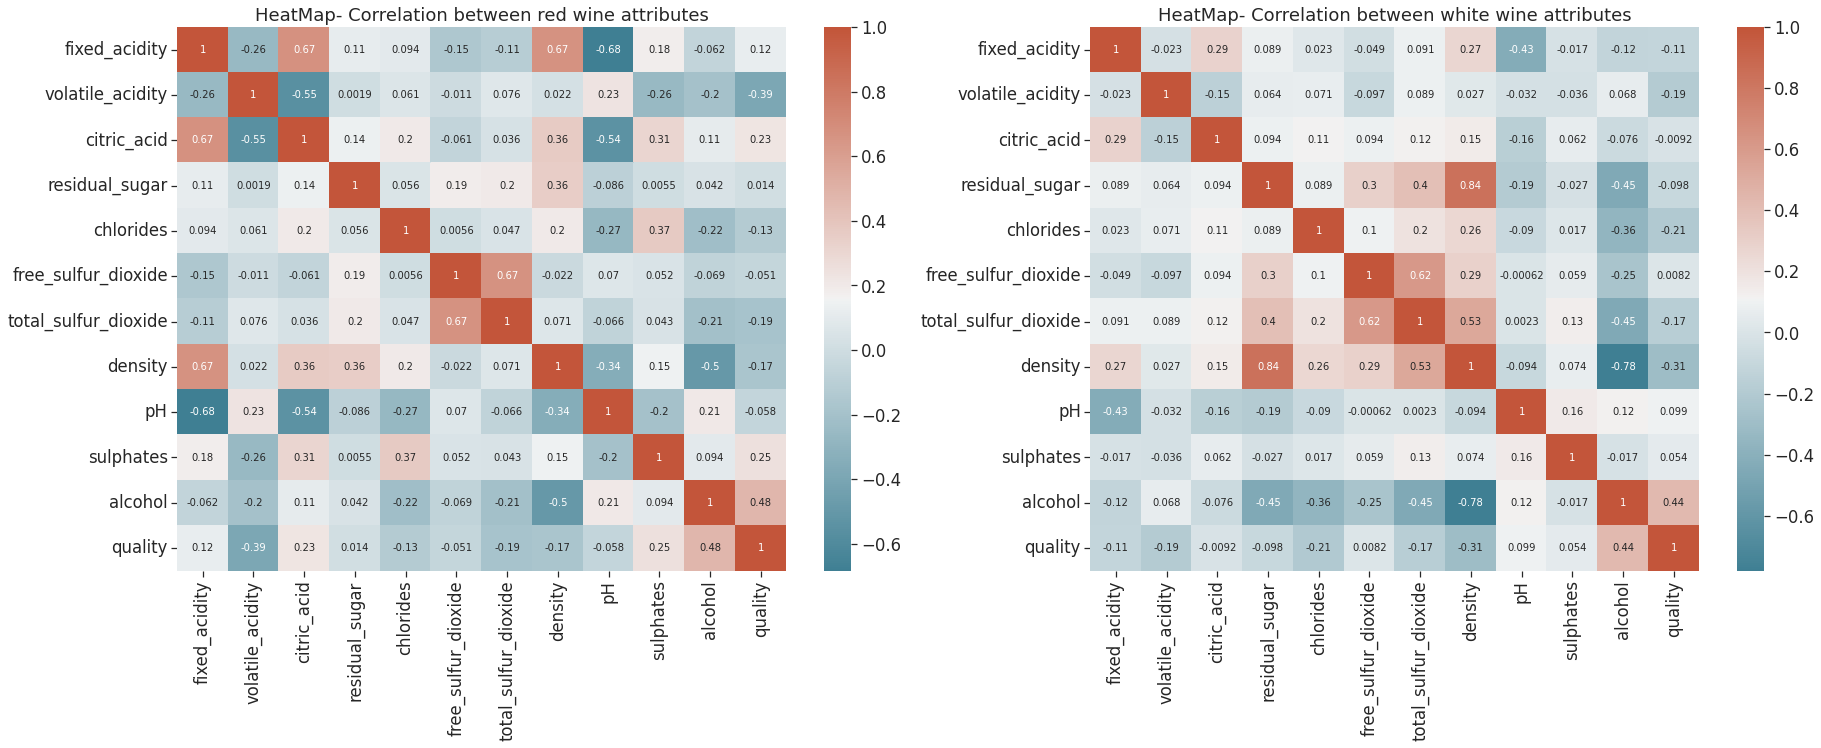

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
corr_red = redwines.select_dtypes(include=numerics).corr()
sns.heatmap(corr_red, xticklabels=corr_red.columns, yticklabels=corr_red.columns, annot=True, ax=ax1,
                            cmap=sns.diverging_palette(220, 20, as_cmap=True))
ax1.set_title('HeatMap- Correlation between red wine attributes', fontsize=18)

corr_white = whitewines.select_dtypes(include=numerics).corr()
sns.heatmap(corr_white, xticklabels=corr_white.columns, yticklabels=corr_white.columns, annot=True, ax=ax2,
                            cmap=sns.diverging_palette(220, 20, as_cmap=True))
ax2.set_title('HeatMap- Correlation between white wine attributes', fontsize=18)

### Existing covariance between quality and the various attributes



Red Wine
quality                 0.652168
alcohol                 0.409789
fixed_acidity           0.174424
citric_acid             0.035612
sulphates               0.034413
residual_sugar          0.015635
density                -0.000267
chlorides              -0.004900
pH                     -0.007198
volatile_acidity       -0.056476
free_sulfur_dioxide    -0.427907
total_sulfur_dioxide   -4.917237
Name: quality, dtype: float64


White Wine
quality                 0.784356
alcohol                 0.474726
free_sulfur_dioxide     0.122878
pH                      0.013297
sulphates               0.005425
density                -0.000814
citric_acid            -0.000987
chlorides              -0.004062
volatile_acidity       -0.017382
fixed_acidity          -0.084947
residual_sugar         -0.438316
total_sulfur_dioxide   -6.576746
Name: quality, dtype: float64


Covariances between the various attributes of red wine
                      fixed_acidity  volatile_acidity  citric_acid 

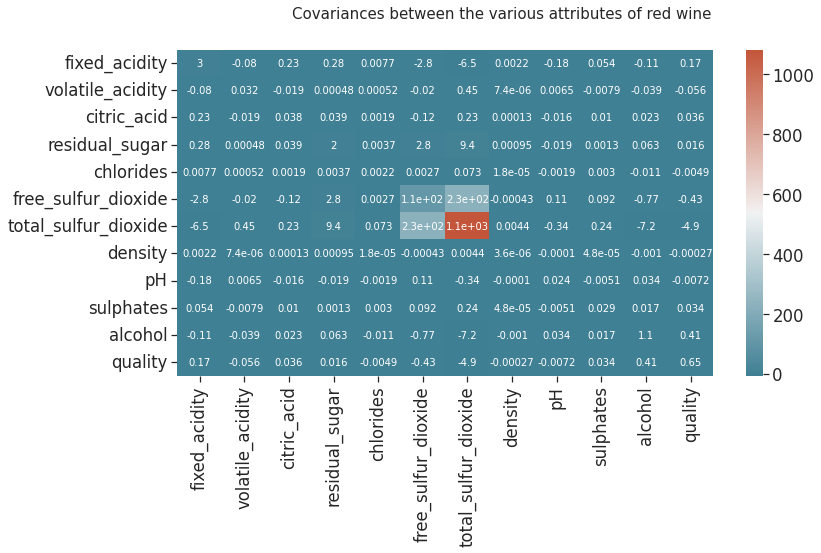

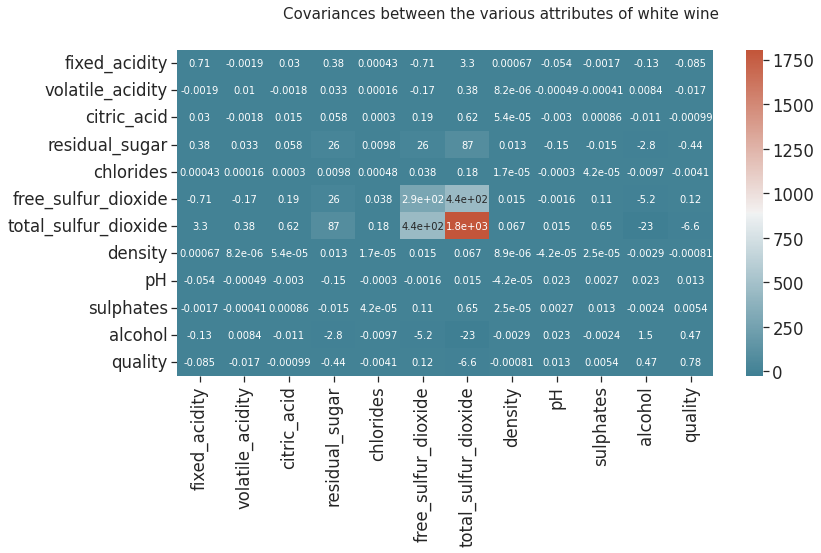

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
covarianciared = redwines.select_dtypes(include=numerics).cov()['quality'].sort_values(ascending=False)
covarianciawhite = whitewines.select_dtypes(include=numerics).cov()['quality'].sort_values(ascending=False)

print("\n")
print('Red Wine')
print(covarianciared)
print("\n")
print('White Wine')
print(covarianciawhite)

corr = redwines.select_dtypes(include=numerics).cov()
print('\n')
print('Covariances between the various attributes of red wine')
print(corr)
plt.subplots(figsize=(12, 6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
                        cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.suptitle('Covariances between the various attributes of red wine', fontsize=15)

corr1 = whitewines.select_dtypes(include=numerics).cov()
print('\n')
print('Covariances between the various attributes of white wine')
print(corr1)
plt.subplots(figsize=(12, 6))
sns.heatmap(corr1, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
                        cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.suptitle('Covariances between the various attributes of white wine', fontsize=15)
plt.show()

### Red wine boxplots - characteristics for which it had the highest correlation

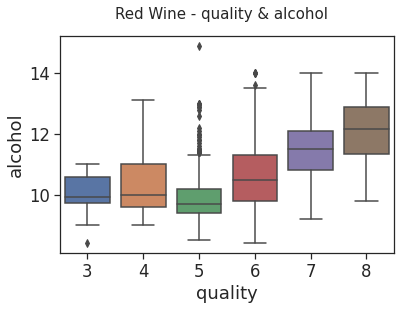

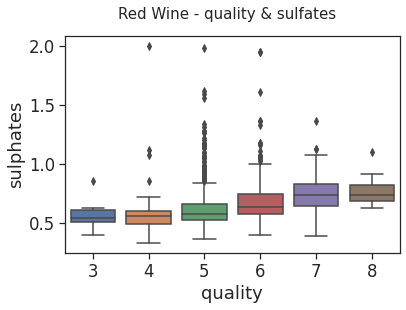

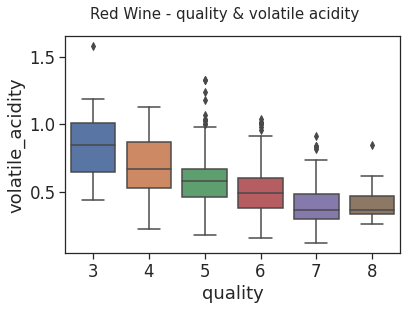

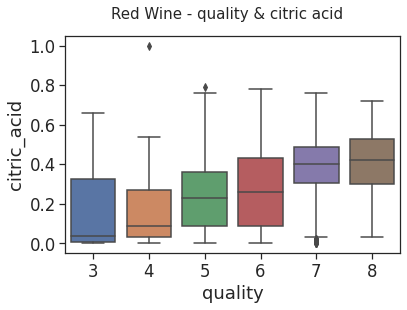

In [ ]:
plt.figure(figsize=(6, 4))
plt.suptitle('Red Wine - quality & alcohol', fontsize=15)
sns.boxplot(orient='v', data=redwines, y="alcohol", x="quality")

plt.figure(figsize=(6, 4))
plt.suptitle('Red Wine - quality & sulfates', fontsize=15)
sns.boxplot(orient='v', data=redwines, y="sulphates", x="quality")

plt.figure(figsize=(6, 4))
plt.suptitle('Red Wine - quality & volatile acidity ', fontsize=15)
sns.boxplot(orient='v', data=redwines, y="volatile_acidity", x="quality")

plt.figure(figsize=(6, 4))
plt.suptitle('Red Wine - quality & citric acid', fontsize=15)
sns.boxplot(orient='v', data=redwines, y="citric_acid", x="quality")

plt.show()

### White wine boxplots - characteristics for which it had the highest correlation

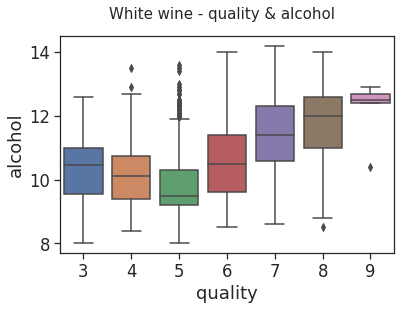

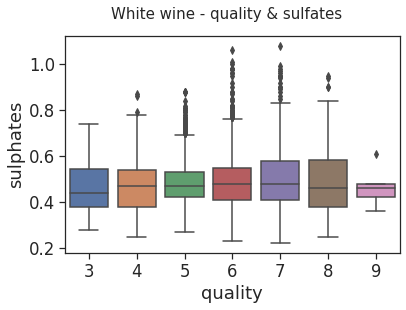

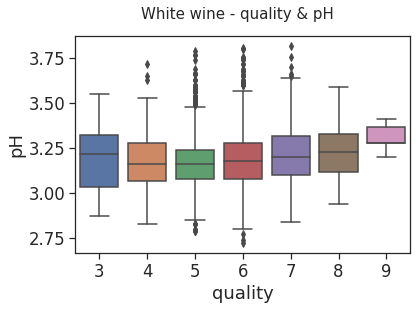

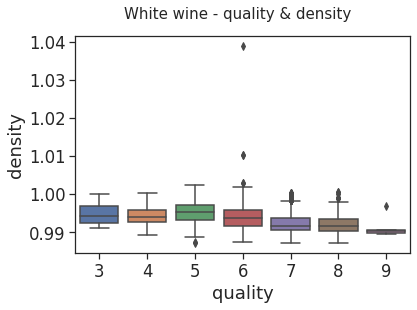

In [ ]:
plt.figure(figsize=(6, 4))
plt.suptitle('White wine - quality & alcohol', fontsize=15)
sns.boxplot(orient='v', data=whitewines, y="alcohol", x="quality")

plt.figure(figsize=(6, 4))
plt.suptitle('White wine - quality & sulfates', fontsize=15)
sns.boxplot(orient='v', data=whitewines, y="sulphates", x="quality")

plt.figure(figsize=(6, 4))
plt.suptitle('White wine - quality & pH', fontsize=15)
sns.boxplot(orient='v', data=whitewines, y="pH", x="quality")

plt.figure(figsize=(6, 4))
plt.suptitle('White wine - quality & density', fontsize=15)
sns.boxplot(orient='v', data=whitewines, y="density", x="quality")

plt.show()

### Red Wine Regplots - express interesting correlations between different components

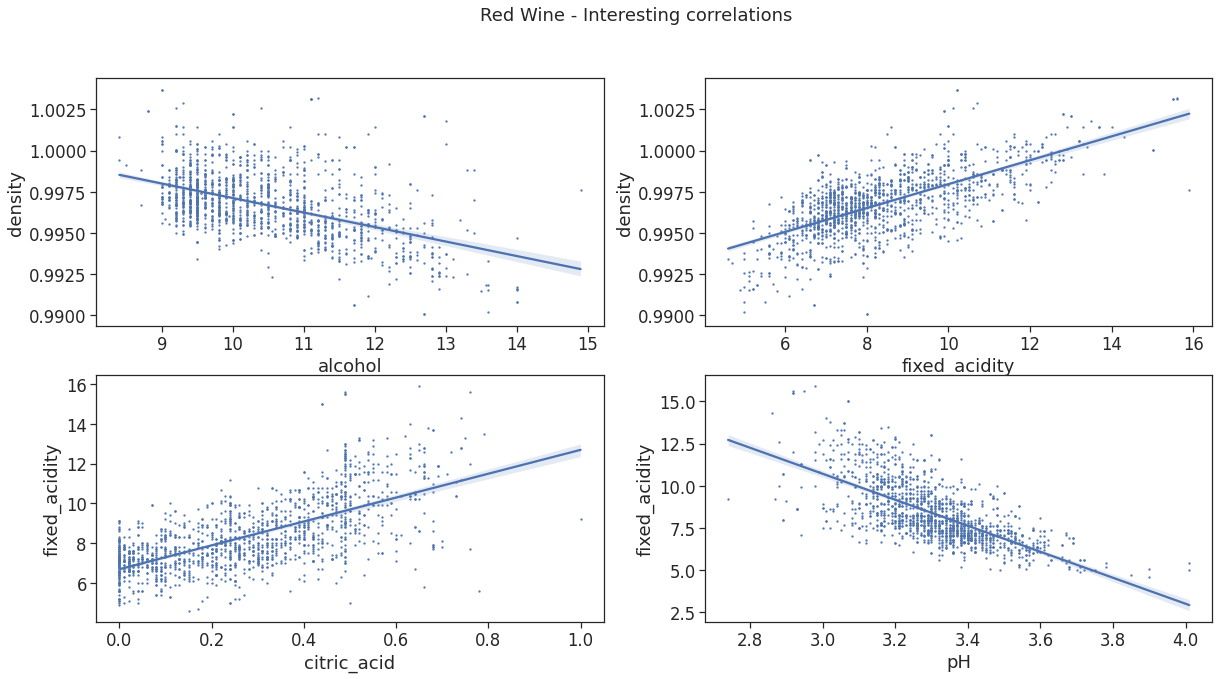

In [ ]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.regplot(x="alcohol", y="density", data=redwines, ax=ax1, scatter_kws={'s': 2})
sns.regplot(x="fixed_acidity", y="density", data=redwines, ax=ax2, scatter_kws={'s': 2})
sns.regplot(x="citric_acid", y="fixed_acidity", data=redwines, ax=ax3, scatter_kws={'s': 2})
sns.regplot(x="pH", y="fixed_acidity", data=redwines, ax=ax4, scatter_kws={'s': 2})
plt.suptitle("Red Wine - Interesting correlations",fontsize=18)
plt.show()

### White Wine Regplots - express interesting correlations between different components

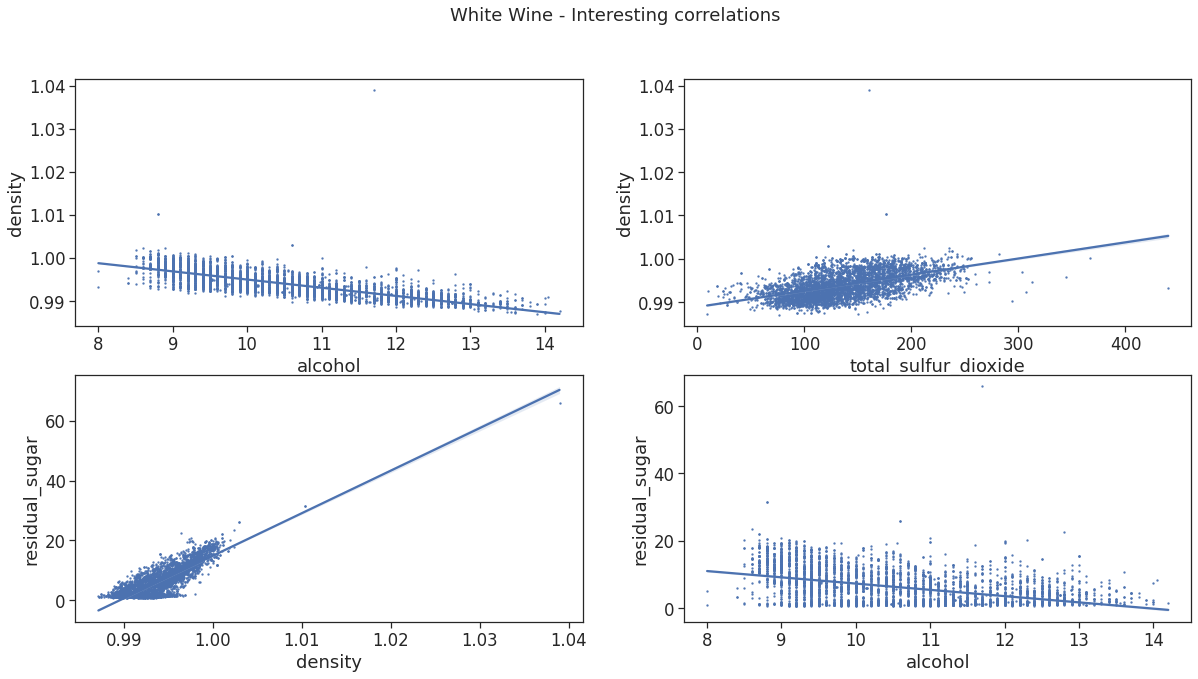

In [ ]:
fig, ((ax1, ax2) , (ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.regplot(x="alcohol", y="density", data=whitewines,ax=ax1, scatter_kws={'s': 2})
sns.regplot(x="total_sulfur_dioxide", y="density", data=whitewines, ax=ax2, scatter_kws={'s': 2})
sns.regplot(x="density", y="residual_sugar", data=whitewines, ax=ax3, scatter_kws={'s': 2})
sns.regplot(x="alcohol", y="residual_sugar", data=whitewines, ax=ax4, scatter_kws={'s': 2})
plt.suptitle("White Wine - Interesting correlations",fontsize=18)
plt.show()

### ScatterPlot matrix for red and white wines

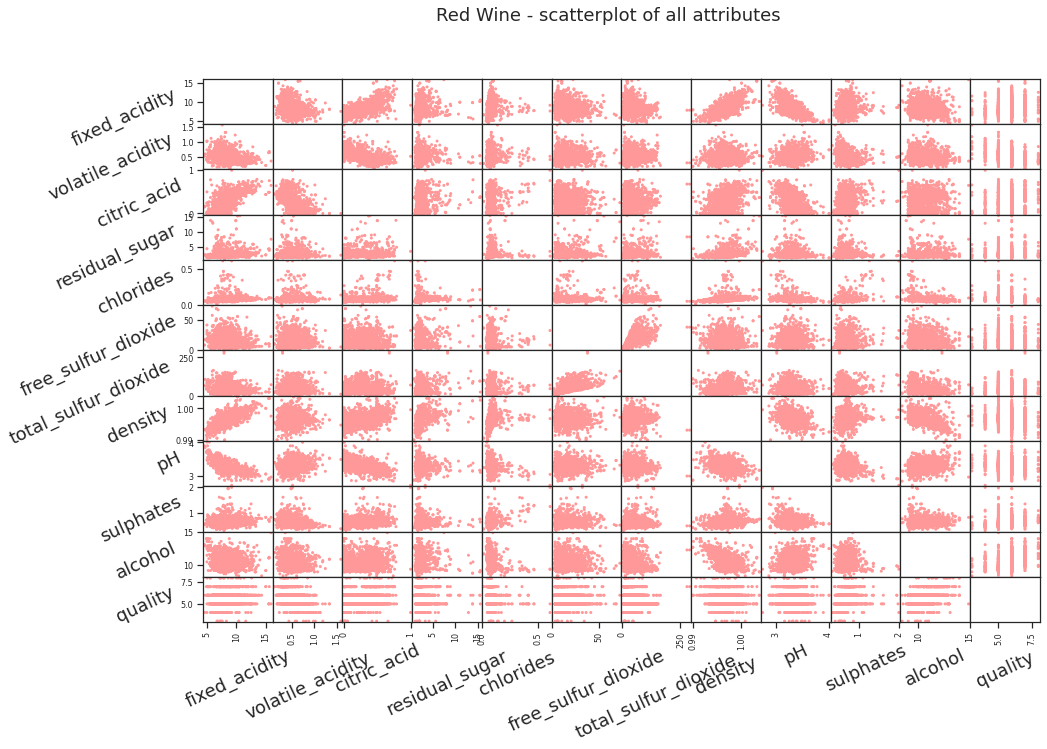

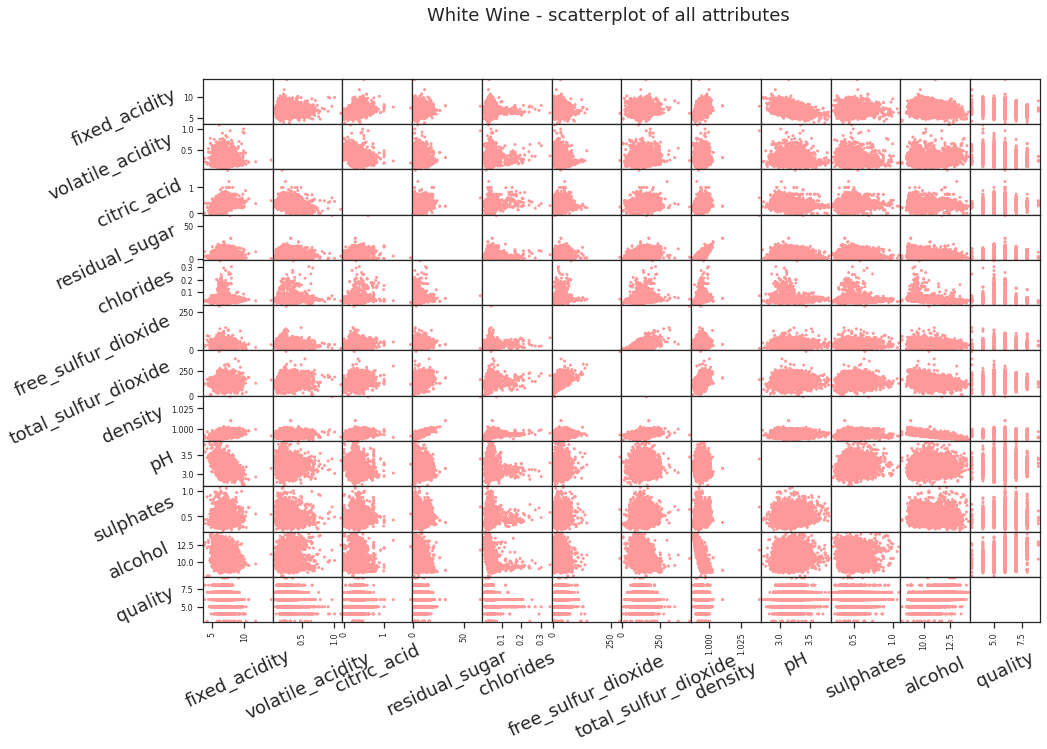

In [ ]:
axes = pd.plotting.scatter_matrix(redwines, alpha=1.0,figsize=(15, 10), color="#FF9999",diagonal=None)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(25)
    ax.yaxis.label.set_rotation(25)
    ax.yaxis.label.set_ha('right')
plt.suptitle('Red Wine - scatterplot of all attributes', fontsize=18)

axes1 = pd.plotting.scatter_matrix(whitewines, alpha=1.0,figsize=(15, 10),color="#FF9999",diagonal=None)
for ax in axes1.flatten():
    ax.xaxis.label.set_rotation(25)
    ax.yaxis.label.set_rotation(25)
    ax.yaxis.label.set_ha('right')
plt.suptitle('White Wine - scatterplot of all attributes', fontsize=18)
plt.show()

#**Data Preparation**

## Data Discretization

In [ ]:
redwines["wine_type"] = 0         #Red wine - 0
whitewines["wine_type"] = 1       #White wine - 1
print("Red Wine")
print(redwines.head())
print("\nWhite Wine")
print(whitewines.head())

Red Wine
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  wine_type
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5          0
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5          0
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5          0
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6          0
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978

## Data Integration

In [ ]:
wines = pd.concat([redwines, whitewines], axis=0)
wines.columns = wines.columns.str.replace(' ', '_')
print("\n All wines together")
wines = wines.reset_index()
wines = wines.drop(columns=['index'])
print(wines)
redwines = redwines.drop(columns=['wine_type'])
whitewines = whitewines.drop(columns=['wine_type'])


 All wines together
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  wine_type
0               7.4              0.70         0.00             1.9      0.076                 11.0                  34.0  0.99780  3.51       0.56      9.4        5          0
1               7.8              0.88         0.00             2.6      0.098                 25.0                  67.0  0.99680  3.20       0.68      9.8        5          0
2               7.8              0.76         0.04             2.3      0.092                 15.0                  54.0  0.99700  3.26       0.65      9.8        5          0
3              11.2              0.28         0.56             1.9      0.075                 17.0                  60.0  0.99800  3.16       0.58      9.8        6          0
4               7.4              0.70         0.00             1.9      0.076                 11.0 

## Data Cleaning

In [ ]:
wines = wines.drop_duplicates()
wines = wines.dropna()
wines = wines.reset_index(drop=True)
print(wines)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  wine_type
0               7.4              0.70         0.00             1.9      0.076                 11.0                  34.0  0.99780  3.51       0.56      9.4        5          0
1               7.8              0.88         0.00             2.6      0.098                 25.0                  67.0  0.99680  3.20       0.68      9.8        5          0
2               7.8              0.76         0.04             2.3      0.092                 15.0                  54.0  0.99700  3.26       0.65      9.8        5          0
3              11.2              0.28         0.56             1.9      0.075                 17.0                  60.0  0.99800  3.16       0.58      9.8        6          0
4               7.4              0.66         0.00             1.8      0.075                 13.0                  40.0

## Data Transformation - Creation of the Quality Label

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality  wine_type quality_label
0               7.4              0.70         0.00             1.9      0.076                 11.0                  34.0  0.99780  3.51       0.56      9.4        5          0        medium
1               7.8              0.88         0.00             2.6      0.098                 25.0                  67.0  0.99680  3.20       0.68      9.8        5          0        medium
2               7.8              0.76         0.04             2.3      0.092                 15.0                  54.0  0.99700  3.26       0.65      9.8        5          0        medium
3              11.2              0.28         0.56             1.9      0.075                 17.0                  60.0  0.99800  3.16       0.58      9.8        6          0        medium
4               7.4              0.66         0.00

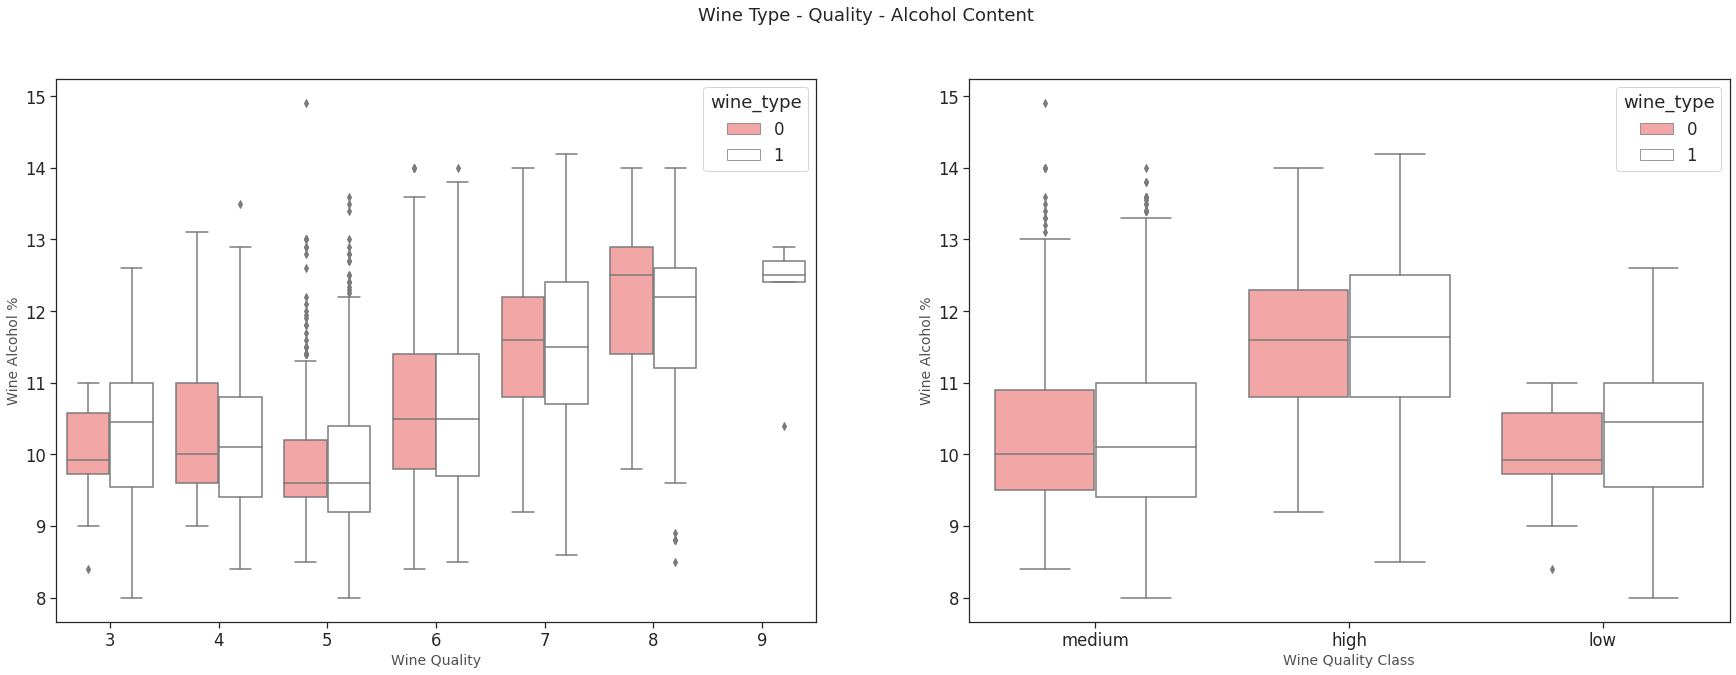

In [ ]:
wines_binary = wines.copy()
wines_binary['quality_label'] = wines.quality.apply(
                    lambda q: 'low' if q <= 3 else 'medium' if q <= 6 else 'high')
print(wines_binary)
my_colors = ["#FF9999", "white"]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=18)

sns.boxplot(x='quality', y='alcohol', hue='wine_type', data=wines_binary, palette=my_colors, ax=ax1)
ax1.set_xlabel("Wine Quality", size=14, alpha=0.8)
ax1.set_ylabel("Wine Alcohol %", size=14, alpha=0.8)

sns.boxplot(x='quality_label', y='alcohol', hue='wine_type', data=wines_binary, palette=my_colors, ax=ax2)
ax2.set_xlabel("Wine Quality Class", size=14, alpha=0.8)
ax2.set_ylabel("Wine Alcohol %", size=14, alpha=0.8)
plt.show()

## Data Transformation - Violin Plot with the Acidity

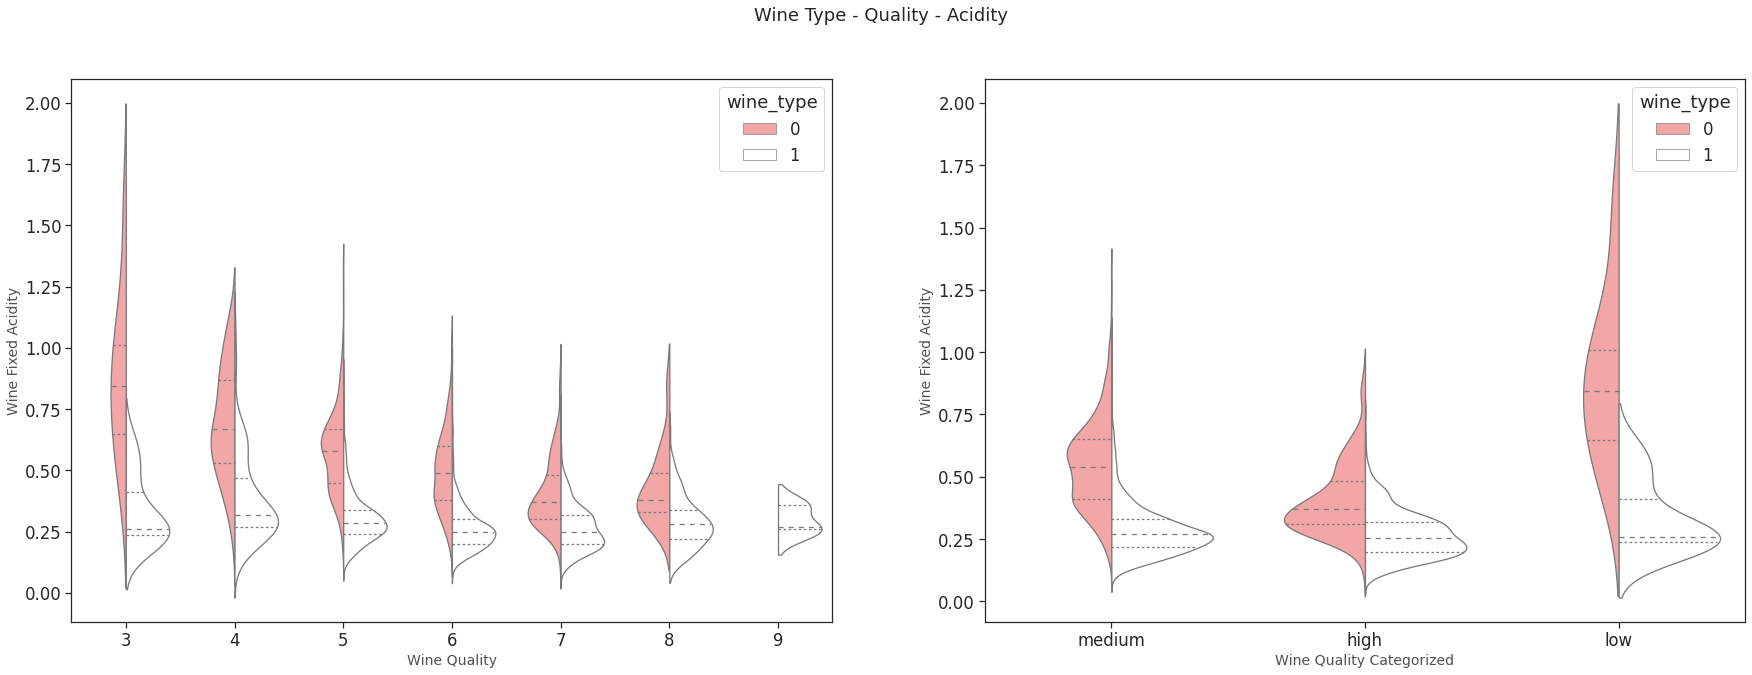

In [ ]:
my_colors = ["#FF9999", "white"]
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
f.suptitle('Wine Type - Quality - Acidity', fontsize=18)

sns.violinplot(x='quality', y='volatile_acidity', hue='wine_type', data=wines_binary, split=True, inner='quart',
                               linewidth=1.3,
                               palette=my_colors, ax=ax1)
ax1.set_xlabel("Wine Quality", size=14, alpha=0.8)
ax1.set_ylabel("Wine Fixed Acidity", size=14, alpha=0.8)
sns.violinplot(x='quality_label', y='volatile_acidity', hue='wine_type', data=wines_binary, split=True,
                               inner='quart', linewidth=1.3,
                               palette=my_colors, ax=ax2)
ax2.set_xlabel("Wine Quality Categorized", size=14, alpha=0.8)
ax2.set_ylabel("Wine Fixed Acidity", size=14, alpha=0.8)
plt.show()

## Data Transformation - Removing Quality Not Discretized



Normalized dataset ready
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates   alcohol  wine_type quality
0          0.140051          2.115150    -2.164312       -0.699634   0.523831            -1.069172             -1.411010  1.100892  1.779136   0.177924 -0.969061          0  medium
1          0.443157          3.184998    -2.164312       -0.544084   1.120630            -0.282878             -0.829761  0.763681 -0.153783   0.979297 -0.631774          0  medium
2          0.443157          2.471766    -1.892494       -0.610748   0.957867            -0.844517             -1.058738  0.831124  0.220331   0.778954 -0.631774          0  medium
3          3.019557         -0.381161     1.641139       -0.699634   0.496704            -0.732189             -0.953056  1.168334 -0.403192   0.311486 -0.631774          0  medium
4          0.140051          1.877406    -2.164312       -0.721855  

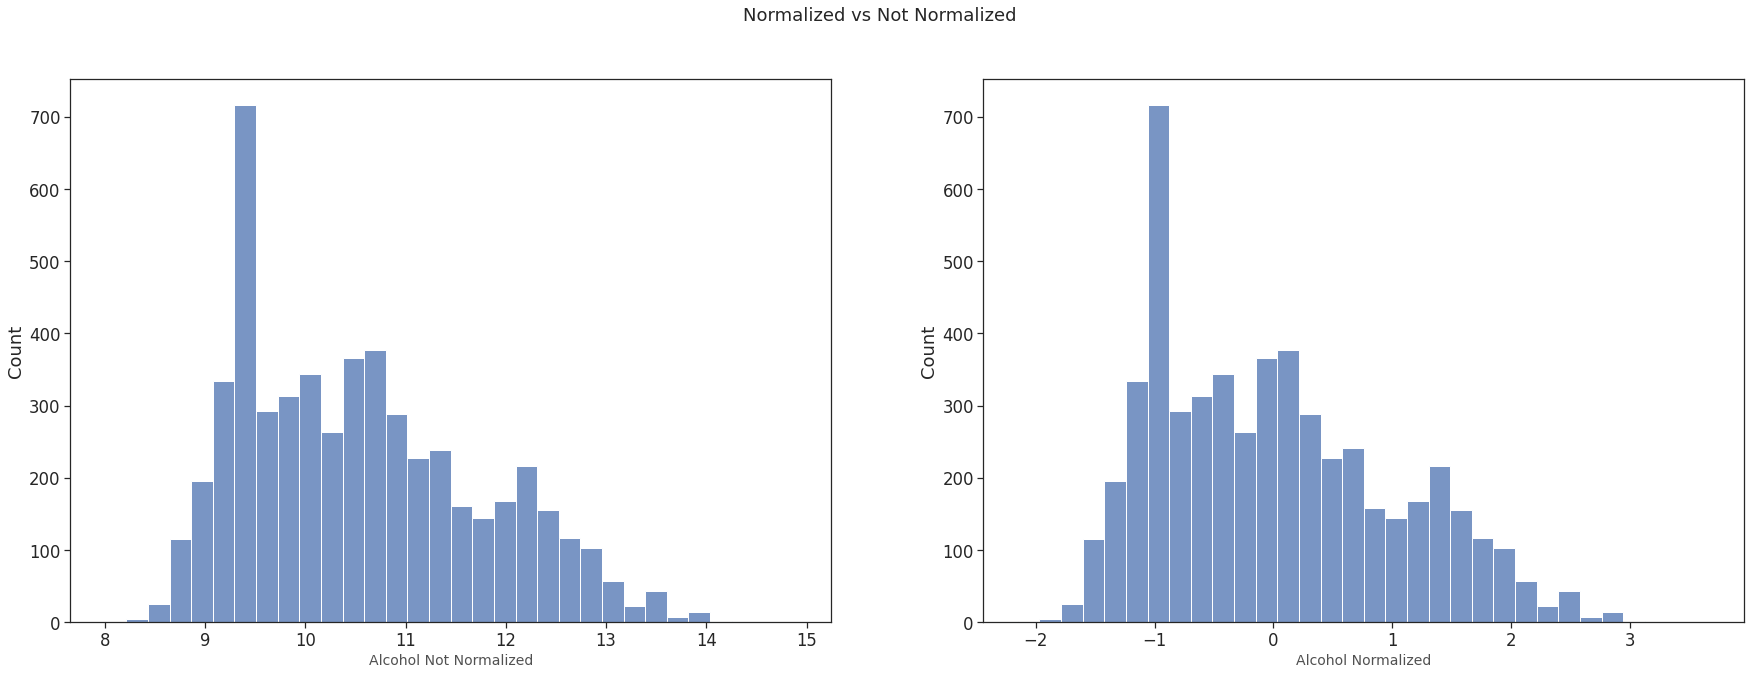

In [ ]:
wines_norm = wines.copy()

for column in wines_norm[
                    ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
                     'free_sulfur_dioxide',
                     'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']].columns:
                    wines_norm[column] = (wines_norm[column] -
                                          wines_norm[column].mean()) / wines_norm[column].std()

# DISCRETIZE QUALITY TO NOT NORMALIZED DATASET
wines_binary = wines.copy()
wines_binary['quality'] = wines.quality.apply(
                    lambda q: 'low' if q <= 3 else 'medium' if q <= 6 else 'high')
last_column = wines_binary.pop('quality')
wines_binary.insert(12, 'quality', last_column)

# DISCRETIZE QUALITY TO NORMALIZED DATASET
wines_binary_norm = wines_norm.copy()
wines_binary_norm['quality'] = wines.quality.apply(
                    lambda q: 'low' if q <= 3 else 'medium' if q <= 6 else 'high')
last_column = wines_binary_norm.pop('quality')
wines_binary_norm.insert(12, 'quality', last_column)
print('\n')
print('Normalized dataset ready')
print(wines_binary_norm)
print('\n')
print('Not Normalized dataset ready')
print(wines_binary)

wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['fixed_acidity']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['volatile_acidity']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['citric_acid']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['residual_sugar']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['chlorides']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['free_sulfur_dioxide']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['total_sulfur_dioxide']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['density']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['pH']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['sulphates']) > 3].index)
wines_binary_norm = wines_binary_norm.drop(wines_binary_norm[abs(wines_binary_norm['alcohol']) > 3].index)

wines_binary_norm = wines_binary_norm.reset_index(drop=True)


my_colors = ["#FF9999", "white"]
alcohol_normalized = wines_norm['alcohol']
alcohol_not_normalized = wines['alcohol']
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
f.suptitle('Normalized vs Not Normalized', fontsize=18)
sns.histplot(data=alcohol_not_normalized, palette=my_colors, ax=ax1)
ax1.set_xlabel("Alcohol Not Normalized", size=14, alpha=0.8)
sns.histplot(data=alcohol_normalized, palette=my_colors, ax=ax2)
ax2.set_xlabel("Alcohol Normalized", size=14, alpha=0.8)
plt.show()

def get_results(model, name, data, true_labels, target_names = ['red', 'white'], results=None, reasume=False):

    if hasattr(model, 'layers'):
        param = wtp_dnn_model.history.params
        best = np.mean(history.history['val_accuracy'])
        predicted_labels = np.argmax(model.predict(data) , axis=-1)
        im_model = InMemoryModel(model.predict, examples=data, target_names=target_names)

    else:
        param = gs.best_params_
        best = gs.best_score_
        predicted_labels = model.predict(data).ravel()
        if hasattr(model, 'predict_proba'):
            im_model = InMemoryModel(model.predict_proba, examples=data, target_names=target_names)
        elif hasattr(clf, 'decision_function'):
            im_model = InMemoryModel(model.decision_function, examples=data, target_names=target_names)
        
    print('Mean Best Accuracy: {:2.2%}'.format(best))
    print('-'*60)
    print('Best Parameters:')
    print(param)
    print('-'*60)
    
    y_pred = model.predict(data).ravel()
    
    display_model_performance_metrics(true_labels, predicted_labels = predicted_labels, target_names = target_names)
    if len(target_names)==2:
        ras = roc_auc_score(y_true=true_labels, y_score=y_pred)
    else:
        roc_auc_multiclass, ras = roc_auc_score_multiclass(y_true=true_labels, y_score=y_pred, target_names=target_names)
        print('\nROC AUC Score by Classes:\n',roc_auc_multiclass)
        print('-'*60)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(ras))
    prob, score_roc, roc_auc = plot_model_roc_curve(model, data, true_labels, label_encoder=None, class_names=target_names)
    
    interpreter = Interpretation(data, feature_names=cols)
    plots = interpreter.feature_importance.plot_feature_importance(im_model, progressbar=False, n_jobs=1, ascending=True)
    
    r1 = pd.DataFrame([(prob, best, np.round(accuracy_score(true_labels, predicted_labels), 4), 
                         ras, roc_auc)], index = [name],
                         columns = ['Prob', 'CV Accuracy', 'Accuracy', 'ROC AUC Score', 'ROC Area'])
    if reasume:
        results = r1
    elif (name in results.index):        
        results.loc[[name], :] = r1
    else: 
        results = results.append(r1)
        
    return results

def roc_auc_score_multiclass(y_true, y_score, target_names, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(y_true)
  roc_auc_dict = {}
  mean_roc_auc = 0
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_y_true = [0 if x in other_class else 1 for x in y_true]
    new_y_score = [0 if x in other_class else 1 for x in y_score]
    num_new_y_true = sum(new_y_true)

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_y_true, new_y_score, average = average)
    roc_auc_dict[target_names[per_class]] = np.round(roc_auc, 4)
    mean_roc_auc += num_new_y_true * np.round(roc_auc, 4)
    
  mean_roc_auc = mean_roc_auc/len(y_true)  
  return roc_auc_dict, mean_roc_auc

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:  {:2.2%} '.format(metrics.accuracy_score(true_labels, predicted_labels)))
    print('Precision: {:2.2%} '.format(metrics.precision_score(true_labels, predicted_labels, average='weighted')))
    print('Recall:    {:2.2%} '.format(metrics.recall_score(true_labels, predicted_labels, average='weighted')))
    print('F1 Score:  {:2.2%} '.format(metrics.f1_score(true_labels, predicted_labels, average='weighted')))
                        

def train_predict_model(classifier,  train_features, train_labels,  test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    


def display_confusion_matrix(true_labels, predicted_labels, target_names):
    
    total_classes = len(target_names)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], target_names], codes=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], target_names], codes=level_labels)) 
    print(cm_frame) 
    
def display_classification_report(true_labels, predicted_labels, target_names):

    report = metrics.classification_report(y_true=true_labels, y_pred=predicted_labels, target_names=target_names) 
    print(report)
    
def display_model_performance_metrics(true_labels, predicted_labels, target_names):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)
    print('\nPrediction Confusion Matrix:')
    print('-'*30)
    display_confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels, target_names=target_names)


def plot_model_roc_curve(clf, features, true_labels, label_encoder=None, class_names=None):
    
    ## Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    if hasattr(clf, 'classes_'):
        class_labels = clf.classes_
    elif label_encoder:
        class_labels = label_encoder.classes_
    elif class_names:
        class_labels = class_names
    else:
        raise ValueError('Unable to derive prediction classes, please specify class_names!')
    n_classes = len(class_labels)
   
    if n_classes == 2:
        if hasattr(clf, 'predict_proba'):
            prb = clf.predict_proba(features)
            if prb.shape[1] > 1:
                y_score = prb[:, prb.shape[1]-1] 
            else:
                y_score = clf.predict(features).ravel()
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            print("\n")
            #raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
        
        fpr, tpr, _ = roc_curve(true_labels, y_score)      
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC curve (area = {0:3.2%})'.format(roc_auc), linewidth=2.5)
        
    elif n_classes > 2:
        if  hasattr(clf, 'clfs_'):
            y_labels = label_binarize(true_labels, classes=list(range(len(class_labels))))
        else:
            y_labels = label_binarize(true_labels, classes=class_labels)
        if hasattr(clf, 'predict_proba'):
            y_score = clf.predict_proba(features)
            prob = True
        elif hasattr(clf, 'decision_function'):
            y_score = clf.decision_function(features)
            prob = False
        else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
            
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_labels[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        ## Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_labels.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        ## Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        ## Plot ROC curves
        plt.figure(figsize=(12, 6))
        plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["micro"]), linewidth=3)

        plt.plot(fpr["macro"], tpr["macro"], label='macro-average ROC curve (area = {0:2.2%})'
                       ''.format(roc_auc["macro"]), linewidth=3)
  
        for i, label in enumerate(class_names):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:2.2%})'
                                           ''.format(label, roc_auc[i]), linewidth=2, linestyle=':')
            
        roc_auc = roc_auc["macro"]   
    else:
        raise ValueError('Number of classes should be atleast 2 or more')
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    
    return prob, y_score, roc_auc

## PCA Analysis 

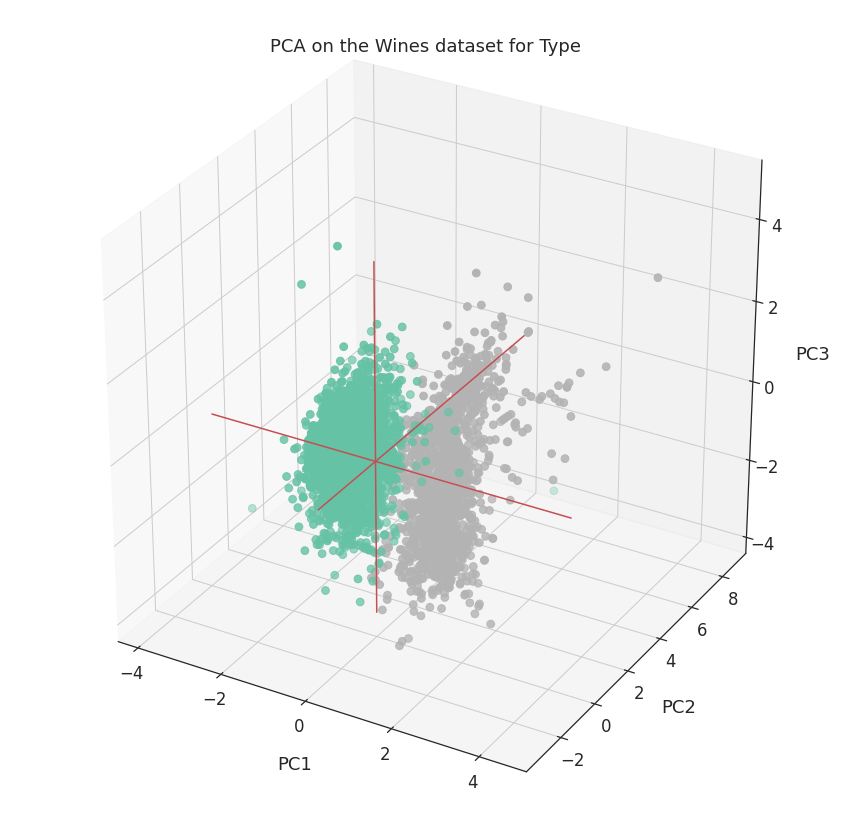

KNeighbors Classifier Training Accuracy: 100.00%
KNeighbors Classifier Test Accuracy: 99.87%
________________________________________

Accurance on Type  Prediction By Number of PCA COmponents:



Var_ratio  Train_Acc  Test_Acc
Components                                
11          99.781204        1.0  0.998747
10          98.784530        1.0  0.996867
2           52.261790        1.0  0.996241
3           65.532445        1.0  0.996241
4           73.478509        1.0  0.996241
5           79.710978        1.0  0.994361
9           96.656249        1.0  0.994361
1           31.521083        1.0  0.993734
6           84.963191        1.0  0.993734
7           89.401655        1.0  0.993108
8           93.701907        1.0  0.993108

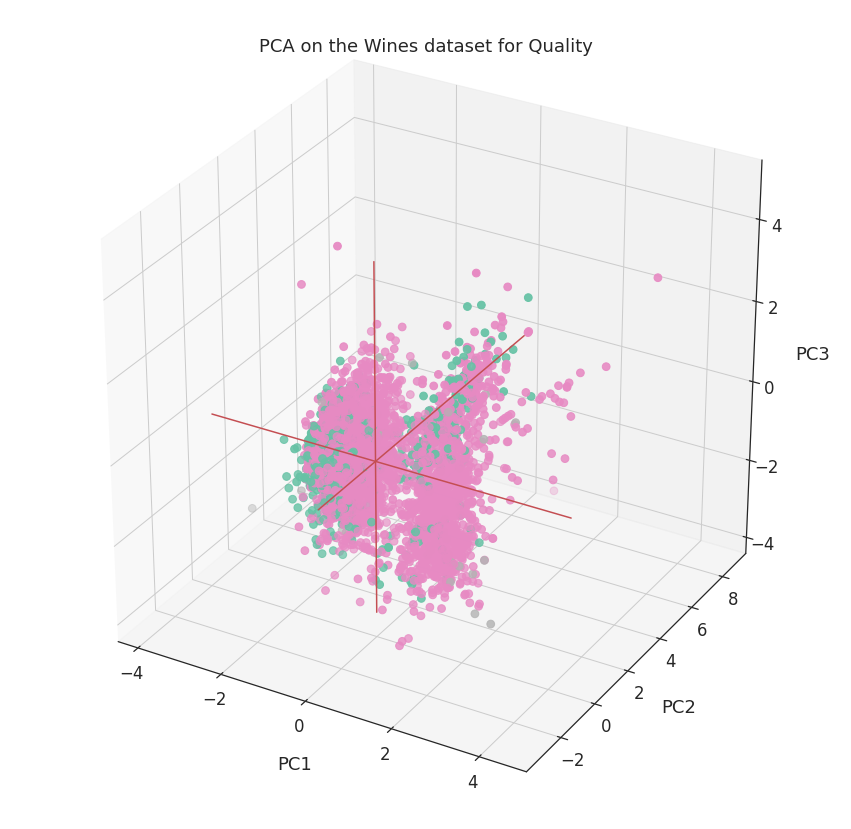

KNeighbors Classifier Training Accuracy: 100.00%
KNeighbors Classifier Test Accuracy: 83.65%
________________________________________

Accurance on Quality  Prediction By Number of PCA COmponents:



Var_ratio  Train_Acc  Test_Acc
Components                                
11          99.781204        1.0  0.830827
9           96.656249        1.0  0.829574
7           89.401655        1.0  0.827694
10          98.784530        1.0  0.825815
8           93.701907        1.0  0.821429
6           84.963191        1.0  0.818922
5           79.710978        1.0  0.810150
4           73.478509        1.0  0.808271
2           52.261790        1.0  0.799499
3           65.532445        1.0  0.796366
1           31.521083        1.0  0.739975

In [ ]:
def pca_analysis(df, y_train, feat):
    scale = StandardScaler()
    df = pd.DataFrame(scale.fit_transform(df), index=df.index)
    pca_all = PCA(random_state=101, whiten=True).fit(df)

    my_color=y_train

    # Store results of PCA in a data frame
    result=pd.DataFrame(pca_all.transform(df), columns=['PCA%i' % i for i in range(df.shape[1])], index=df.index)

    # Plot initialisation
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)

    # make simple, bare axis lines through space:
    xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    # label the axes
    ax.set_xlabel("PC1")
    ax.xaxis.labelpad = 20
    ax.set_ylabel("PC2")
    ax.yaxis.labelpad = 20
    ax.set_zlabel("PC3")
    ax.zaxis.labelpad = 20
    ax.set_title("PCA on the Wines dataset for " + (feat), pad=20)
    plt.show()

    X_train , X_test, y, y_test = train_test_split(df , y_train, test_size=0.3, random_state=0)

    KNC = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 12, n_neighbors = 12, p  = 1, weights = 'distance')
    KNC = KNC.fit(X_train, y)
    print('KNeighbors Classifier Training Accuracy: {:2.2%}'.format(accuracy_score(y, KNC.predict(X_train))))
    y_pred = KNC.predict(X_test)
    print('KNeighbors Classifier Test Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

    print('_' * 40)
    print('\nAccurance on', feat, ' Prediction By Number of PCA COmponents:\n')
    AccPca = pd.DataFrame(columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc'])

    for componets in np.arange(1, df.shape[1]):
        variance_ratio = sum(pca_all.explained_variance_ratio_[:componets])*100
        pca = PCA(n_components=componets, random_state=101, whiten=True)
        X_train_pca = pca.fit_transform(X_train)
        Components = X_train_pca.shape[1]
        KNC = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 12, n_neighbors = 12, p  = 1, weights = 'distance')
        KNC = KNC.fit(X_train_pca, y)
        Training_Accuracy = accuracy_score(y, KNC.predict(X_train_pca))
        X_test_pca = pca.transform(X_test)
        y_pred = KNC.predict(X_test_pca)
        Test_Accuracy = accuracy_score(y_test, y_pred)
        AccPca = AccPca.append(pd.DataFrame([(Components, variance_ratio, Training_Accuracy, Test_Accuracy)],
                                            columns=['Components', 'Var_ratio', 'Train_Acc', 'Test_Acc']))#], axis=0)

    AccPca.set_index('Components', inplace=True)
    display(AccPca.sort_values(by='Test_Acc', ascending=False))

class_tp = LabelEncoder()
y_tp = class_tp.fit_transform(wines.wine_type.values) # 1 - White; 0 - Red
wines['color'] = y_tp

cols = wines.columns
cols = list(cols.drop(['wine_type', 'quality']))
pca_analysis(wines.loc[:, cols], y_tp, 'Type')

cols = wines.columns
cols = list(cols.drop(['wine_type','quality']))
class_ql = {'low':0, 'medium': 1, 'high': 2}
y_ql = wines_binary.quality.map(class_ql)
pca_analysis(wines.loc[:, cols], y_ql, 'Quality')

# **Modeling (ML Algorithms Application)**

## Type of Wine

In [ ]:
# re-shuffle records just to randomize data points
wines = wines_binary_norm.sample(frac=1, random_state=101).reset_index(drop=True)
class_tp = LabelEncoder()
y_tp = class_tp.fit_transform(wines.wine_type.values) # 1 - White; 0 - Red
wines['color'] = y_tp

cols = wines.columns
cols = list(cols.drop(['wine_type', 'quality', 'color']))
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(wines.loc[:, cols], y_tp, test_size=0.20, random_state=101)

### Logistic Regression

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 99.57%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  99.39% 
Precision: 99.39% 
Recall:    99.39% 
F1 Score:  99.38% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       1.00      0.98      0.99       223
       white       0.99      1.00      1.00       755

    accuracy                           0.99       978
   macro avg       0.99      0.99      0.99       978
weighted avg       0.99      0.99      0.99       978


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red          218     5
        white          1   754


              ROC AUC Score: 98.81%


2022-12-05 21:43:51,270 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


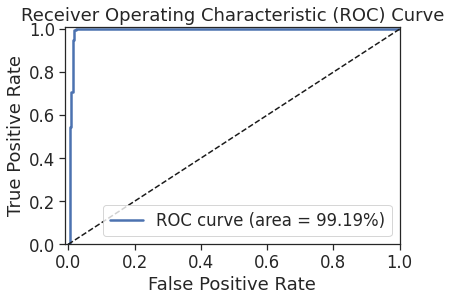

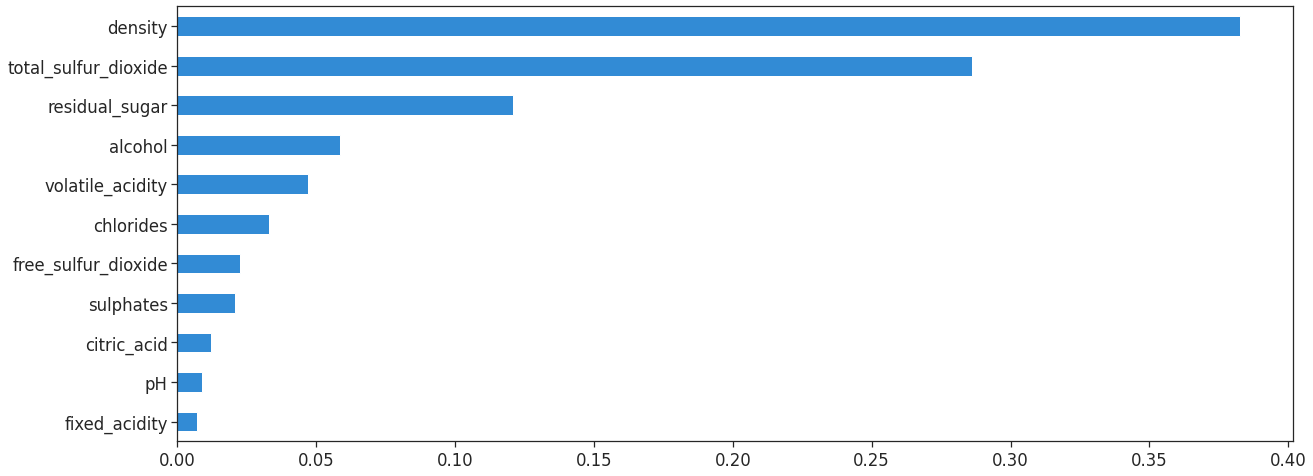

In [ ]:
clf = Pipeline([
        ('pca', PCA()),
        ('clf', LogisticRegression())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid = {}

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
LR = Pipeline([
        #('sel', select_fetaures(select_cols=list(shadow))),
      #  ('scl', StandardScaler()),
        #('lda', LDA(store_covariance=True)),
        ('gs', gs)
 ]) 

LR.fit(X_train_type,y_train_type)
results = get_results(LR, 'Logistic Regression - Wine Type', X_test_type, y_test_type, reasume=True)

## Wine Quality

In [ ]:
class_ql = {'low':0, 'medium': 1, 'high': 2}
y_ql = wines_binary_norm.quality.map(class_ql)

wqp_class_labels = np.array(wines_binary['quality'])
target_names = ['low', 'medium', 'high']

cols = wines_binary_norm.columns
cols = list(cols.drop(['quality']))
X_train, X_test, y_train, y_test = train_test_split(wines_binary_norm.loc[:, cols], y_ql.values, test_size=0.20, shuffle=True, random_state=101)


class select_fetaures(object):  # BaseEstimator, TransformerMixin,
     def __init__(self, select_cols):
         self.select_cols_ = select_cols

     def fit(self, X, Y):
         pass

     def transform(self, X):
         return X.loc[:, self.select_cols_]

     def fit_transform(self, X, Y):
         self.fit(X, Y)
         df = self.transform(X)
         return df

     def __getitem__(self, x):
         return self.X[x], self.Y[x]


cols_clean = cols.copy()
cols_clean.remove('total_sulfur_dioxide')
cols_clean.remove('residual_sugar')

### Imbalanced  Data

#### NaiveBayes

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 81.16%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  79.55% 
Precision: 78.13% 
Recall:    79.55% 
F1 Score:  78.50% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.85      0.90      0.87       768
        high       0.56      0.40      0.47       206

    accuracy                           0.80       978
   macro avg       0.47      0.44      0.45       978
weighted avg       0.78      0.80      0.78       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low             0      4    0
        medium     

2022-12-05 22:26:32,211 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


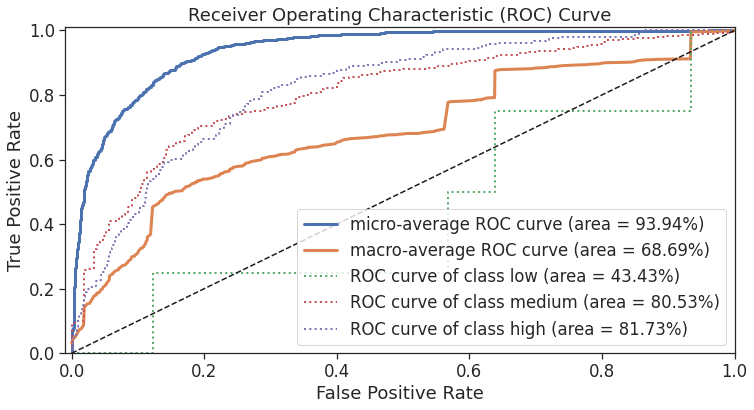

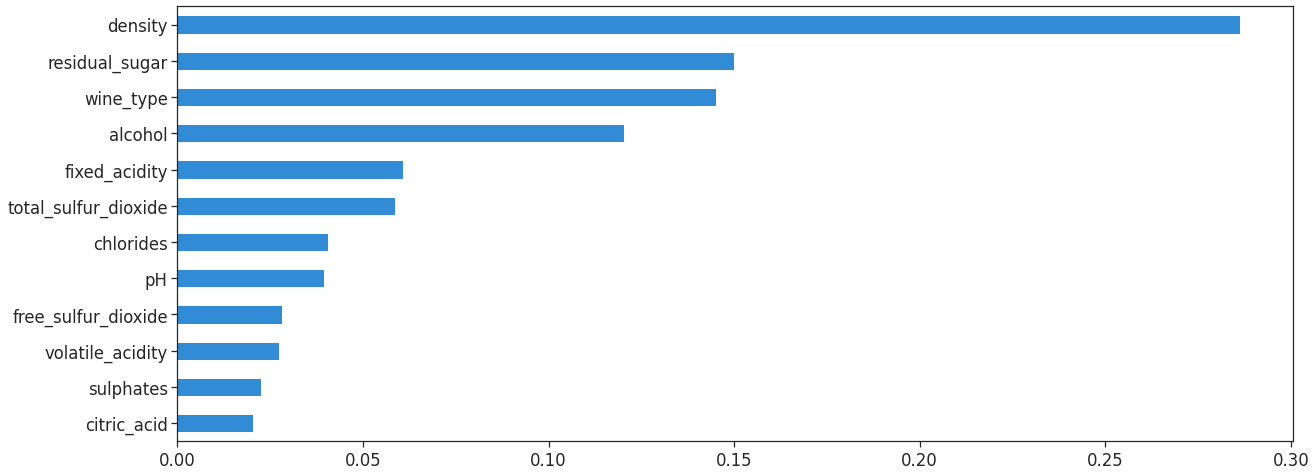

In [ ]:
starting_timenb = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', GaussianNB())])  
param_grid = {}

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
NB = Pipeline([('gs', gs)]) 

NB.fit(X_train,y_train)
results = get_results(NB, 'Naive Bayes', X_test, y_test, 
                      target_names = target_names, reasume=True)

end_timenb = datetime.datetime.now()
difnb= end_timenb - starting_timenb
results_imbalanced = results.copy()

#### KNN

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 83.02%
------------------------------------------------------------
Best Parameters:
{'clf__metric': 'manhattan', 'clf__n_neighbors': 23}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  81.39% 
Precision: 78.96% 
Recall:    81.39% 
F1 Score:  78.44% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.83      0.96      0.89       768
        high       0.65      0.30      0.41       206

    accuracy                           0.81       978
   macro avg       0.49      0.42      0.43       978
weighted avg       0.79      0.81      0.78       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual:

2022-12-05 22:26:34,824 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


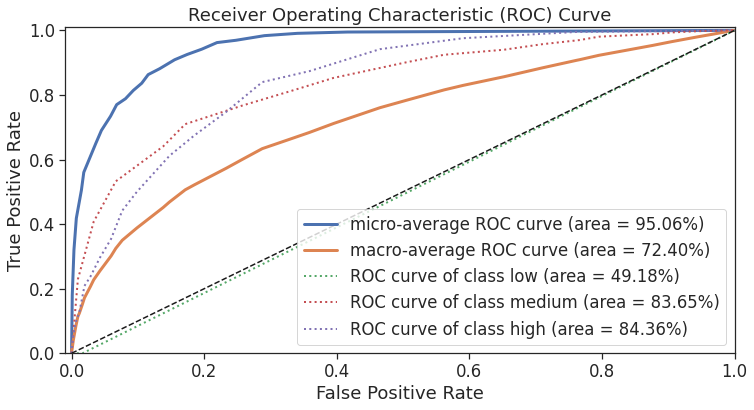

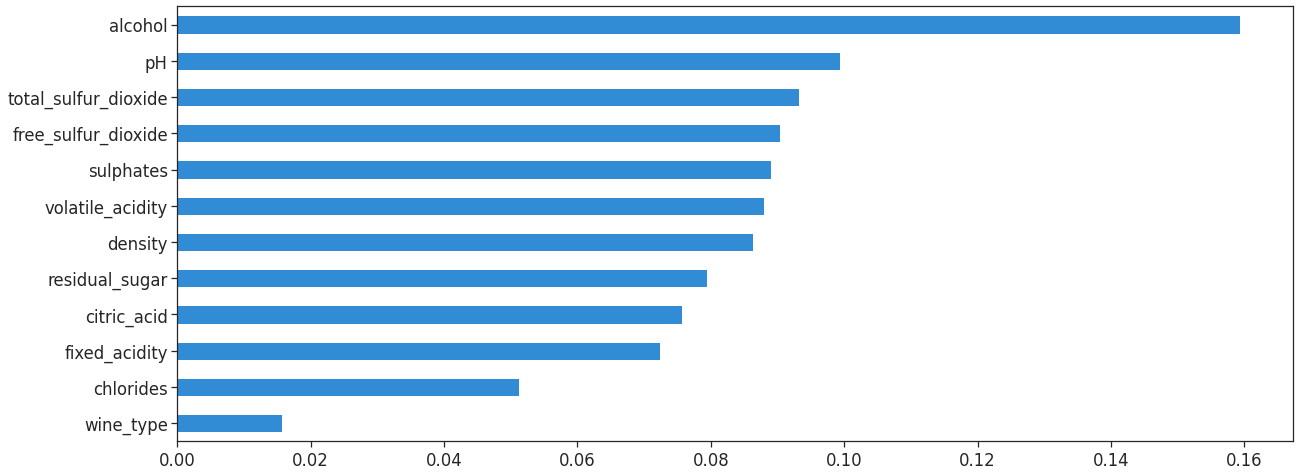

In [ ]:
starting_timeknn = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', KNeighborsClassifier())]) 
# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols_clean
param_grid =\
    [{'clf__n_neighbors': [23]   #range(1,200,2)
     ,'clf__metric': ['manhattan'] #['manhattan', 'euclidean', 'minkowski '] 
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

KNNC = Pipeline([
      #  ('sel', select_fetaures(select_cols=SEL)),
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

KNNC.fit(X_train,y_train)

results = get_results(KNNC, 'KNN', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timeknn = datetime.datetime.now()
difknn = end_timeknn - starting_timeknn
results_imbalanced = results_imbalanced.append(results)

#### Logistic Regression

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 82.74%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  80.16% 
Precision: 77.08% 
Recall:    80.16% 
F1 Score:  77.03% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.82      0.95      0.88       768
        high       0.59      0.27      0.37       206

    accuracy                           0.80       978
   macro avg       0.47      0.41      0.42       978
weighted avg       0.77      0.80      0.77       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low             0      4    0
        medium     

2022-12-05 22:26:39,119 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


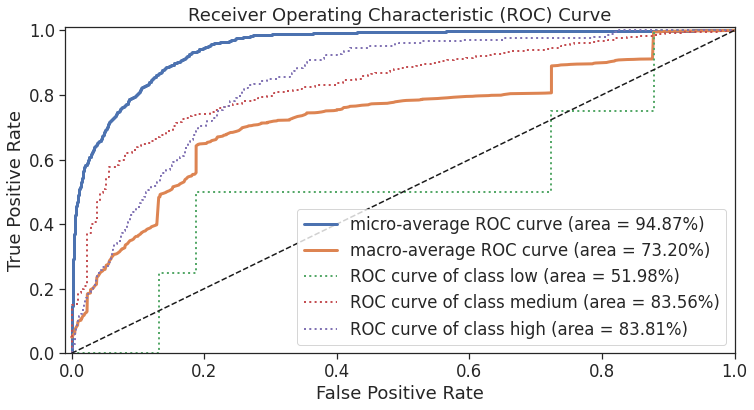

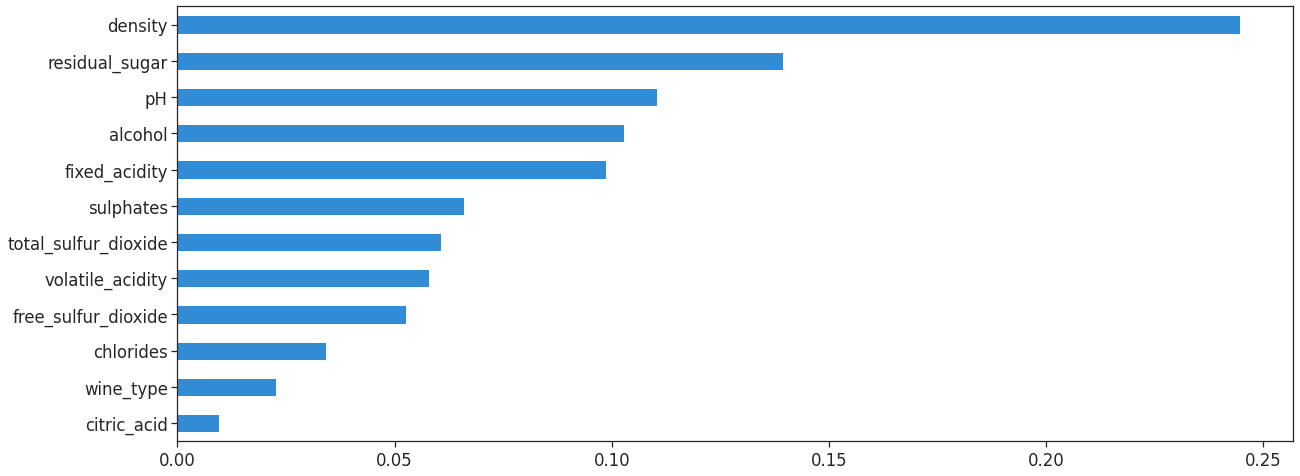

In [ ]:
starting_timelr = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', LogisticRegression())])  

param_grid = {}
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

LR = Pipeline([
       # ('scl', StandardScaler()),
        ('gs', gs)
 ])  

LR.fit(X_train,y_train)

results =get_results(LR, 'Logistic Regression', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timelr = datetime.datetime.now()
diflr = end_timelr - starting_timelr
results_imbalanced = results_imbalanced.append(results)

#### Decision Tree

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 81.21%
------------------------------------------------------------
Best Parameters:
{'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_leaf': 117}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  80.37% 
Precision: 77.35% 
Recall:    80.37% 
F1 Score:  76.86% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.82      0.96      0.88       768
        high       0.61      0.25      0.35       206

    accuracy                           0.80       978
   macro avg       0.48      0.40      0.41       978
weighted avg       0.77      0.80      0.77       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                 

2022-12-05 22:26:40,694 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


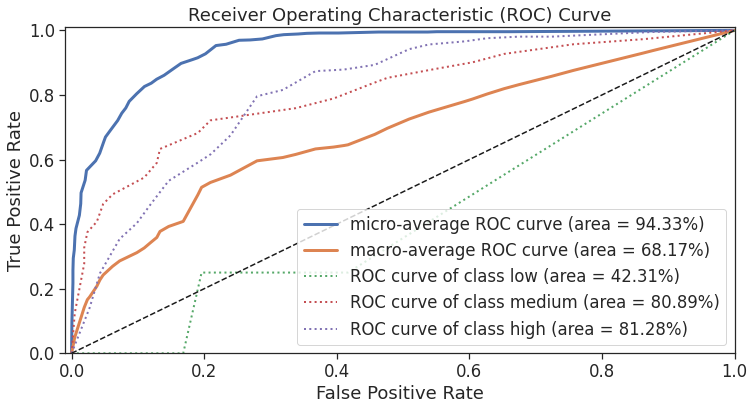

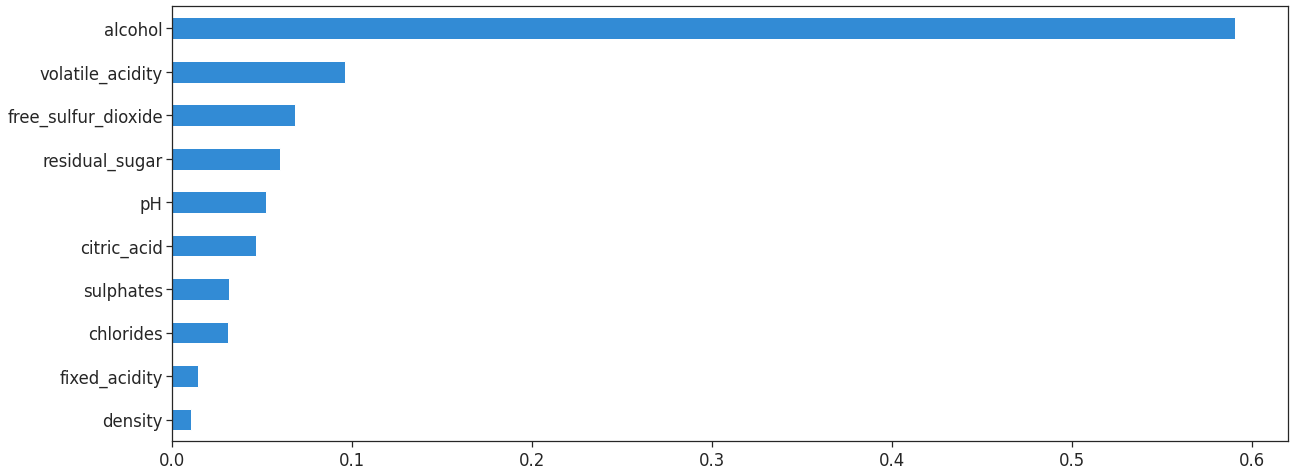

In [ ]:
starting_timedt = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', DecisionTreeClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__criterion': ['entropy'] #['gini', 'entropy']
      ,'clf__max_depth': [6] #range(1, 51) # [15, 20, 25]
      ,'clf__min_samples_leaf':  [117]  # range(100, 150) 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
DT = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

DT.fit(X_train,y_train)

results = get_results(DT, 'Decision Tree', X_test, y_test, target_names = target_names, results = results, reasume=False)
end_timedt = datetime.datetime.now()
difdt= end_timedt - starting_timedt
results_imbalanced = results_imbalanced.append(results)

#### Support Vector Machine

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Mean Best Accuracy: 80.59%
------------------------------------------------------------
Best Parameters:
{'clf__C': 0.08, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  78.73% 
Precision: 82.86% 
Recall:    78.73% 
F1 Score:  69.57% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.79      1.00      0.88       768
        high       1.00      0.01      0.02       206

    accuracy                           0.79       978
   macro avg       0.60      0.34      0.30       978
weighted avg       0.83      0.79      0.70       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Ac

2022-12-05 22:26:52,879 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


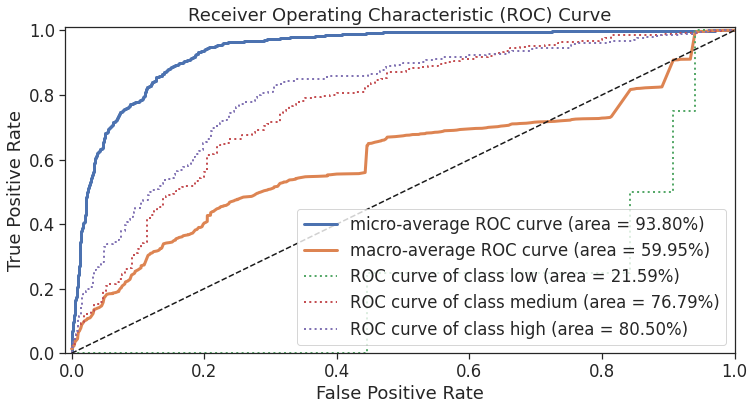

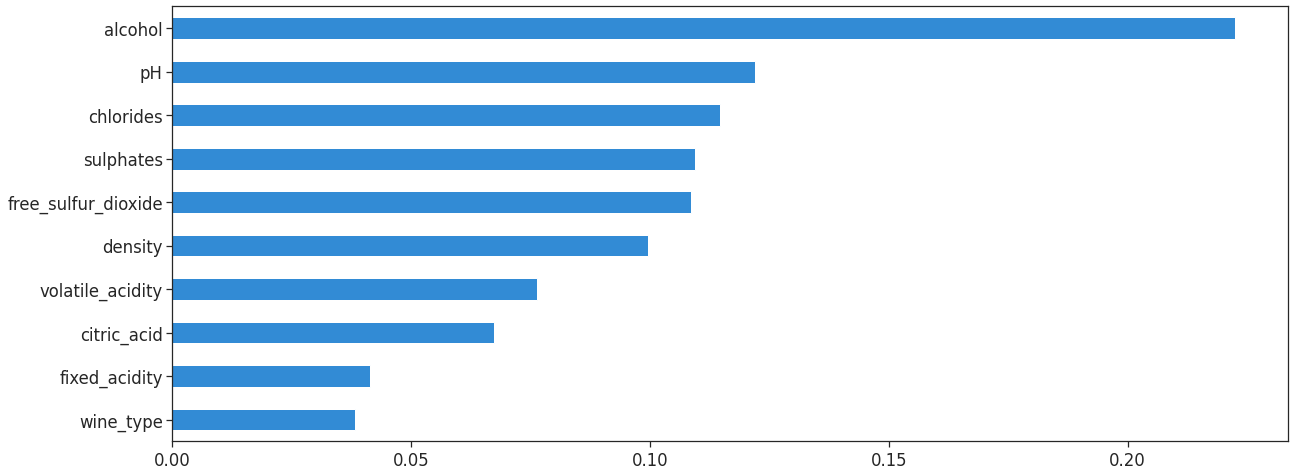

In [ ]:
from sklearn.svm import SVC, LinearSVC
starting_timesvm = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', SVC())])
 
# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__C': [0.06, 0.08, 0.07] #, 1.0, 10.0, 100.0, 1000.0]
     ,'clf__gamma': [0.1] #[1,0.1,0.01,0.001]
     ,'clf__kernel' : ['rbf'] #['rbf', 'poly', 'sigmoid']
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

SVC = Pipeline([
        ('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ])  

SVC.fit(X_train,y_train)

results  = get_results(SVC, 'Support Vector Machine', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timesvm = datetime.datetime.now()
difsvm= end_timesvm - starting_timesvm
results_imbalanced = results_imbalanced.append(results)

#### Linear Support Vector 

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Mean Best Accuracy: 82.61%
------------------------------------------------------------
Best Parameters:
{'clf__C': 0.06, 'clf__dual': True, 'clf__loss': 'squared_hinge', 'clf__max_iter': 10, 'clf__penalty': 'l2', 'clf__tol': 1e-06}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  80.57% 
Precision: 78.03% 
Recall:    80.57% 
F1 Score:  76.01% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.81      0.97      0.89       768
        high       0.67      0.19      0.30       206

    accuracy                           0.81       978
   macro avg       0.49      0.39      0.40       978
weighted avg       0.78      0.81      0.76       978


Prediction Confusion Matrix:
------------------------------
      

2022-12-05 22:26:59,346 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


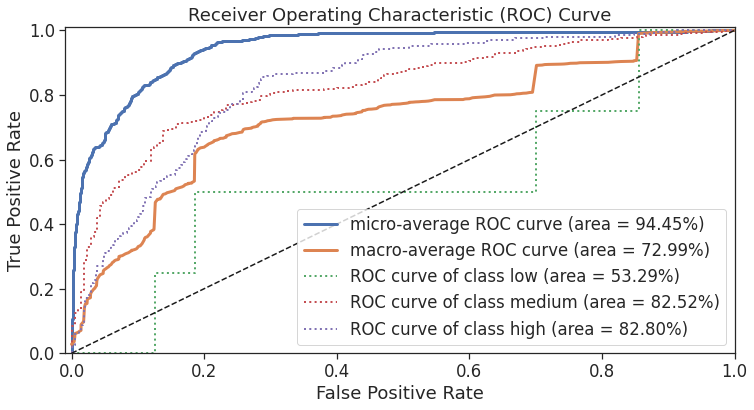

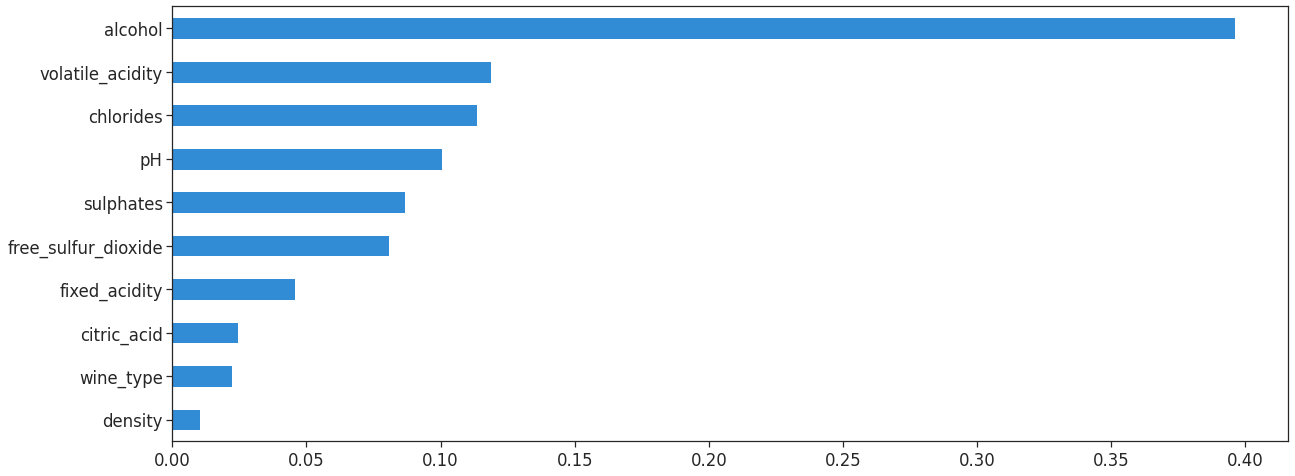

In [ ]:
starting_timesvc = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', LinearSVC())])

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols_clean
param_grid =\
    [{'clf__loss': ['hinge', 'squared_hinge']
     ,'clf__tol': [1e-06]
     ,'clf__C': [0.06, 0.08, 0.07] #, 1.0, 10.0, 100.0, 1000.0]
     ,'clf__penalty': ['l2']
     ,'clf__max_iter' : [10, 15, 9]
     ,'clf__dual' : [True,False]
     }
    ]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

LSVC = Pipeline([
        ('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ])  

LSVC.fit(X_train,y_train)

results = get_results(LSVC, 'Linear SVC', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timesvc = datetime.datetime.now()
difsvc= end_timesvc - starting_timesvc
results_imbalanced = results_imbalanced.append(results)

#### Random Forest

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Mean Best Accuracy: 82.33%
------------------------------------------------------------
Best Parameters:
{'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_split': 117, 'clf__n_estimators': 2000}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  80.47% 
Precision: 78.16% 
Recall:    80.47% 
F1 Score:  75.42% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.81      0.98      0.89       768
        high       0.69      0.17      0.27       206

    accuracy                           0.80       978
   macro avg       0.50      0.38      0.39       978
weighted avg       0.78      0.80      0.75       978


Prediction Confusion Matrix:
------------------------------
               Predicted:     

2022-12-05 22:29:38,933 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


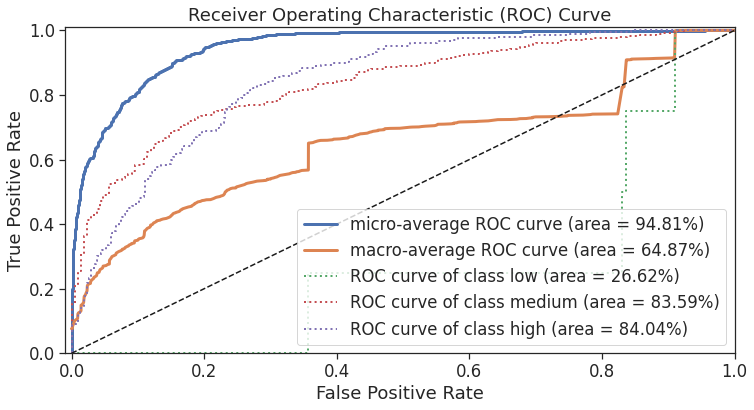

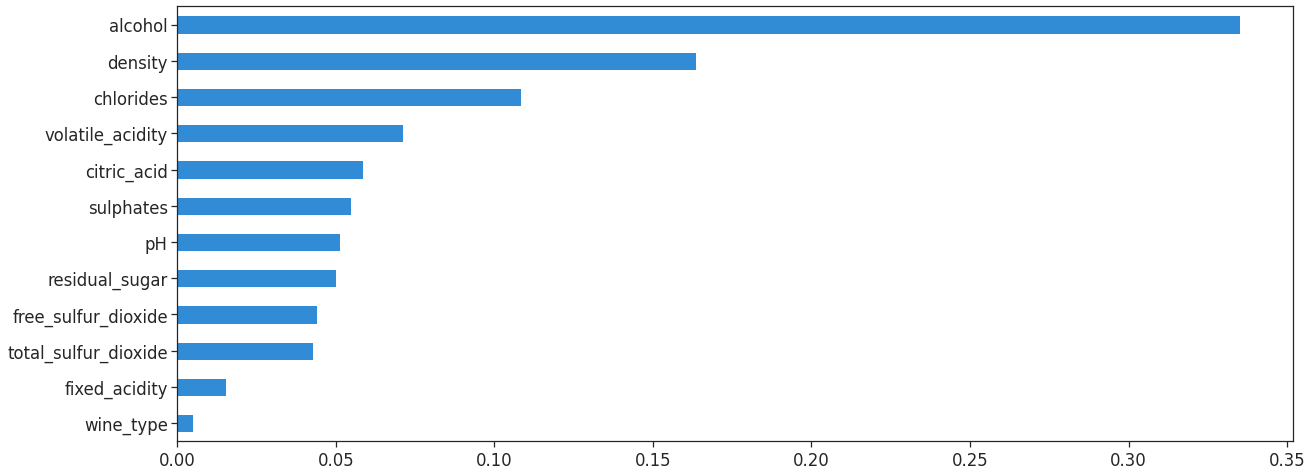

In [ ]:
starting_timerf = datetime.datetime.now()
clf = Pipeline([
                #('pca', PCA()),
                ('clf', RandomForestClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{ 'clf__criterion': ['gini', 'entropy']
      ,'clf__n_estimators':  [2000]       
      ,'clf__min_samples_split': [117]
      ,'clf__max_depth': [6] #, 3, 4, 5, 10] #

}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
RF = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 
     
RF.fit(X_train,y_train)

results = get_results(RF, 'Random Forest', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timerf = datetime.datetime.now()
difrf= end_timerf - starting_timerf
results_imbalanced = results_imbalanced.append(results)

#### Gradient Boosting 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 82.59%
------------------------------------------------------------
Best Parameters:
{'clf__learning_rate': 0.01, 'clf__max_depth': 10, 'clf__n_estimators': 400}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  81.49% 
Precision: 79.38% 
Recall:    81.49% 
F1 Score:  78.80% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.83      0.95      0.89       768
        high       0.66      0.31      0.42       206

    accuracy                           0.81       978
   macro avg       0.50      0.42      0.44       978
weighted avg       0.79      0.81      0.79       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                     

2022-12-05 22:39:39,124 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


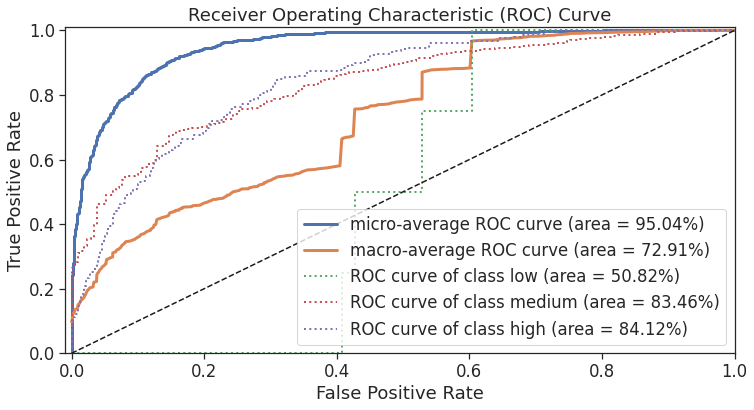

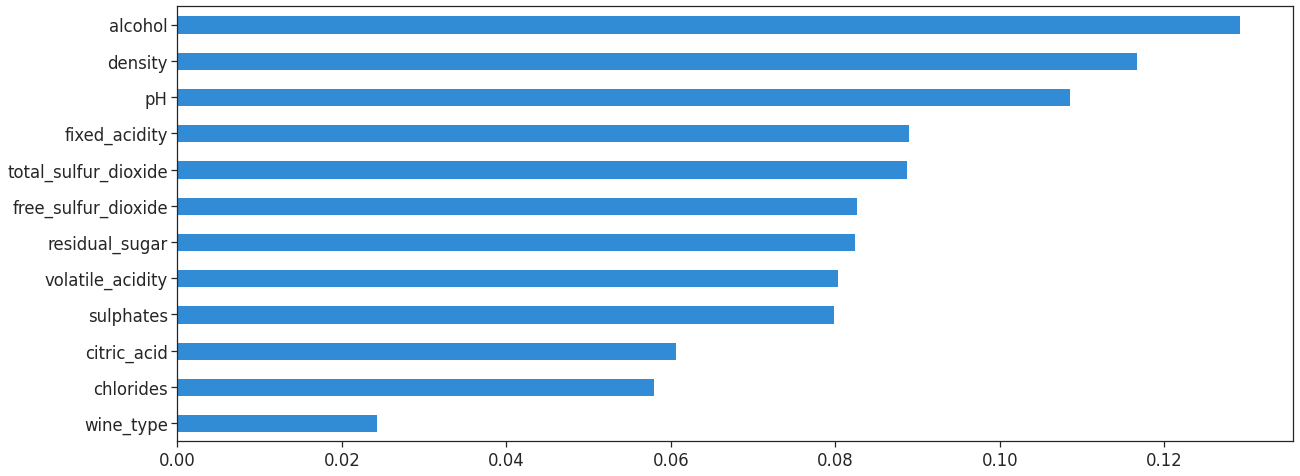

In [ ]:
starting_timegb = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', GradientBoostingClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [1e-02] #, 5e-03, 2e-02]
     ,'clf__max_depth': [10]
     ,'clf__n_estimators' : [400] 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

GBC = Pipeline([
       # ('scl', StandardScaler()),
        ('gs', gs)
 ])  

GBC.fit(X_train,y_train)

results = get_results(GBC, 'Gradient Boosting', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timegb = datetime.datetime.now()
difgb= end_timegb - starting_timegb
results_imbalanced = results_imbalanced.append(results)

#### AdaBoost 

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Mean Best Accuracy: 75.76%
------------------------------------------------------------
Best Parameters:
{'clf__algorithm': 'SAMME.R', 'clf__learning_rate': 0.15, 'clf__n_estimators': 500}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  75.46% 
Precision: 77.01% 
Recall:    75.46% 
F1 Score:  76.09% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.86      0.82      0.84       768
        high       0.44      0.53      0.48       206

    accuracy                           0.75       978
   macro avg       0.43      0.45      0.44       978
weighted avg       0.77      0.75      0.76       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
              

2022-12-05 22:42:02,402 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


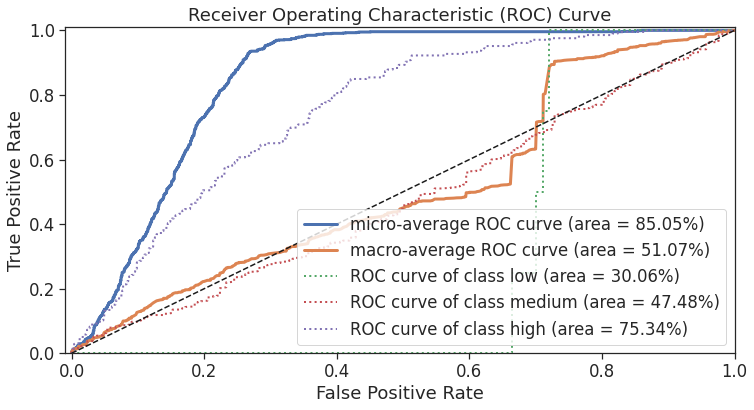

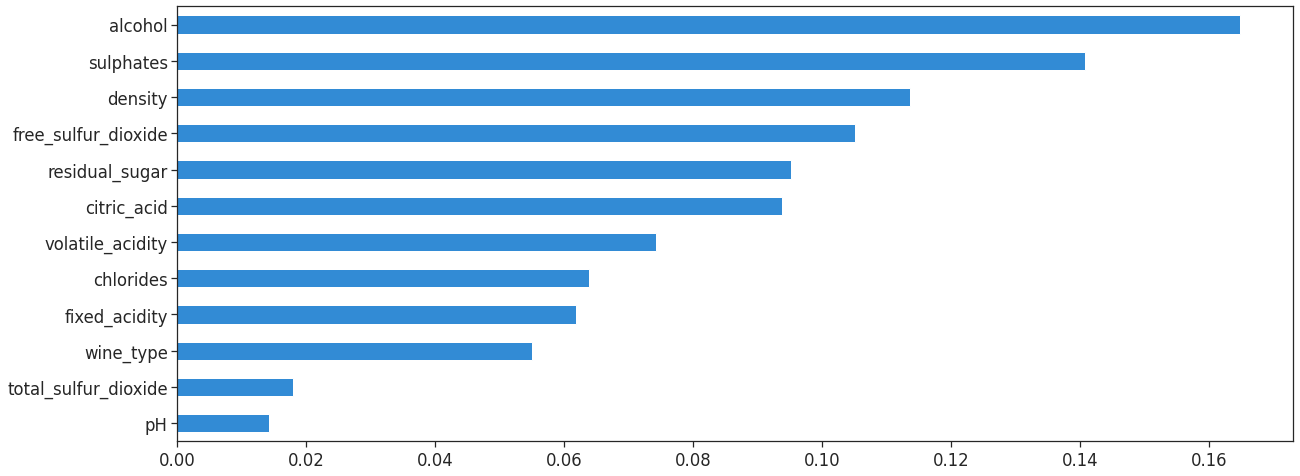

In [ ]:
starting_timeab = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', AdaBoostClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [2e-01, 15e-02]
     ,'clf__n_estimators': [500, 600, 700] 
     ,'clf__algorithm' : ['SAMME.R'] # 'SAMME'
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

ADAB = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ])  

ADAB.fit(X_train,y_train)

results = get_results(ADAB, 'AdaBoost', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timeab = datetime.datetime.now()
difab= end_timeab - starting_timeab
results_imbalanced = results_imbalanced.append(results)

#### Artificial Neural Networks

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(22)

#train_valid, test = train_test_split(wines_binary_norm, test_size=0.20, shuffle=True, random_state=101)

train = X_train.copy()
train['quality'] = y_train

train, valid = train_test_split(train, test_size=0.20, shuffle=True, random_state=101)

target_train = train.pop('quality')
tf_train = tf.data.Dataset.from_tensor_slices((train.values, target_train.values))

target_valid = valid.pop('quality')
tf_valid = tf.data.Dataset.from_tensor_slices((valid.values, target_valid.values))

tf_train = tf_train.shuffle(len(train)).batch(1)
tf_valid = tf_valid.shuffle(len(valid)).batch(1)

def xavier_init(shape):
  # Computes the xavier initialization values for a weight matrix
  in_dim, out_dim = shape
  xavier_lim = tf.sqrt(6.)/tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))
  weight_vals = tf.random.uniform(shape=(in_dim, out_dim), 
                                  minval=-xavier_lim, maxval=xavier_lim, seed=22)
  return weight_vals

class DenseLayer(tf.Module):

  def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):
    # Initialize the dimensions and activation functions
    self.out_dim = out_dim
    self.weight_init = weight_init
    self.activation = activation
    self.built = False

  def __call__(self, x):
    if not self.built:
      # Infer the input dimension based on first call
      self.in_dim = x.shape[1]
      # Initialize the weights and biases using Xavier scheme
      self.w = tf.Variable(xavier_init(shape=(self.in_dim, self.out_dim)))
      self.b = tf.Variable(tf.zeros(shape=(self.out_dim,)))
      self.built = True
    # Compute the forward pass
    z = tf.add(tf.matmul(x, self.w), self.b)
    return self.activation(z)

class MLP(tf.Module):

  def __init__(self, layers):
    self.layers = layers

  @tf.function
  def __call__(self, x, preds=False): 
    # Execute the model's layers sequentially
    for layer in self.layers:
      x = layer(x)
    return x

def cross_entropy_loss(y_pred, y):
  # Compute cross entropy loss with a sparse operation
  sparse_ce = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(sparse_ce)

def accuracy(y_pred, y):
  # Compute accuracy after extracting class predictions
  class_preds = tf.argmax(tf.nn.softmax(y_pred), axis=1)
  is_equal = tf.equal(y, class_preds)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

class Adam:

    def __init__(self, learning_rate=1e-3, beta_1=0.9, beta_2=0.999, ep=1e-7):
      # Initialize optimizer parameters and variable slots
      self.beta_1 = beta_1
      self.beta_2 = beta_2
      self.learning_rate = learning_rate
      self.ep = ep
      self.t = 1.
      self.v_dvar, self.s_dvar = [], []
      self.built = False

    def apply_gradients(self, grads, vars):
      # Initialize variables on the first call
      if not self.built:
        for var in vars:
          v = tf.Variable(tf.zeros(shape=var.shape))
          s = tf.Variable(tf.zeros(shape=var.shape))
          self.v_dvar.append(v)
          self.s_dvar.append(s)
        self.built = True
      # Update the model variables given their gradients
      for i, (d_var, var) in enumerate(zip(grads, vars)):
        self.v_dvar[i].assign(self.beta_1*self.v_dvar[i] + (1-self.beta_1)*d_var)
        self.s_dvar[i].assign(self.beta_2*self.s_dvar[i] + (1-self.beta_2)*tf.square(d_var))
        v_dvar_bc = self.v_dvar[i]/(1-(self.beta_1**self.t))
        s_dvar_bc = self.s_dvar[i]/(1-(self.beta_2**self.t))
        var.assign_sub(self.learning_rate*(v_dvar_bc/(tf.sqrt(s_dvar_bc) + self.ep)))
      self.t += 1.
      return

def train_step(x_batch, y_batch, loss, acc, model, optimizer):
  # Update the model state given a batch of data
  x_batch = tf.cast(x_batch, tf.float32)
  with tf.GradientTape() as tape:
    y_pred = model(x_batch)
    batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  grads = tape.gradient(batch_loss, model.variables)
  optimizer.apply_gradients(grads, model.variables)
  return batch_loss, batch_acc

def val_step(x_batch, y_batch, loss, acc, model):
  # Evaluate the model on given a batch of validation data
  x_batch = tf.cast(x_batch, tf.float32)
  y_pred = model(x_batch)
  batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  return batch_loss, batch_acc

def train_model(mlp, train_data, val_data, loss, acc, optimizer, epochs):
  # Initialize data structures
  train_losses, train_accs = [], []
  val_losses, val_accs = [], []

  # Format training loop and begin training
  for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_val, batch_accs_val = [], []

    # Iterate over the training data
    for x_batch, y_batch in train_data:
      # Compute gradients and update the model's parameters
      batch_loss, batch_acc = train_step(x_batch, y_batch, loss, acc, mlp, optimizer)
      # Keep track of batch-level training performance
      batch_losses_train.append(batch_loss)
      batch_accs_train.append(batch_acc)

    # Iterate over the validation data
    for x_batch, y_batch in val_data:
      batch_loss, batch_acc = val_step(x_batch, y_batch, loss, acc, mlp)
      batch_losses_val.append(batch_loss)
      batch_accs_val.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    val_loss, val_acc = tf.reduce_mean(batch_losses_val), tf.reduce_mean(batch_accs_val)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"Epoch: {epoch}")
    print(f"Training loss: {train_loss:.3f}, Training accuracy: {train_acc:.3f}")
    print(f"Validation loss: {val_loss:.3f}, Validation accuracy: {val_acc:.3f}")
  return train_losses, train_accs, val_losses, val_accs

def plot_metrics(train_metric, val_metric, metric_type):
  # Visualize metrics vs training Epochs
  plt.figure()
  plt.plot(range(len(train_metric)), train_metric, label = f"Training {metric_type}")
  plt.plot(range(len(val_metric)), val_metric, label = f"Validation {metric_type}")
  plt.xlabel("Epochs")
  plt.ylabel(metric_type)
  plt.legend()
  plt.title(f"{metric_type} vs Training epochs");


hidden_layer_1_size = 100
hidden_layer_2_size = 40
#hidden_layer_3_size = 30
output_size = 3

mlp_model = MLP([
    DenseLayer(out_dim=hidden_layer_1_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_2_size, activation=tf.nn.relu),
   # DenseLayer(out_dim=hidden_layer_3_size, activation=tf.nn.relu),
    DenseLayer(out_dim=output_size)])

starting_timeann = datetime.datetime.now()
train_losses, train_accs, val_losses, val_accs = train_model(mlp_model, tf_train, tf_valid, 
                                                             loss=cross_entropy_loss, acc=accuracy,
                                                             optimizer=Adam(), epochs=20)
end_timeann = datetime.datetime.now()
difann = end_timeann - starting_timeann

Epoch: 0
Training loss: 0.410, Training accuracy: 0.824
Validation loss: 0.457, Validation accuracy: 0.792
Epoch: 1
Training loss: 0.384, Training accuracy: 0.836
Validation loss: 0.466, Validation accuracy: 0.805
Epoch: 2
Training loss: 0.373, Training accuracy: 0.834
Validation loss: 0.466, Validation accuracy: 0.810
Epoch: 3
Training loss: 0.366, Training accuracy: 0.841
Validation loss: 0.475, Validation accuracy: 0.807
Epoch: 4
Training loss: 0.362, Training accuracy: 0.844
Validation loss: 0.462, Validation accuracy: 0.798
Epoch: 5
Training loss: 0.359, Training accuracy: 0.843
Validation loss: 0.491, Validation accuracy: 0.801
Epoch: 6
Training loss: 0.349, Training accuracy: 0.845
Validation loss: 0.493, Validation accuracy: 0.811
Epoch: 7
Training loss: 0.346, Training accuracy: 0.847
Validation loss: 0.479, Validation accuracy: 0.805
Epoch: 8
Training loss: 0.337, Training accuracy: 0.848
Validation loss: 0.481, Validation accuracy: 0.807
Epoch: 9
Training loss: 0.334, Traini

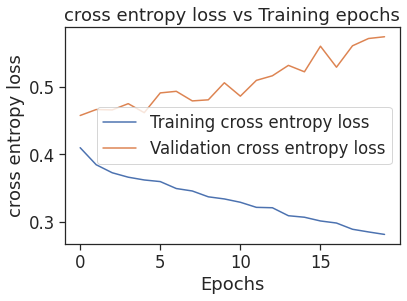

In [ ]:
plot_metrics(train_losses, val_losses, "cross entropy loss")

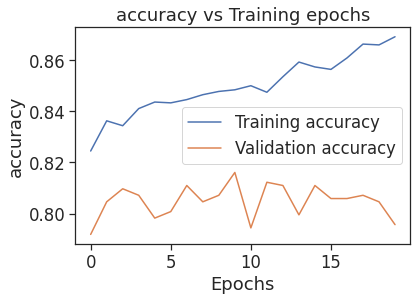

In [ ]:
plot_metrics(train_accs, val_accs, "accuracy")

In [ ]:
class ExportModule(tf.Module):
  def __init__(self, model, class_pred):
    # Initialize pre and postprocessing functions
    self.model = model
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, None], dtype=tf.float32)]) 
  def __call__(self, x):
    # Run the ExportModule for new data points
    x = tf.cast(x, tf.float32)
    y = self.model(x)
    y = self.class_pred(y)
    return y

def class_pred_test(y):
  # Generate class predictions from MLP output
  return tf.argmax(tf.nn.softmax(y), axis=1)

import tempfile
import os

mlp_model_export = ExportModule(model=mlp_model,class_pred=class_pred_test)

models = tempfile.mkdtemp()
save_path = os.path.join(models, 'mlp_model_export')
tf.saved_model.save(mlp_model_export, save_path)

mlp_loaded = tf.saved_model.load(save_path)

def accuracy_score(y_pred, y):
  # Generic accuracy function
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

x_test = tf.convert_to_tensor(X_test.values, tf.float32)
y_test = tf.convert_to_tensor(y_test)

test_classes = mlp_loaded(x_test)
display_model_performance_metrics(y_test.numpy(), test_classes.numpy(), target_names)
print()
test_auc = roc_auc_score_multiclass(y_test.numpy(), test_classes.numpy(), target_names)
print(f"AUC: {test_auc[1]:2.2%}")

Model Performance metrics:
------------------------------
Accuracy:  82.72% 
Precision: 80.91% 
Recall:    82.72% 
F1 Score:  81.21% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.86      0.94      0.89       768
        high       0.65      0.43      0.52       206

    accuracy                           0.83       978
   macro avg       0.50      0.46      0.47       978
weighted avg       0.81      0.83      0.81       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low             0      4    0
        medium          0    720   48
        high            0    117   89

AUC: 68.08%


In [ ]:
print("Accuracy breakdown by quality class:")
print("---------------------------")
label_accs = {}
for label in range(0, 3):
  label_ind = (y_test == label)
  # extract predictions for specific true label
  pred_label = test_classes[label_ind]
  label_filled = tf.cast(tf.fill(pred_label.shape[0], label), tf.int64)
  # compute class-wise accuracy
  label_accs[accuracy_score(pred_label, label_filled).numpy()] = label
for key in sorted(label_accs):
  print(f"Quality {label_accs[key]}: {key:.3f}")

Accuracy breakdown by quality class:
---------------------------
Quality 0: 0.000
Quality 2: 0.432
Quality 1: 0.938


### Balanced Data

#### Smote

In [ ]:
class_ql = {'low':0, 'medium': 1, 'high': 2}
y_ql = wines_binary_norm.quality.map(class_ql)

wqp_class_labels = np.array(wines_binary['quality'])
target_names = ['low', 'medium', 'high']

cols = wines_binary_norm.columns
cols = list(cols.drop(['quality']))
X_train, X_test, y_train, y_test = train_test_split(wines_binary_norm.loc[:, cols], y_ql.values, test_size=0.20, shuffle=True, random_state=101)


class select_fetaures(object):  # BaseEstimator, TransformerMixin,
     def __init__(self, select_cols):
         self.select_cols_ = select_cols

     def fit(self, X, Y):
         pass

     def transform(self, X):
         return X.loc[:, self.select_cols_]

     def fit_transform(self, X, Y):
         self.fit(X, Y)
         df = self.transform(X)
         return df

     def __getitem__(self, x):
         return self.X[x], self.Y[x]


cols_clean = cols.copy()
cols_clean.remove('total_sulfur_dioxide')
cols_clean.remove('residual_sugar')

os = SMOTE(random_state=101)
X_train1, y_train1 = os.fit_resample(X_train, y_train)

##### NaiveBayes

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 70.11%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  59.61% 
Precision: 80.00% 
Recall:    59.61% 
F1 Score:  65.60% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.91      0.56      0.69       768
        high       0.42      0.74      0.53       206

    accuracy                           0.60       978
   macro avg       0.44      0.43      0.41       978
weighted avg       0.80      0.60      0.66       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low             0      2    2
        medium     

2022-12-05 22:56:02,025 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


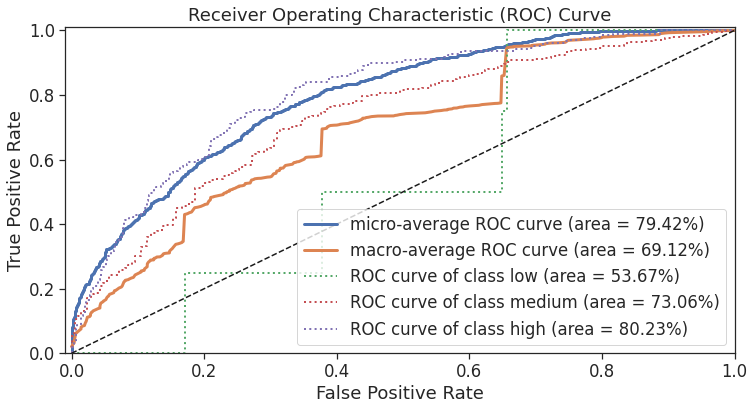

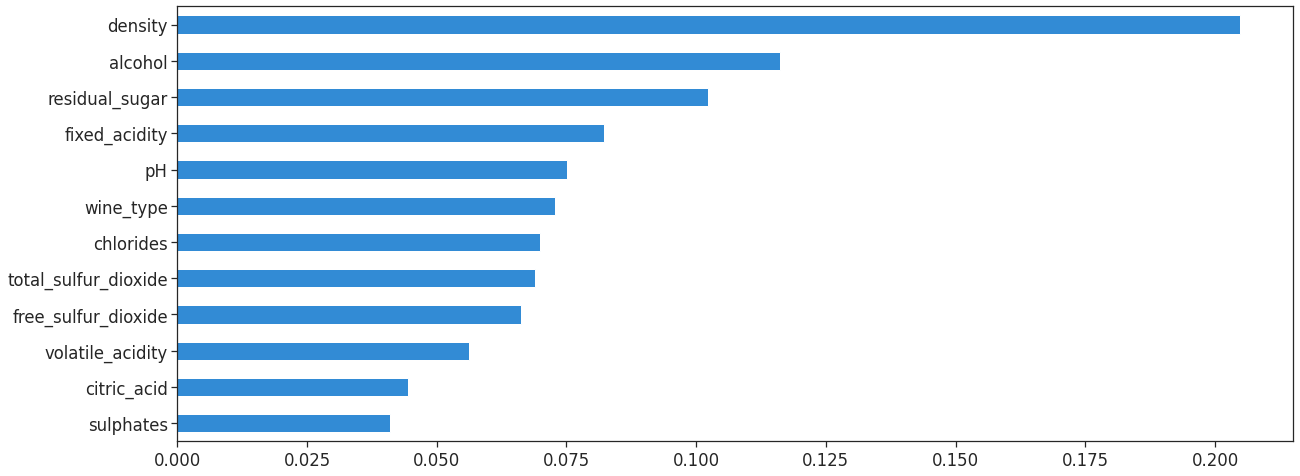

In [ ]:
starting_timenb = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', GaussianNB())])  
param_grid = {}

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
NB = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('gs', gs)
 ]) 

NB.fit(X_train1,y_train1)
results = get_results(NB, 'Naive Bayes - Smote', X_test, y_test, 
                      target_names = target_names, reasume=True)

end_timenb = datetime.datetime.now()
difnb_s = end_timenb - starting_timenb
results_smote = results.copy()

##### KNN 

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Mean Best Accuracy: 83.86%
------------------------------------------------------------
Best Parameters:
{'clf__metric': 'manhattan', 'clf__n_neighbors': 23}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  63.91% 
Precision: 81.72% 
Recall:    63.91% 
F1 Score:  68.52% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.01      0.25      0.02         4
      medium       0.93      0.60      0.73       768
        high       0.41      0.81      0.54       206

    accuracy                           0.64       978
   macro avg       0.45      0.55      0.43       978
weighted avg       0.82      0.64      0.69       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual:

2022-12-05 22:56:11,346 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


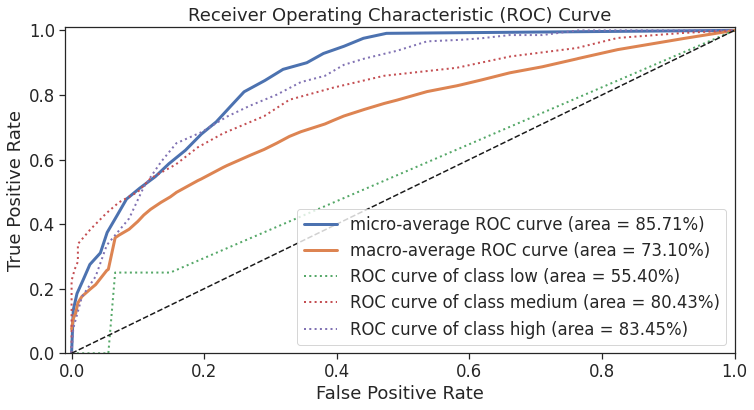

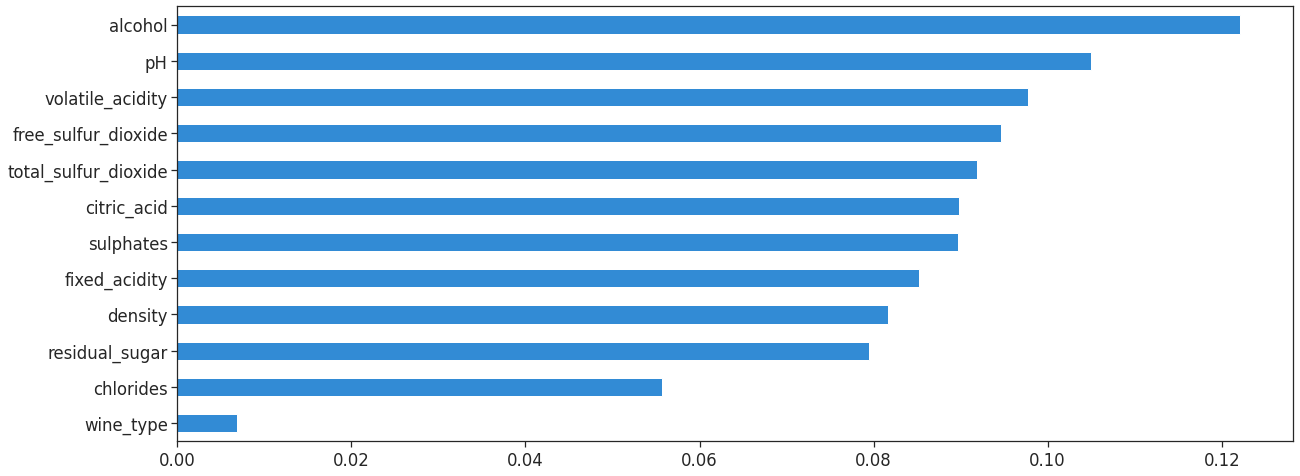

In [ ]:
starting_timeknn = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', KNeighborsClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols_clean
param_grid =\
    [{'clf__n_neighbors': [23]   #range(1,200,2)
     ,'clf__metric': ['manhattan', 'euclidean', 'minkowski '] 
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

KNNC = Pipeline([
      #  ('sel', select_fetaures(select_cols=SEL)),
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

KNNC.fit(X_train1,y_train1)

results = get_results(KNNC, 'KNN - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timeknn = datetime.datetime.now()
difknn_s = end_timeknn - starting_timeknn
results_smote = results_smote.append(results)

##### Logistic Regression 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 69.31%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  57.46% 
Precision: 80.12% 
Recall:    57.46% 
F1 Score:  64.27% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.01      0.25      0.01         4
      medium       0.90      0.54      0.67       768
        high       0.44      0.73      0.55       206

    accuracy                           0.57       978
   macro avg       0.45      0.50      0.41       978
weighted avg       0.80      0.57      0.64       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low             1      2    1
        medium     

2022-12-05 22:56:17,071 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


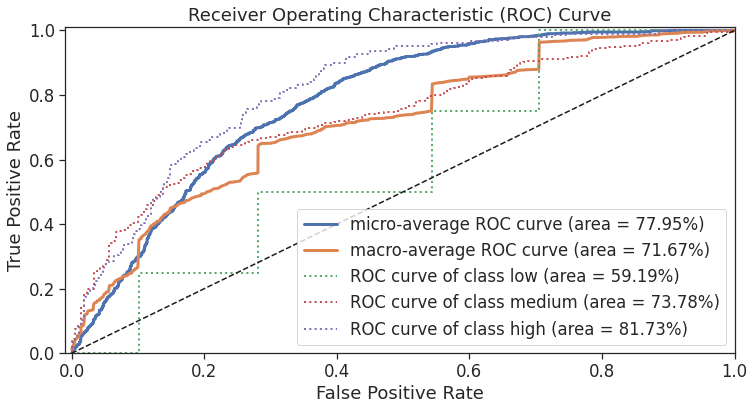

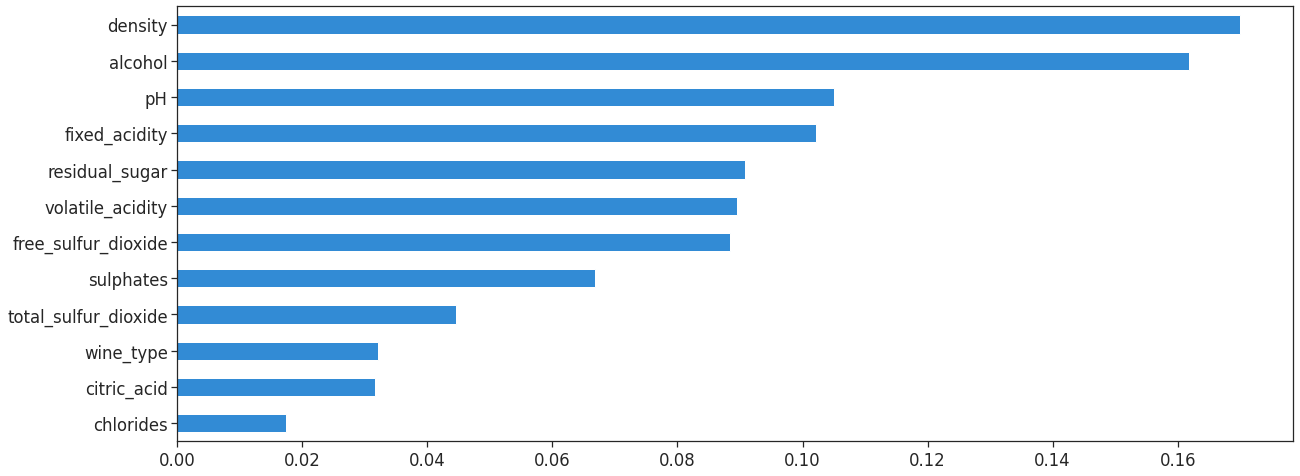

In [ ]:
starting_timelr = datetime.datetime.now()
clf = Pipeline([
            ('pca', PCA()),
            ('clf', LogisticRegression())])  

param_grid = {}
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

LR = Pipeline([
      #  ('sel', select_fetaures(select_cols=SEL)),
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ])  

LR.fit(X_train1,y_train1)

results =get_results(LR, 'Logistic Regression - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timelr = datetime.datetime.now()
diflr_s = end_timelr - starting_timelr
results_smote = results_smote.append(results)

##### Decision Tree 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 75.02%
------------------------------------------------------------
Best Parameters:
{'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_leaf': 117}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  63.60% 
Precision: 79.14% 
Recall:    63.60% 
F1 Score:  68.54% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.02      0.50      0.04         4
      medium       0.90      0.62      0.73       768
        high       0.41      0.70      0.52       206

    accuracy                           0.64       978
   macro avg       0.44      0.61      0.43       978
weighted avg       0.79      0.64      0.69       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                 

2022-12-05 22:56:19,927 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


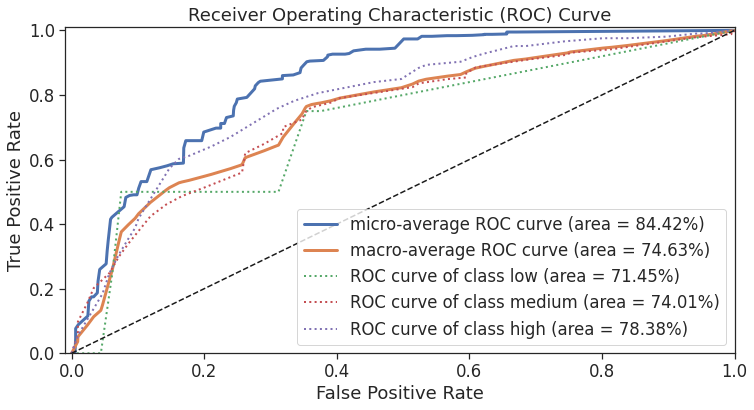

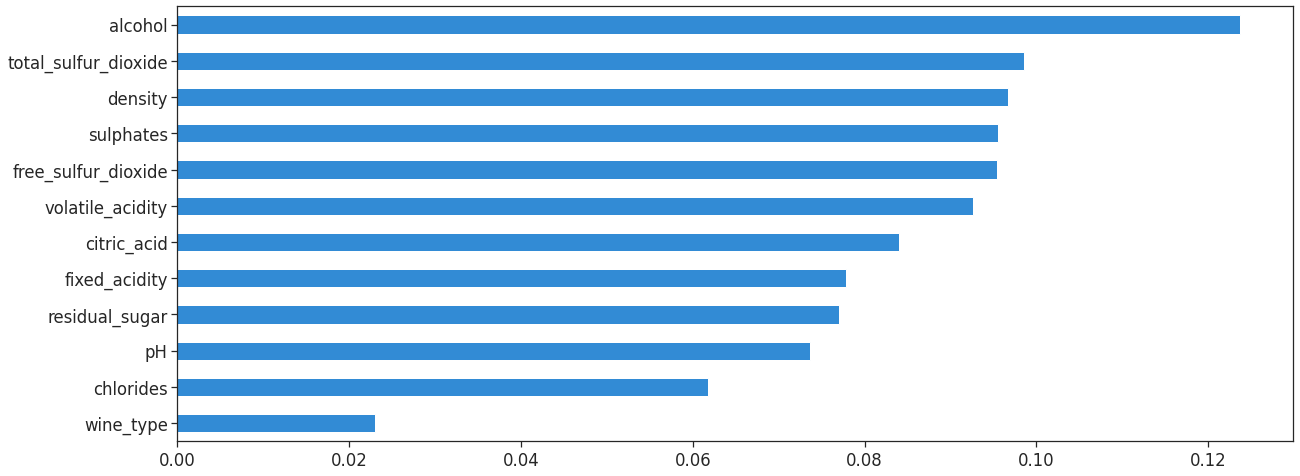

In [ ]:
starting_timedt = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', DecisionTreeClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__criterion': ['entropy'] #['gini', 'entropy']
      ,'clf__max_depth': [6] #range(1, 51) # [15, 20, 25]
      ,'clf__min_samples_leaf':  [117]  # range(100, 150) 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
DT = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

DT.fit(X_train1,y_train1)

results = get_results(DT, 'Decision Tree - Smote', X_test, y_test, target_names = target_names, results = results, reasume=False)
end_timedt = datetime.datetime.now()
difdt_s = end_timedt - starting_timedt
results_smote = results_smote.append(results)

##### Support Vector Machine

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Mean Best Accuracy: 80.24%
------------------------------------------------------------
Best Parameters:
{'clf__C': 0.08, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  69.73% 
Precision: 82.18% 
Recall:    69.73% 
F1 Score:  73.17% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.02      0.25      0.04         4
      medium       0.93      0.67      0.78       768
        high       0.44      0.81      0.57       206

    accuracy                           0.70       978
   macro avg       0.46      0.58      0.46       978
weighted avg       0.82      0.70      0.73       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Ac

2022-12-05 23:07:08,067 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


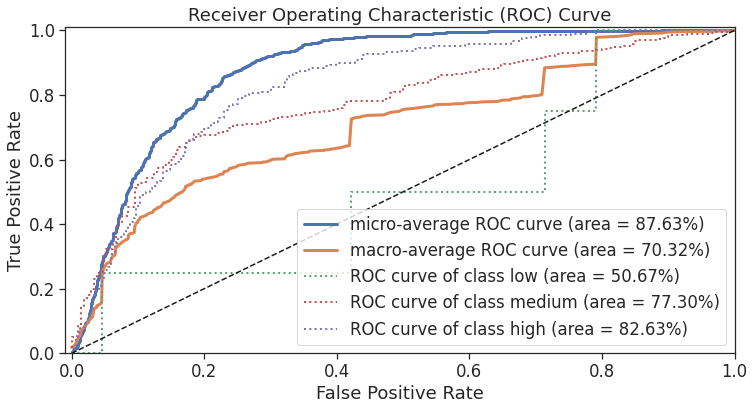

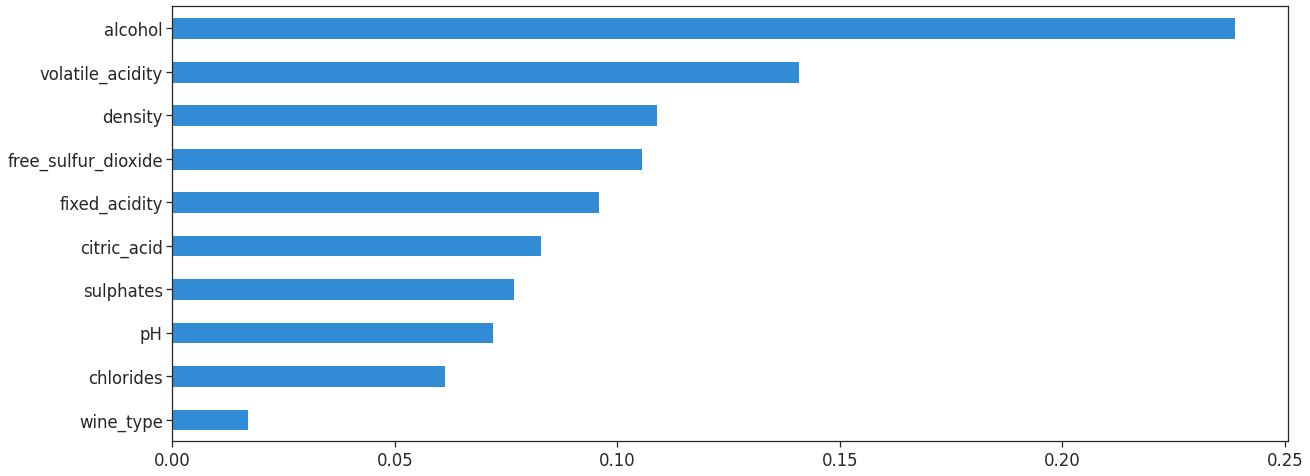

In [ ]:
from sklearn.svm import SVC, LinearSVC
starting_timesvm = datetime.datetime.now()
clf = Pipeline([
                ('pca', PCA()),
                ('clf', SVC())])
 
# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__C': [0.06, 0.08, 0.07] #, 1.0, 10.0, 100.0, 1000.0]
     ,'clf__gamma': [0.1] #[1,0.1,0.01,0.001]
     ,'clf__kernel' : ['rbf'] #['rbf', 'poly', 'sigmoid']
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

SVC = Pipeline([
        ('sel', select_fetaures(select_cols=SEL)),
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ])  

SVC.fit(X_train1,y_train1)

results  = get_results(SVC, 'Support Vector Machine - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timesvm = datetime.datetime.now()
difsvm_s = end_timesvm - starting_timesvm
results_smote = results_smote.append(results)

##### Linear Vector Support

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Mean Best Accuracy: 67.36%
------------------------------------------------------------
Best Parameters:
{'clf__C': 0.06, 'clf__dual': True, 'clf__loss': 'squared_hinge', 'clf__max_iter': 15, 'clf__penalty': 'l2', 'clf__tol': 1e-06}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  52.66% 
Precision: 82.20% 
Recall:    52.66% 
F1 Score:  59.46% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.01      0.50      0.02         4
      medium       0.94      0.45      0.61       768
        high       0.41      0.80      0.55       206

    accuracy                           0.53       978
   macro avg       0.45      0.58      0.39       978
weighted avg       0.82      0.53      0.59       978


Prediction Confusion Matrix:
------------------------------
      

2022-12-05 22:56:34,891 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


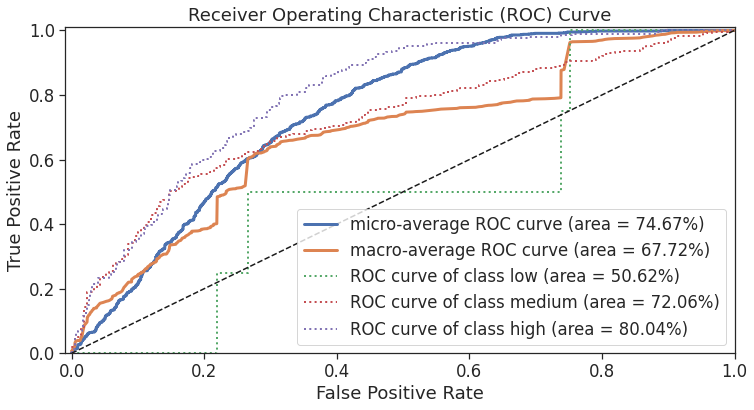

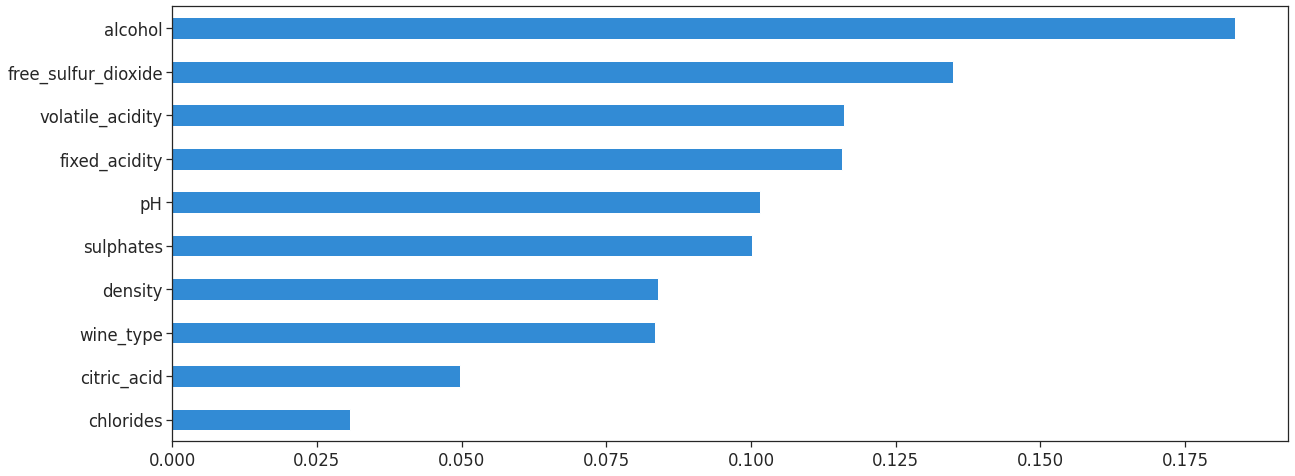

In [ ]:
starting_timesvc = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', LinearSVC())])

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols_clean
param_grid =\
    [{'clf__loss': ['hinge', 'squared_hinge']
     ,'clf__tol': [1e-06]
     ,'clf__C': [0.06, 0.08, 0.07] #, 1.0, 10.0, 100.0, 1000.0]
     ,'clf__penalty': ['l2']
     ,'clf__max_iter' : [10, 15, 9]
     ,'clf__dual' : [True,False]
     }
    ]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

LSVC = Pipeline([
        ('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ])  

LSVC.fit(X_train1,y_train1)

results = get_results(LSVC, 'Linear SVC - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timesvc = datetime.datetime.now()
difsvc_s= end_timesvc - starting_timesvc
results_smote = results_smote.append(results)

##### Random Forest 

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Mean Best Accuracy: 81.75%
------------------------------------------------------------
Best Parameters:
{'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_split': 117, 'clf__n_estimators': 2000}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  71.37% 
Precision: 82.46% 
Recall:    71.37% 
F1 Score:  74.49% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.93      0.69      0.79       768
        high       0.45      0.81      0.58       206

    accuracy                           0.71       978
   macro avg       0.46      0.50      0.46       978
weighted avg       0.82      0.71      0.74       978


Prediction Confusion Matrix:
------------------------------
               Predicted:     

2022-12-05 23:05:37,715 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


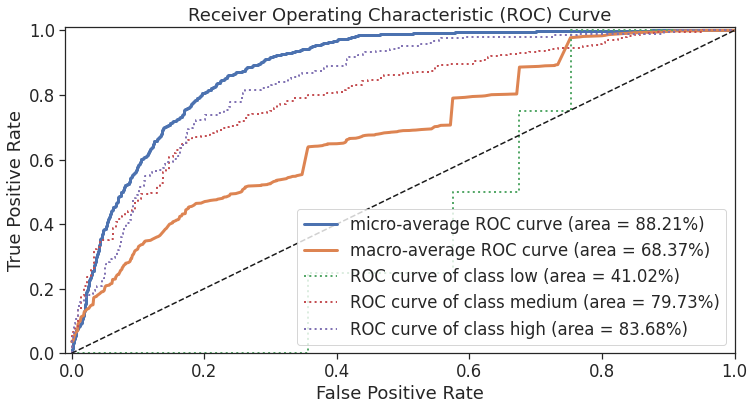

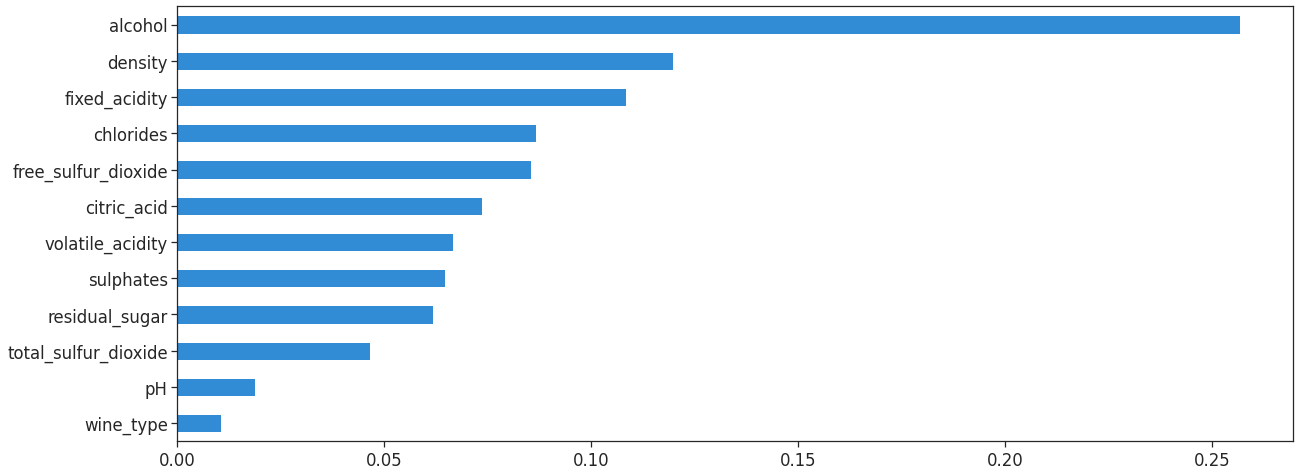

In [ ]:
starting_timerf = datetime.datetime.now()
clf = Pipeline([
                #('pca', PCA()),
                ('clf', RandomForestClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{ 'clf__criterion': ['gini', 'entropy']
      ,'clf__n_estimators':  [2000]       
      ,'clf__min_samples_split': [117]
      ,'clf__max_depth': [6] #, 3, 4, 5, 10] #

}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
RF = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 
     
RF.fit(X_train1,y_train1)

results = get_results(RF, 'Random Forest - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timerf = datetime.datetime.now()
difrf_s = end_timerf - starting_timerf
results_smote = results_smote.append(results)

##### Gradient Boosting

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 92.44%
------------------------------------------------------------
Best Parameters:
{'clf__learning_rate': 0.01, 'clf__max_depth': 10, 'clf__n_estimators': 400}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  79.35% 
Precision: 79.75% 
Recall:    79.35% 
F1 Score:  79.52% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.87      0.87      0.87       768
        high       0.56      0.51      0.53       206

    accuracy                           0.79       978
   macro avg       0.47      0.46      0.47       978
weighted avg       0.80      0.79      0.80       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                     

2022-12-05 23:25:05,907 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


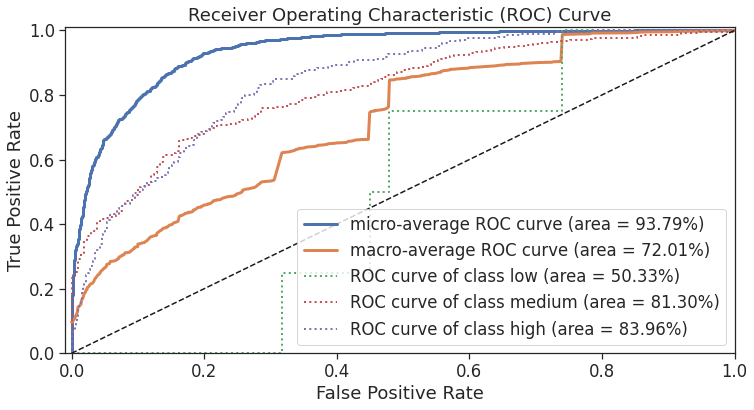

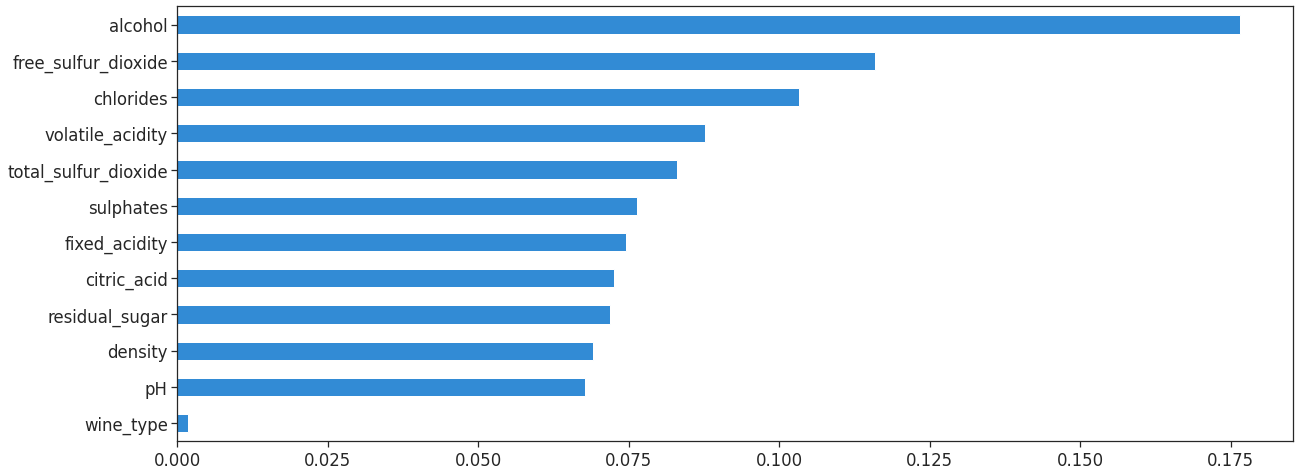

In [ ]:
starting_timegb = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', GradientBoostingClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [1e-02] #, 5e-03, 2e-02]
     ,'clf__max_depth': [10]
     ,'clf__n_estimators' : [400] 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

GBC = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ])  

GBC.fit(X_train1,y_train1)

results = get_results(GBC, 'Gradient Boosting - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timegb = datetime.datetime.now()
difgb_s = end_timegb - starting_timegb
results_smote = results_smote.append(results)

##### AdaBoost 

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Mean Best Accuracy: 78.85%
------------------------------------------------------------
Best Parameters:
{'clf__algorithm': 'SAMME.R', 'clf__learning_rate': 0.2, 'clf__n_estimators': 500}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  65.24% 
Precision: 81.20% 
Recall:    65.24% 
F1 Score:  69.09% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.93      0.61      0.74       768
        high       0.40      0.83      0.54       206

    accuracy                           0.65       978
   macro avg       0.44      0.48      0.42       978
weighted avg       0.81      0.65      0.69       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
               

2022-12-05 23:31:53,743 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


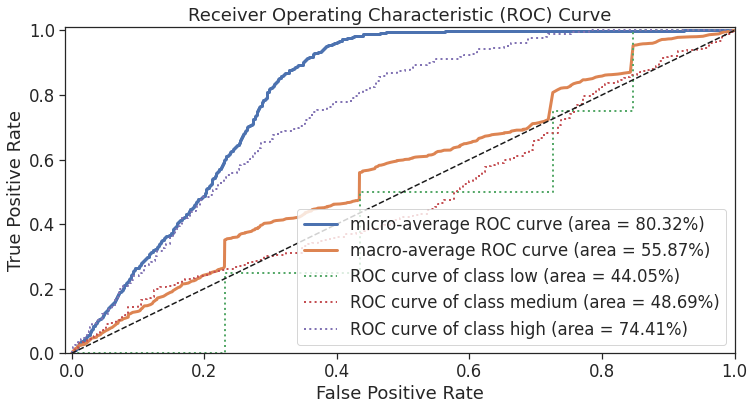

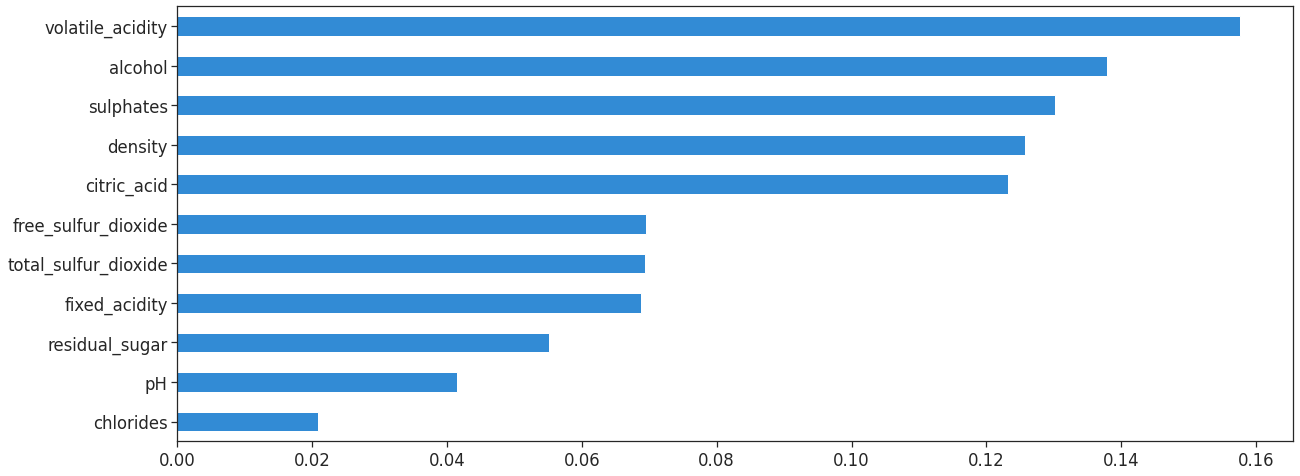

In [ ]:
starting_timeab = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', AdaBoostClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [2e-01, 15e-02]
     ,'clf__n_estimators': [500, 600, 700] 
     ,'clf__algorithm' : ['SAMME.R'] # 'SAMME'
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

ADAB = Pipeline([
     #   ('scl', StandardScaler()),
        ('gs', gs)
 ])  

ADAB.fit(X_train1,y_train1)

results = get_results(ADAB, 'AdaBoost - Smote', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
results_imbalanced = results_imbalanced.append(results)
end_timeab = datetime.datetime.now()
difab_s = end_timeab - starting_timeab
results_smote = results_smote.append(results)

##### Artificial Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(22)

#train_valid, test = train_test_split(wines_binary_norm, test_size=0.20, shuffle=True, random_state=101)

train = X_train.copy()
train['quality'] = y_train

train, valid = train_test_split(train, test_size=0.20, shuffle=True, random_state=101)

#balance the training dataset
from imblearn.over_sampling import SMOTE
label = train.pop('quality')
os = SMOTE(random_state=101)
train, label = os.fit_resample(train, label)

train['quality'] = label

target_train = train.pop('quality')
tf_train = tf.data.Dataset.from_tensor_slices((train.values, target_train.values))

target_valid = valid.pop('quality')
tf_valid = tf.data.Dataset.from_tensor_slices((valid.values, target_valid.values))

tf_train = tf_train.shuffle(len(train)).batch(1)
tf_valid = tf_valid.shuffle(len(valid)).batch(1)

def xavier_init(shape):
  # Computes the xavier initialization values for a weight matrix
  in_dim, out_dim = shape
  xavier_lim = tf.sqrt(6.)/tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))
  weight_vals = tf.random.uniform(shape=(in_dim, out_dim), 
                                  minval=-xavier_lim, maxval=xavier_lim, seed=22)
  return weight_vals

class DenseLayer(tf.Module):

  def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):
    # Initialize the dimensions and activation functions
    self.out_dim = out_dim
    self.weight_init = weight_init
    self.activation = activation
    self.built = False

  def __call__(self, x):
    if not self.built:
      # Infer the input dimension based on first call
      self.in_dim = x.shape[1]
      # Initialize the weights and biases using Xavier scheme
      self.w = tf.Variable(xavier_init(shape=(self.in_dim, self.out_dim)))
      self.b = tf.Variable(tf.zeros(shape=(self.out_dim,)))
      self.built = True
    # Compute the forward pass
    z = tf.add(tf.matmul(x, self.w), self.b)
    return self.activation(z)

class MLP(tf.Module):

  def __init__(self, layers):
    self.layers = layers

  @tf.function
  def __call__(self, x, preds=False): 
    # Execute the model's layers sequentially
    for layer in self.layers:
      x = layer(x)
    return x

def cross_entropy_loss(y_pred, y):
  # Compute cross entropy loss with a sparse operation
  sparse_ce = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(sparse_ce)

def accuracy(y_pred, y):
  # Compute accuracy after extracting class predictions
  class_preds = tf.argmax(tf.nn.softmax(y_pred), axis=1)
  is_equal = tf.equal(y, class_preds)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

class Adam:

    def __init__(self, learning_rate=1e-3, beta_1=0.9, beta_2=0.999, ep=1e-7):
      # Initialize optimizer parameters and variable slots
      self.beta_1 = beta_1
      self.beta_2 = beta_2
      self.learning_rate = learning_rate
      self.ep = ep
      self.t = 1.
      self.v_dvar, self.s_dvar = [], []
      self.built = False

    def apply_gradients(self, grads, vars):
      # Initialize variables on the first call
      if not self.built:
        for var in vars:
          v = tf.Variable(tf.zeros(shape=var.shape))
          s = tf.Variable(tf.zeros(shape=var.shape))
          self.v_dvar.append(v)
          self.s_dvar.append(s)
        self.built = True
      # Update the model variables given their gradients
      for i, (d_var, var) in enumerate(zip(grads, vars)):
        self.v_dvar[i].assign(self.beta_1*self.v_dvar[i] + (1-self.beta_1)*d_var)
        self.s_dvar[i].assign(self.beta_2*self.s_dvar[i] + (1-self.beta_2)*tf.square(d_var))
        v_dvar_bc = self.v_dvar[i]/(1-(self.beta_1**self.t))
        s_dvar_bc = self.s_dvar[i]/(1-(self.beta_2**self.t))
        var.assign_sub(self.learning_rate*(v_dvar_bc/(tf.sqrt(s_dvar_bc) + self.ep)))
      self.t += 1.
      return

def train_step(x_batch, y_batch, loss, acc, model, optimizer):
  # Update the model state given a batch of data
  x_batch = tf.cast(x_batch, tf.float32)
  with tf.GradientTape() as tape:
    y_pred = model(x_batch)
    batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  grads = tape.gradient(batch_loss, model.variables)
  optimizer.apply_gradients(grads, model.variables)
  return batch_loss, batch_acc

def val_step(x_batch, y_batch, loss, acc, model):
  # Evaluate the model on given a batch of validation data
  x_batch = tf.cast(x_batch, tf.float32)
  y_pred = model(x_batch)
  batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  return batch_loss, batch_acc

def train_model(mlp, train_data, val_data, loss, acc, optimizer, epochs):
  # Initialize data structures
  train_losses, train_accs = [], []
  val_losses, val_accs = [], []

  # Format training loop and begin training
  for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_val, batch_accs_val = [], []

    # Iterate over the training data
    for x_batch, y_batch in train_data:
      # Compute gradients and update the model's parameters
      batch_loss, batch_acc = train_step(x_batch, y_batch, loss, acc, mlp, optimizer)
      # Keep track of batch-level training performance
      batch_losses_train.append(batch_loss)
      batch_accs_train.append(batch_acc)

    # Iterate over the validation data
    for x_batch, y_batch in val_data:
      batch_loss, batch_acc = val_step(x_batch, y_batch, loss, acc, mlp)
      batch_losses_val.append(batch_loss)
      batch_accs_val.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    val_loss, val_acc = tf.reduce_mean(batch_losses_val), tf.reduce_mean(batch_accs_val)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"Epoch: {epoch}")
    print(f"Training loss: {train_loss:.3f}, Training accuracy: {train_acc:.3f}")
    print(f"Validation loss: {val_loss:.3f}, Validation accuracy: {val_acc:.3f}")
  return train_losses, train_accs, val_losses, val_accs

def plot_metrics(train_metric, val_metric, metric_type):
  # Visualize metrics vs training Epochs
  plt.figure()
  plt.plot(range(len(train_metric)), train_metric, label = f"Training {metric_type}")
  plt.plot(range(len(val_metric)), val_metric, label = f"Validation {metric_type}")
  plt.xlabel("Epochs")
  plt.ylabel(metric_type)
  plt.legend()
  plt.title(f"{metric_type} vs Training epochs");


hidden_layer_1_size = 100
hidden_layer_2_size = 40
#hidden_layer_3_size = 30
output_size = 3

mlp_model = MLP([
    DenseLayer(out_dim=hidden_layer_1_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_2_size, activation=tf.nn.relu),
   # DenseLayer(out_dim=hidden_layer_3_size, activation=tf.nn.relu),
    DenseLayer(out_dim=output_size)])

starting_timeann_s = datetime.datetime.now()
train_losses, train_accs, val_losses, val_accs = train_model(mlp_model, tf_train, tf_valid, 
                                                             loss=cross_entropy_loss, acc=accuracy,
                                                             optimizer=Adam(), epochs=11)
end_timeann = datetime.datetime.now()
difann_s= end_timeann - starting_timeann

In [ ]:
plot_metrics(train_losses, val_losses, "cross entropy loss")

In [ ]:
plot_metrics(train_accs, val_accs, "accuracy")

In [ ]:
class ExportModule(tf.Module):
  def __init__(self, model, class_pred):
    # Initialize pre and postprocessing functions
    self.model = model
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, None], dtype=tf.float32)]) 
  def __call__(self, x):
    # Run the ExportModule for new data points
    x = tf.cast(x, tf.float32)
    y = self.model(x)
    y = self.class_pred(y)
    return y

def class_pred_test(y):
  # Generate class predictions from MLP output
  return tf.argmax(tf.nn.softmax(y), axis=1)

import tempfile
import os

mlp_model_export = ExportModule(model=mlp_model,class_pred=class_pred_test)

models = tempfile.mkdtemp()
save_path = os.path.join(models, 'mlp_model_export')
tf.saved_model.save(mlp_model_export, save_path)

mlp_loaded = tf.saved_model.load(save_path)

def accuracy_score(y_pred, y):
  # Generic accuracy function
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

x_test = tf.convert_to_tensor(X_test.values, tf.float32)
y_test = tf.convert_to_tensor(y_test)

test_classes = mlp_loaded(x_test)
display_model_performance_metrics(y_test.numpy(), test_classes.numpy(), target_names)
print()
test_auc = roc_auc_score_multiclass(y_test.numpy(), test_classes.numpy(), target_names)
print(f"AUC: {test_auc[1]:2.2%}")

In [ ]:
print("Accuracy breakdown by quality class:")
print("---------------------------")
label_accs = {}
for label in range(0, 3):
  label_ind = (y_test == label)
  # extract predictions for specific true label
  pred_label = test_classes[label_ind]
  label_filled = tf.cast(tf.fill(pred_label.shape[0], label), tf.int64)
  # compute class-wise accuracy
  label_accs[accuracy_score(pred_label, label_filled).numpy()] = label
for key in sorted(label_accs):
  print(f"Quality {label_accs[key]}: {key:.3f}")

#### Oversampling

In [ ]:
class_ql = {'low':0, 'medium': 1, 'high': 2}
y_ql = wines_binary_norm.quality.map(class_ql)

wqp_class_labels = np.array(wines_binary['quality'])
target_names = ['low', 'medium', 'high']

cols = wines_binary_norm.columns
cols = list(cols.drop(['quality']))
X_train, X_test, y_train, y_test = train_test_split(wines_binary_norm.loc[:, cols], y_ql.values, test_size=0.20, shuffle=True, random_state=101)


class select_fetaures(object):  # BaseEstimator, TransformerMixin,
     def __init__(self, select_cols):
         self.select_cols_ = select_cols

     def fit(self, X, Y):
         pass

     def transform(self, X):
         return X.loc[:, self.select_cols_]

     def fit_transform(self, X, Y):
         self.fit(X, Y)
         df = self.transform(X)
         return df

     def __getitem__(self, x):
         return self.X[x], self.Y[x]


cols_clean = cols.copy()
cols_clean.remove('total_sulfur_dioxide')
cols_clean.remove('residual_sugar')

ros = RandomOverSampler(random_state=101)
X_train2, y_train2 = ros.fit_resample(X_train, y_train)

##### NaiveBayes 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 58.96%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  52.76% 
Precision: 80.24% 
Recall:    52.76% 
F1 Score:  59.43% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.92      0.47      0.63       768
        high       0.37      0.74      0.49       206

    accuracy                           0.53       978
   macro avg       0.43      0.41      0.37       978
weighted avg       0.80      0.53      0.59       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low             0      2    2
        medium     

2022-12-05 23:51:13,268 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


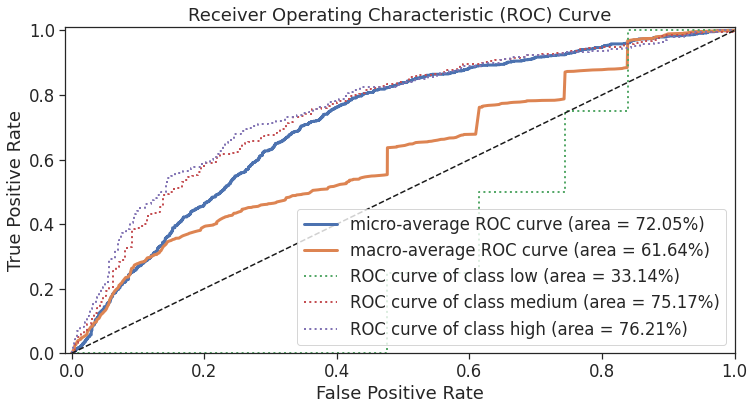

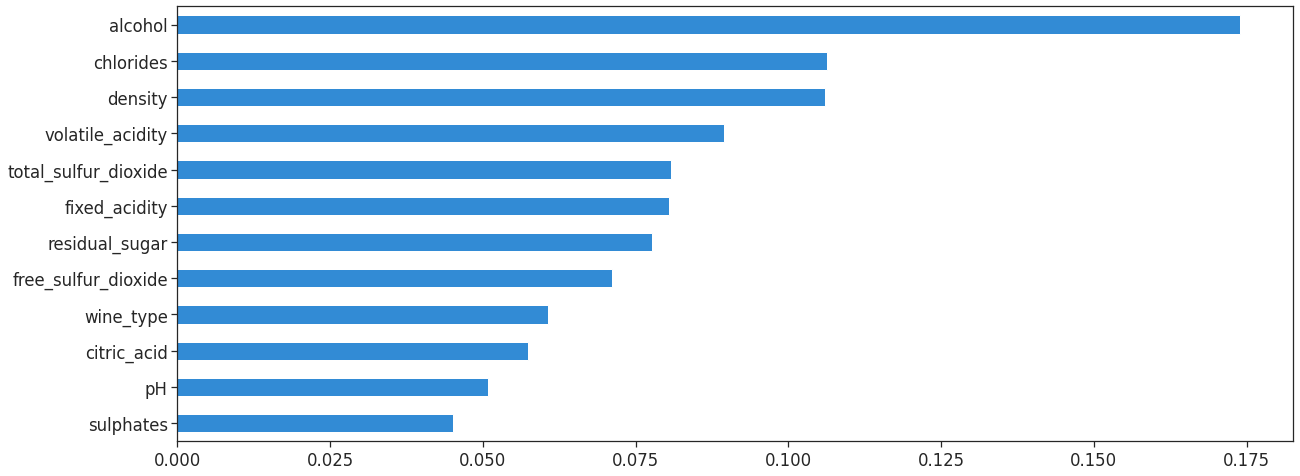

In [ ]:
starting_timenb = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA(random_state = 101)),
        ('clf', GaussianNB())])  
param_grid = {}

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
NB = Pipeline([
        #('sel', select_fetaures(select_cols=SEL)), 
        ('gs', gs)
 ]) 

NB.fit(X_train2,y_train2)
results = get_results(NB, 'Naive Bayes - Oversampling', X_test, y_test, 
                      target_names = target_names, reasume=True)
end_timenb = datetime.datetime.now()
difnb_o = end_timenb - starting_timenb
results_oversampling = results.copy()

##### KNN 

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Mean Best Accuracy: 84.02%
------------------------------------------------------------
Best Parameters:
{'clf__metric': 'euclidean', 'clf__n_neighbors': 23}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  73.01% 
Precision: 82.24% 
Recall:    73.01% 
F1 Score:  75.34% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.93      0.71      0.81       768
        high       0.44      0.81      0.57       206

    accuracy                           0.73       978
   macro avg       0.46      0.51      0.46       978
weighted avg       0.82      0.73      0.75       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual:

2022-12-05 23:51:23,662 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


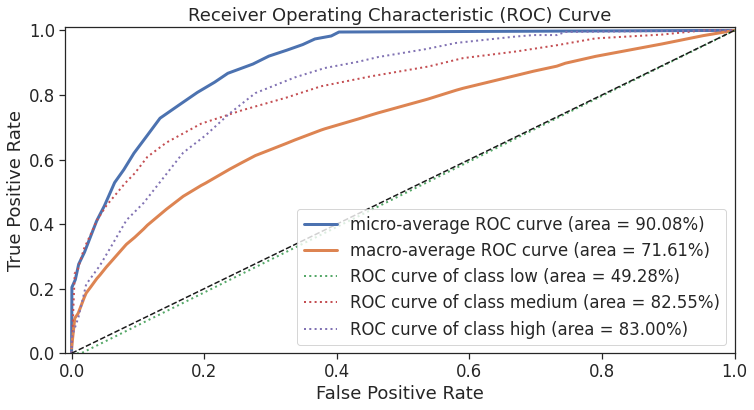

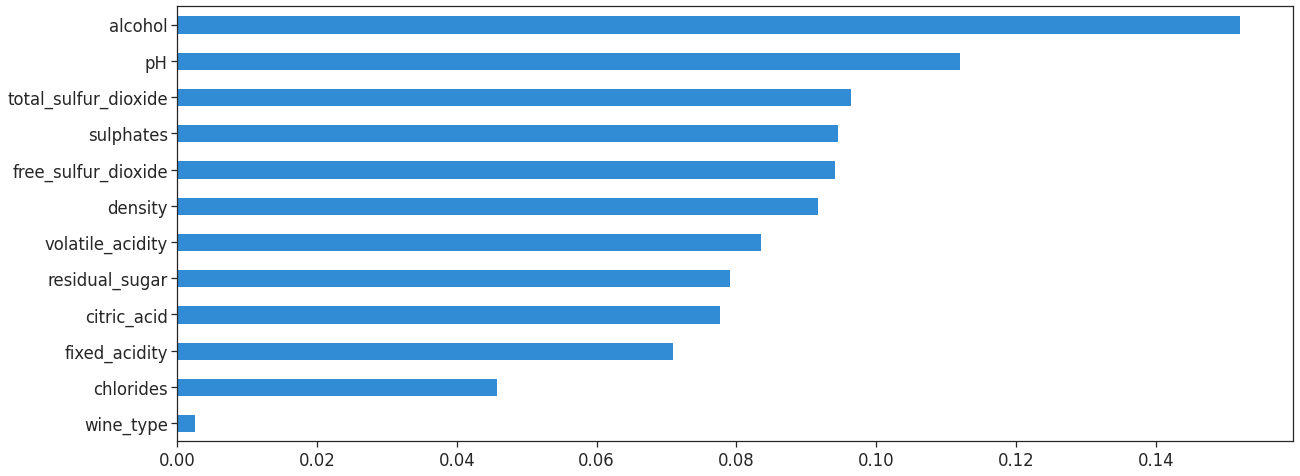

In [ ]:
starting_timeknn = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA(random_state = 101)),
        ('clf', KNeighborsClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols_clean
param_grid =\
    [{'clf__n_neighbors': [23]   #range(1,200,2)
     ,'clf__metric': ['manhattan', 'euclidean', 'minkowski '] 
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

KNNC = Pipeline([
      #  ('sel', select_fetaures(select_cols=SEL)),
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

KNNC.fit(X_train2,y_train2)

results = get_results(KNNC, 'KNN - Oversampling', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timeknn = datetime.datetime.now()
difknn_o = end_timeknn - starting_timeknn
results_oversampling = results_oversampling.append(results)

##### Logistic Regression 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Mean Best Accuracy: 69.04%
------------------------------------------------------------
Best Parameters:
{}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  56.13% 
Precision: 80.14% 
Recall:    56.13% 
F1 Score:  63.28% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.01      0.50      0.02         4
      medium       0.90      0.52      0.66       768
        high       0.44      0.72      0.55       206

    accuracy                           0.56       978
   macro avg       0.45      0.58      0.41       978
weighted avg       0.80      0.56      0.63       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low             2      1    1
        medium     

2022-12-05 23:51:30,545 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


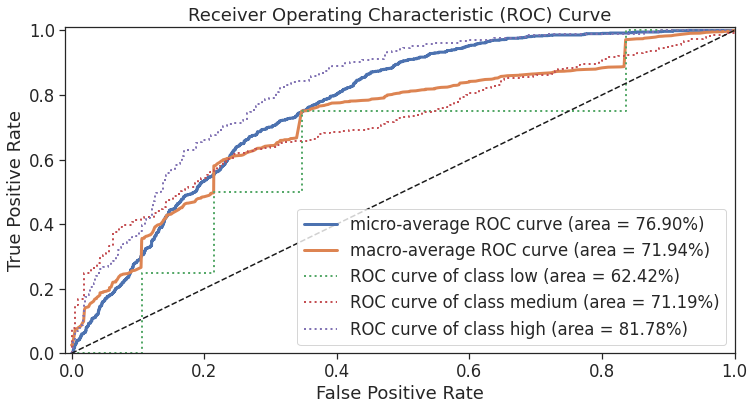

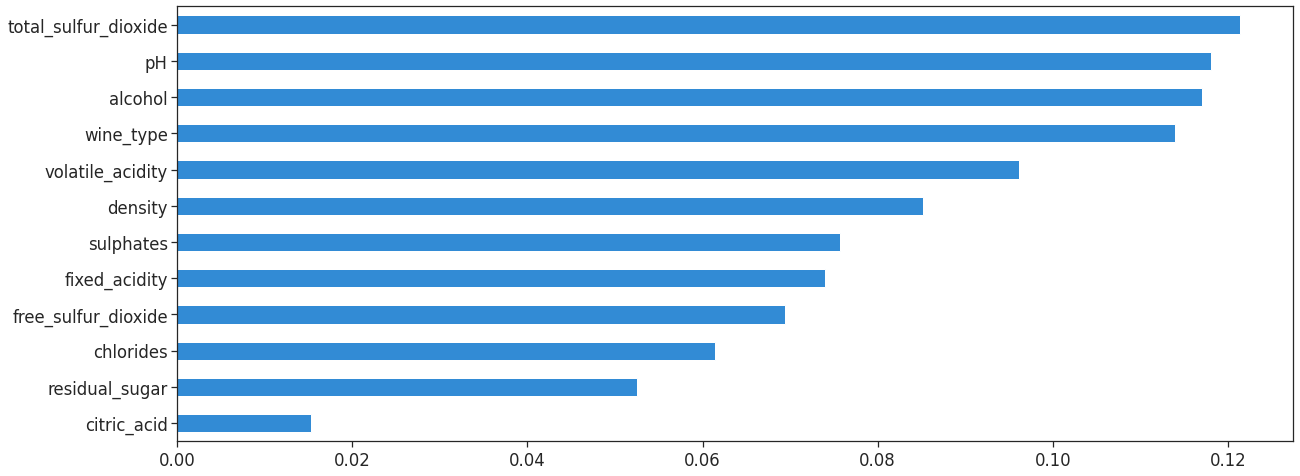

In [ ]:
starting_timelr = datetime.datetime.now()
clf = Pipeline([
        #('pca', PCA()),
        ('clf', LogisticRegression())])  

param_grid = {}
gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

LR = Pipeline([
      #  ('sel', select_fetaures(select_cols=SEL)),
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ])  

LR.fit(X_train2,y_train2)

results =get_results(LR, 'Logistic Regression - Oversampling', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timelr = datetime.datetime.now()
diflr_o = end_timelr - starting_timelr
results_oversampling = results_oversampling.append(results)

##### Decision Tree

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Mean Best Accuracy: 80.65%
------------------------------------------------------------
Best Parameters:
{'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 117}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  68.71% 
Precision: 77.60% 
Recall:    68.71% 
F1 Score:  71.97% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.88      0.71      0.78       768
        high       0.41      0.62      0.49       206

    accuracy                           0.69       978
   macro avg       0.43      0.44      0.43       978
weighted avg       0.78      0.69      0.72       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                    

2022-12-05 23:52:05,631 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


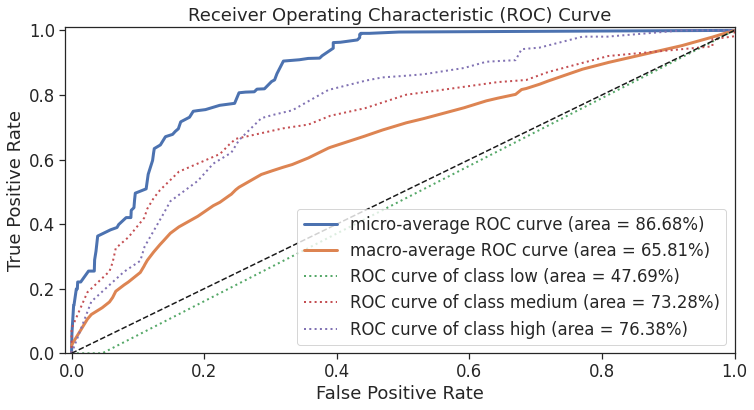

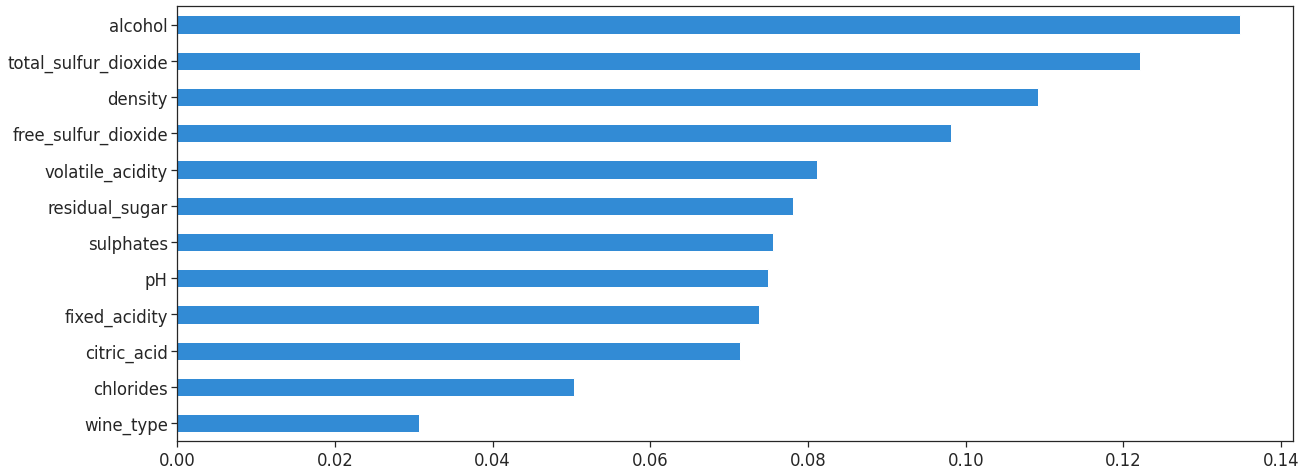

In [ ]:
starting_timedt = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', DecisionTreeClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__criterion': ['gini', 'entropy']
      ,'clf__max_depth': [6]  #range(1, 51)
      ,'clf__min_samples_leaf': [117]  # range(100, 150) 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
DT = Pipeline([
      #  ('scl', StandardScaler()),
        ('gs', gs)
 ]) 

DT.fit(X_train2,y_train2)

results = get_results(DT, 'Decision Tree - Oversampling', X_test, y_test, target_names = target_names, results = results, reasume=False)
end_timedt = datetime.datetime.now()
difdt_o = end_timedt - starting_timedt
results_oversampling = results_oversampling.append(results)

##### Support Vector Machine 

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Mean Best Accuracy: 82.25%
------------------------------------------------------------
Best Parameters:
{'clf__C': 0.08, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  72.39% 
Precision: 82.65% 
Recall:    72.39% 
F1 Score:  75.12% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         4
      medium       0.93      0.70      0.80       768
        high       0.45      0.82      0.58       206

    accuracy                           0.72       978
   macro avg       0.46      0.51      0.46       978
weighted avg       0.83      0.72      0.75       978


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Ac

2022-12-05 23:54:15,590 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


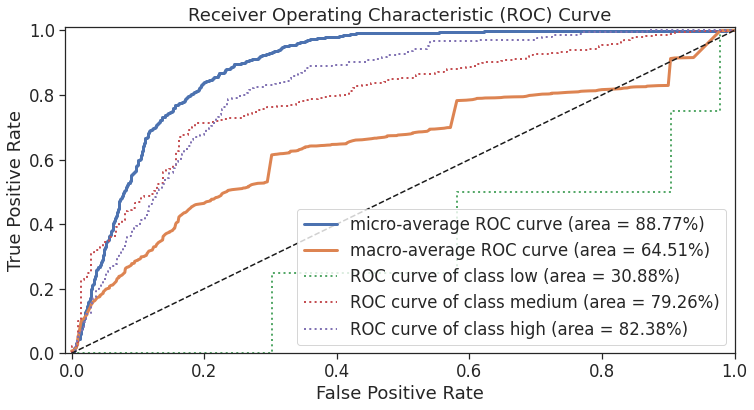

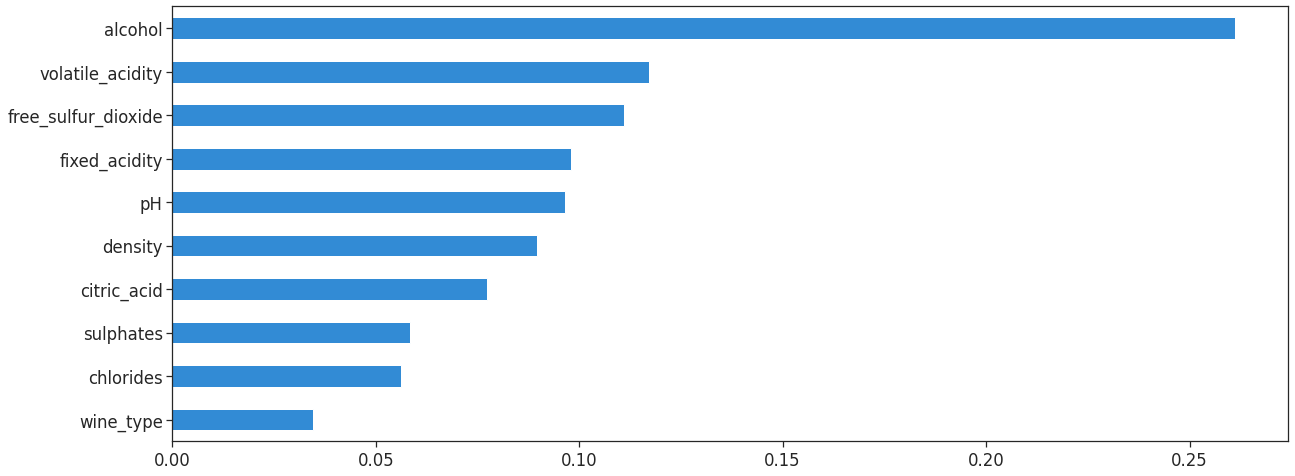

In [ ]:
from sklearn.svm import SVC, LinearSVC
starting_timesvm = datetime.datetime.now()
clf = Pipeline([
      #  ('pca', PCA()),
        ('clf', SVC())])
 

# a list of dictionaries to specify the parameters that we'd want to tune
C =  [0.06, 0.08, 0.07] #, 1.0, 10.0, 100.0, 1000.0]
Gamma = [0.1] #[1,0.1,0.01,0.001]
Kernel = ['rbf'] #['rbf', 'poly', 'sigmoid']
SEL = cols_clean
#n_components= [len(SEL)-2, len(SEL)-1, len(SEL)] 
#whiten = [True, False]

param_grid =\
    [{'clf__C': C
     ,'clf__gamma': Gamma
     ,'clf__kernel' : Kernel
     #,'pca__n_components' : n_components
     #,'pca__whiten' : whiten
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

SVC = Pipeline([
        ('sel', select_fetaures(select_cols=SEL)),
       # ('scl', StandardScaler()),
        #('lda', LDA(n_components = 2, store_covariance=True)),
        ('gs', gs)
 ])  

SVC.fit(X_train2,y_train2)

results  = get_results(SVC, 'Support Vector Machine - Oversampling', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timesvm = datetime.datetime.now()
difsvm_o = end_timesvm - starting_timesvm
results_oversampling = results_oversampling.append(results)

##### Linear Vector Support

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Mean Best Accuracy: 67.28%
------------------------------------------------------------
Best Parameters:
{'clf__C': 0.08, 'clf__dual': True, 'clf__loss': 'squared_hinge', 'clf__max_iter': 9, 'clf__penalty': 'l2', 'clf__tol': 1e-06}
------------------------------------------------------------
Model Performance metrics:
------------------------------
Accuracy:  50.92% 
Precision: 81.18% 
Recall:    50.92% 
F1 Score:  57.86% 

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.01      0.50      0.02         4
      medium       0.92      0.43      0.59       768
        high       0.41      0.79      0.54       206

    accuracy                           0.51       978
   macro avg       0.45      0.57      0.38       978
weighted avg       0.81      0.51      0.58       978


Prediction Confusion Matrix:
------------------------------
       

2022-12-05 23:52:17,638 - skater.core.explanations - WARNING - Multiprocessing failed, going single process


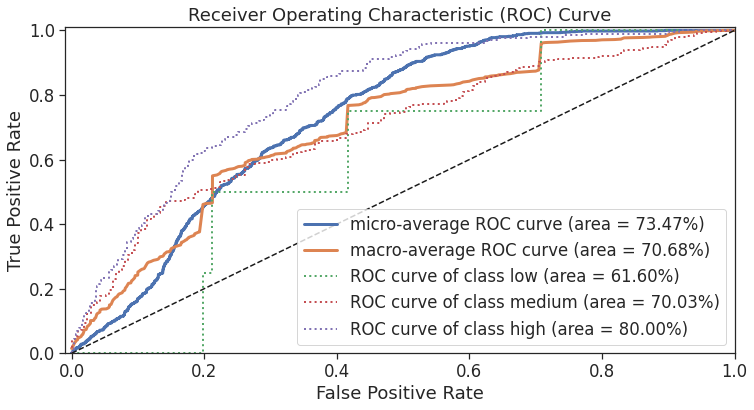

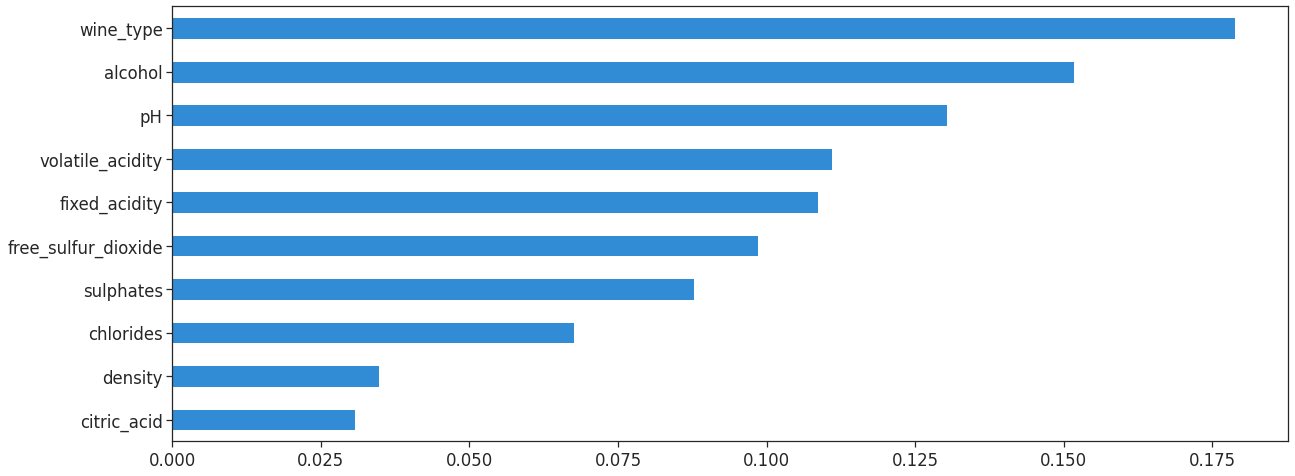

In [ ]:
starting_timesvc = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', LinearSVC())])

# a list of dictionaries to specify the parameters that we'd want to tune
SEL = cols_clean
param_grid =\
    [{'clf__loss': ['hinge', 'squared_hinge']
     ,'clf__tol': [1e-06]
     ,'clf__C': [0.06, 0.08, 0.07] #, 1.0, 10.0, 100.0, 1000.0]
     ,'clf__penalty': ['l2']
     ,'clf__max_iter' : [10, 15, 9]
     ,'clf__dual' : [True,False]
     }
    ]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

LSVC = Pipeline([
        ('sel', select_fetaures(select_cols=SEL)),
        ('scl', StandardScaler()),
        ('gs', gs)
 ])  

LSVC.fit(X_train2,y_train2)

results = get_results(LSVC, 'Linear SVC - Oversampling', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timesvc = datetime.datetime.now()
difsvc_o = end_timesvc - starting_timesvc
results_oversampling = results_oversampling.append(results)

##### Random Forest 

In [ ]:
starting_timerf = datetime.datetime.now()
clf = Pipeline([
                ('pca', PCA()),
                ('clf', RandomForestClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{ 'clf__criterion': ['gini', 'entropy']
      ,'clf__n_estimators':  [2000]       
      ,'clf__min_samples_split': [117]
      ,'clf__max_depth': [6] #, 3, 4, 5, 10] #

}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
RF = Pipeline([
    #    ('scl', StandardScaler()),
        ('gs', gs)
 ]) 
     
RF.fit(X_train2,y_train2)

results = get_results(RF, 'Random Forest - Oversampling', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timerf = datetime.datetime.now()
difrf_o = end_timerf - starting_timerf
results_oversampling = results_oversampling.append(results)

##### Gradient Boosting 

In [ ]:
starting_timegb = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', GradientBoostingClassifier())])  

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [1e-02] #, 5e-03, 2e-02]
     ,'clf__max_depth': [10]
     ,'clf__n_estimators' : [400] 
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

GBC = Pipeline([
     #   ('scl', StandardScaler()),
        ('gs', gs)
 ])  

GBC.fit(X_train2,y_train2)

results = get_results(GBC, 'Gradient Boosting - Oversampling', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timegb = datetime.datetime.now()
difgb_o = end_timegb - starting_timegb
results_oversampling = results_oversampling.append(results)

##### AdaBoost 

##### Artificial Neural Networks 

In [ ]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(22)

#train_valid, test = train_test_split(wines_binary_norm, test_size=0.20, shuffle=True, random_state=101)

train = X_train.copy()
train['quality'] = y_train

train, valid = train_test_split(train, test_size=0.20, shuffle=True, random_state=101)

#balance the training dataset
from imblearn.over_sampling import RandomOverSampler
label = train.pop('quality')
ros = RandomOverSampler(random_state=101)
train, label = ros.fit_resample(train, label)

train['quality'] = label

target_train = train.pop('quality')
tf_train = tf.data.Dataset.from_tensor_slices((train.values, target_train.values))

target_valid = valid.pop('quality')
tf_valid = tf.data.Dataset.from_tensor_slices((valid.values, target_valid.values))

tf_train = tf_train.shuffle(len(train)).batch(1)
tf_valid = tf_valid.shuffle(len(valid)).batch(1)

def xavier_init(shape):
  # Computes the xavier initialization values for a weight matrix
  in_dim, out_dim = shape
  xavier_lim = tf.sqrt(6.)/tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))
  weight_vals = tf.random.uniform(shape=(in_dim, out_dim), 
                                  minval=-xavier_lim, maxval=xavier_lim, seed=22)
  return weight_vals

class DenseLayer(tf.Module):

  def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):
    # Initialize the dimensions and activation functions
    self.out_dim = out_dim
    self.weight_init = weight_init
    self.activation = activation
    self.built = False

  def __call__(self, x):
    if not self.built:
      # Infer the input dimension based on first call
      self.in_dim = x.shape[1]
      # Initialize the weights and biases using Xavier scheme
      self.w = tf.Variable(xavier_init(shape=(self.in_dim, self.out_dim)))
      self.b = tf.Variable(tf.zeros(shape=(self.out_dim,)))
      self.built = True
    # Compute the forward pass
    z = tf.add(tf.matmul(x, self.w), self.b)
    return self.activation(z)

class MLP(tf.Module):

  def __init__(self, layers):
    self.layers = layers

  @tf.function
  def __call__(self, x, preds=False): 
    # Execute the model's layers sequentially
    for layer in self.layers:
      x = layer(x)
    return x

def cross_entropy_loss(y_pred, y):
  # Compute cross entropy loss with a sparse operation
  sparse_ce = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(sparse_ce)

def accuracy(y_pred, y):
  # Compute accuracy after extracting class predictions
  class_preds = tf.argmax(tf.nn.softmax(y_pred), axis=1)
  is_equal = tf.equal(y, class_preds)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

class Adam:

    def __init__(self, learning_rate=1e-3, beta_1=0.9, beta_2=0.999, ep=1e-7):
      # Initialize optimizer parameters and variable slots
      self.beta_1 = beta_1
      self.beta_2 = beta_2
      self.learning_rate = learning_rate
      self.ep = ep
      self.t = 1.
      self.v_dvar, self.s_dvar = [], []
      self.built = False

    def apply_gradients(self, grads, vars):
      # Initialize variables on the first call
      if not self.built:
        for var in vars:
          v = tf.Variable(tf.zeros(shape=var.shape))
          s = tf.Variable(tf.zeros(shape=var.shape))
          self.v_dvar.append(v)
          self.s_dvar.append(s)
        self.built = True
      # Update the model variables given their gradients
      for i, (d_var, var) in enumerate(zip(grads, vars)):
        self.v_dvar[i].assign(self.beta_1*self.v_dvar[i] + (1-self.beta_1)*d_var)
        self.s_dvar[i].assign(self.beta_2*self.s_dvar[i] + (1-self.beta_2)*tf.square(d_var))
        v_dvar_bc = self.v_dvar[i]/(1-(self.beta_1**self.t))
        s_dvar_bc = self.s_dvar[i]/(1-(self.beta_2**self.t))
        var.assign_sub(self.learning_rate*(v_dvar_bc/(tf.sqrt(s_dvar_bc) + self.ep)))
      self.t += 1.
      return

def train_step(x_batch, y_batch, loss, acc, model, optimizer):
  # Update the model state given a batch of data
  x_batch = tf.cast(x_batch, tf.float32)
  with tf.GradientTape() as tape:
    y_pred = model(x_batch)
    batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  grads = tape.gradient(batch_loss, model.variables)
  optimizer.apply_gradients(grads, model.variables)
  return batch_loss, batch_acc

def val_step(x_batch, y_batch, loss, acc, model):
  # Evaluate the model on given a batch of validation data
  x_batch = tf.cast(x_batch, tf.float32)
  y_pred = model(x_batch)
  batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  return batch_loss, batch_acc

def train_model(mlp, train_data, val_data, loss, acc, optimizer, epochs):
  # Initialize data structures
  train_losses, train_accs = [], []
  val_losses, val_accs = [], []

  # Format training loop and begin training
  for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_val, batch_accs_val = [], []

    # Iterate over the training data
    for x_batch, y_batch in train_data:
      # Compute gradients and update the model's parameters
      batch_loss, batch_acc = train_step(x_batch, y_batch, loss, acc, mlp, optimizer)
      # Keep track of batch-level training performance
      batch_losses_train.append(batch_loss)
      batch_accs_train.append(batch_acc)

    # Iterate over the validation data
    for x_batch, y_batch in val_data:
      batch_loss, batch_acc = val_step(x_batch, y_batch, loss, acc, mlp)
      batch_losses_val.append(batch_loss)
      batch_accs_val.append(batch_acc)

    # Keep track of epoch-level model performance
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    val_loss, val_acc = tf.reduce_mean(batch_losses_val), tf.reduce_mean(batch_accs_val)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"Epoch: {epoch}")
    print(f"Training loss: {train_loss:.3f}, Training accuracy: {train_acc:.3f}")
    print(f"Validation loss: {val_loss:.3f}, Validation accuracy: {val_acc:.3f}")
  return train_losses, train_accs, val_losses, val_accs

def plot_metrics(train_metric, val_metric, metric_type):
  # Visualize metrics vs training Epochs
  plt.figure()
  plt.plot(range(len(train_metric)), train_metric, label = f"Training {metric_type}")
  plt.plot(range(len(val_metric)), val_metric, label = f"Validation {metric_type}")
  plt.xlabel("Epochs")
  plt.ylabel(metric_type)
  plt.legend()
  plt.title(f"{metric_type} vs Training epochs");


hidden_layer_1_size = 100
hidden_layer_2_size = 40
hidden_layer_3_size = 10
output_size = 3

mlp_model = MLP([
    DenseLayer(out_dim=hidden_layer_1_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_2_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_3_size, activation=tf.nn.relu),
    DenseLayer(out_dim=output_size)])

starting_timeann = datetime.datetime.now()
train_losses, train_accs, val_losses, val_accs = train_model(mlp_model, tf_train, tf_valid, 
                                                             loss=cross_entropy_loss, acc=accuracy,
                                                             optimizer=Adam(), epochs=10)

end_timeann = datetime.datetime.now()
difann_o = end_timeann - starting_timeann

In [ ]:
plot_metrics(train_losses, val_losses, "cross entropy loss")

In [ ]:
plot_metrics(train_accs, val_accs, "accuracy")

In [ ]:
class ExportModule(tf.Module):
  def __init__(self, model, class_pred):
    # Initialize pre and postprocessing functions
    self.model = model
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, None], dtype=tf.float32)]) 
  def __call__(self, x):
    # Run the ExportModule for new data points
    x = tf.cast(x, tf.float32)
    y = self.model(x)
    y = self.class_pred(y)
    return y

def class_pred_test(y):
  # Generate class predictions from MLP output
  return tf.argmax(tf.nn.softmax(y), axis=1)

import tempfile
import os

mlp_model_export = ExportModule(model=mlp_model,class_pred=class_pred_test)

models = tempfile.mkdtemp()
save_path = os.path.join(models, 'mlp_model_export')
tf.saved_model.save(mlp_model_export, save_path)

mlp_loaded = tf.saved_model.load(save_path)

def accuracy_score(y_pred, y):
  # Generic accuracy function
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

x_test = tf.convert_to_tensor(X_test.values, tf.float32)
y_test = tf.convert_to_tensor(y_test)

test_classes = mlp_loaded(x_test)
display_model_performance_metrics(y_test.numpy(), test_classes.numpy(), target_names)
print()
test_auc = roc_auc_score_multiclass(y_test.numpy(), test_classes.numpy(), target_names)
print(f"AUC: {test_auc[1]:2.2%}")

In [ ]:
print("Accuracy breakdown by quality class:")
print("---------------------------")
label_accs = {}
for label in range(0, 3):
  label_ind = (y_test == label)
  # extract predictions for specific true label
  pred_label = test_classes[label_ind]
  label_filled = tf.cast(tf.fill(pred_label.shape[0], label), tf.int64)
  # compute class-wise accuracy
  label_accs[accuracy_score(pred_label, label_filled).numpy()] = label
for key in sorted(label_accs):
  print(f"Quality {label_accs[key]}: {key:.3f}")

In [ ]:
import seaborn as sns
import sklearn.metrics as sk_metrics

def show_confusion_matrix(test_labels, test_classes):
  # Compute confusion matrix and normalize
  plt.figure(figsize=(3,3))
  confusion = sk_metrics.confusion_matrix(test_labels.numpy(), 
                                          test_classes.numpy())
  confusion_normalized = confusion
  axis_labels = range(0, 3)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

show_confusion_matrix(y_test, test_classes)

In [ ]:
starting_timeab = datetime.datetime.now()
clf = Pipeline([
        ('pca', PCA()),
        ('clf', AdaBoostClassifier())])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__learning_rate': [2e-01, 15e-02]
     ,'clf__n_estimators': [500, 600, 700] 
     ,'clf__algorithm' : ['SAMME.R'] # 'SAMME'
     }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)

ADAB = Pipeline([
     #   ('scl', StandardScaler()),
        ('gs', gs)
 ])  

ADAB.fit(X_train2,y_train2)

results = get_results(ADAB, 'AdaBoost - Oversampling', X_test, y_test, 
                      target_names = target_names, results = results, reasume=False)
end_timeab = datetime.datetime.now()
difab_o = end_timeab - starting_timeab
results_oversampling = results_oversampling.append(results)

# **Evaluation**

## Performance

### Imbalanced Data

In [ ]:
results_imbalanced = results_imbalanced.drop_duplicates()
results_imbalanced.drop('Prob', inplace=True, axis=1)
results_imbalanced.sort_values(by='Accuracy', ascending=False)

CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Gradient Boosting          0.825883    0.8149       0.629993  0.729092
KNN                        0.830227    0.8139       0.623904  0.723970
Linear SVC                 0.826136    0.8057       0.582264  0.729905
Random Forest              0.823324    0.8047       0.572960  0.648714
Decision Tree              0.812075    0.8037       0.600018  0.681728
Logistic Regression        0.827413    0.8016       0.605716  0.732049
Naive Bayes                0.811565    0.7955       0.651283  0.686925
Support Vector Machine     0.805932    0.7873       0.504801  0.599455
AdaBoost                   0.757621    0.7546       0.671260  0.510697

### Smote

In [ ]:
results_smote = results_smote.drop_duplicates()
results_smote.drop('Prob', inplace=True, axis=1)
results_smote.sort_values(by='Accuracy', ascending=False)

CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Gradient Boosting - Smote          0.924828    0.7955       0.690482  0.694473
Random Forest - Smote              0.817451    0.7106       0.750452  0.681194
Support Vector Machine - Smote     0.802413    0.6973       0.745099  0.703248
AdaBoost - Smote                   0.788542    0.6524       0.722122  0.558694
KNN - Smote                        0.838631    0.6391       0.723039  0.730985
Decision Tree - Smote              0.750212    0.6360       0.687221  0.746255
Naive Bayes - Smote                0.701084    0.5961       0.686183  0.691165
Logistic Regression - Smote        0.693141    0.5746       0.678196  0.716699
Linear SVC - Smote                 0.673552    0.5092       0.673482  0.674904

### Oversampling

In [ ]:
results_oversampling = results_oversampling.drop_duplicates()
results_oversampling.drop('Prob', inplace=True, axis=1)
results_oversampling.sort_values(by='Accuracy', ascending=False)

CV Accuracy  Accuracy  ROC AUC Score  ROC Area
Gradient Boosting - Oversampling          0.964424    0.8139       0.672547  0.739944
Random Forest - Oversampling              0.857691    0.7791       0.766534  0.761445
KNN - Oversampling                        0.840216    0.7301       0.759071  0.716089
Support Vector Machine - Oversampling     0.822533    0.7239       0.760627  0.645133
AdaBoost - Oversampling                   0.791401    0.7178       0.712150  0.555384
Decision Tree - Oversampling              0.806544    0.6871       0.677863  0.658096
Logistic Regression - Oversampling        0.690390    0.5613       0.674090  0.719362
Naive Bayes - Oversampling                0.589580    0.5276       0.671205  0.616370
Linear SVC - Oversampling                 0.672282    0.5102       0.664484  0.705898

## Time

### Imbalanced Data

                             Model                   Time
Ranking                                                  
1.0                    Naive Bayes 0 days 00:00:01.019369
2.0                  Decision Tree 0 days 00:00:01.024365
3.0            Logistic regression 0 days 00:00:02.552791
4.0                            KNN 0 days 00:00:03.270176
5.0          Linear Support Vector 0 days 00:00:04.567140
6.0         Support Vector Machine 0 days 00:00:13.074176
7.0                       AdaBoost 0 days 00:02:23.798751
8.0                  Random Forest 0 days 00:02:44.232641
9.0              Gradient Boosting 0 days 00:09:55.551528
10.0     Artifical Neural Networks 0 days 00:13:23.128596


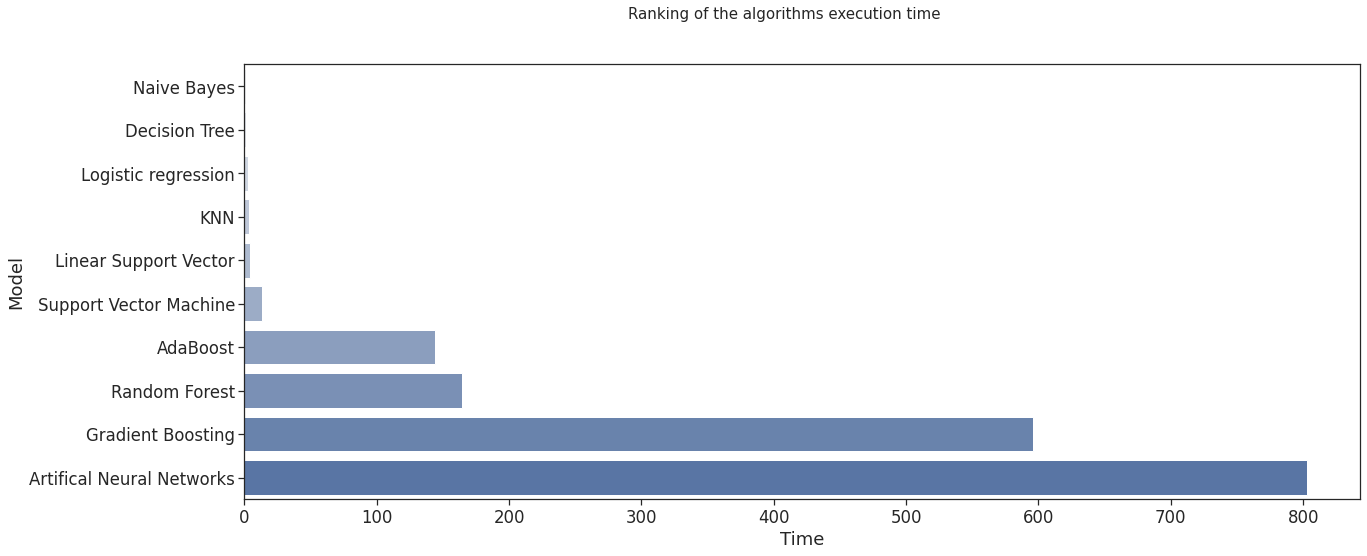

In [ ]:
tableScores = {'Model': ['Naive Bayes', 'KNN', 'Logistic regression',
                                  'Decision Tree', 'Artifical Neural Networks',
                       'Support Vector Machine', 'Linear Support Vector', 'Random Forest' , 'Gradient Boosting', 'AdaBoost'],
                       'Time': [difnb, difknn, diflr, difdt, difann, 
                                difsvm, difsvc, difrf, difgb, difab ]}

dfScores = pd.DataFrame(tableScores)
dfScores['Ranking'] = dfScores['Time'].rank(ascending=1)
dfScores = dfScores.set_index('Ranking')
dff = dfScores.sort_index()
print(dff)

dfScores['Time'] = dfScores['Time'].astype("timedelta64[ms]").astype("int64")/1000
plt.figure(figsize=(20, 8))
plt.suptitle('Ranking of the algorithms execution time', fontsize=15)
sns.barplot(x=dfScores['Time'], y=dfScores['Model'], data=pd.melt(dfScores), orient = "h", order=dfScores.sort_values('Time').Model, palette="light:b")
plt.show()

### Smote

                          Model                   Time
Ranking                                               
1.0                 Naive Bayes 0 days 00:00:01.468226
2.0               Decision Tree 0 days 00:00:02.737526
3.0         Logistic regression 0 days 00:00:03.852309
4.0         K-Nearest Neighbors 0 days 00:00:07.411837
5.0       Linear Support Vector 0 days 00:00:10.711161
6.0      Support Vector Machine 0 days 00:01:35.197501
7.0                    AdaBoost 0 days 00:07:13.274787
8.0               Random Forest 0 days 00:08:39.215964
9.0           Gradient Boosting 0 days 00:16:59.068001


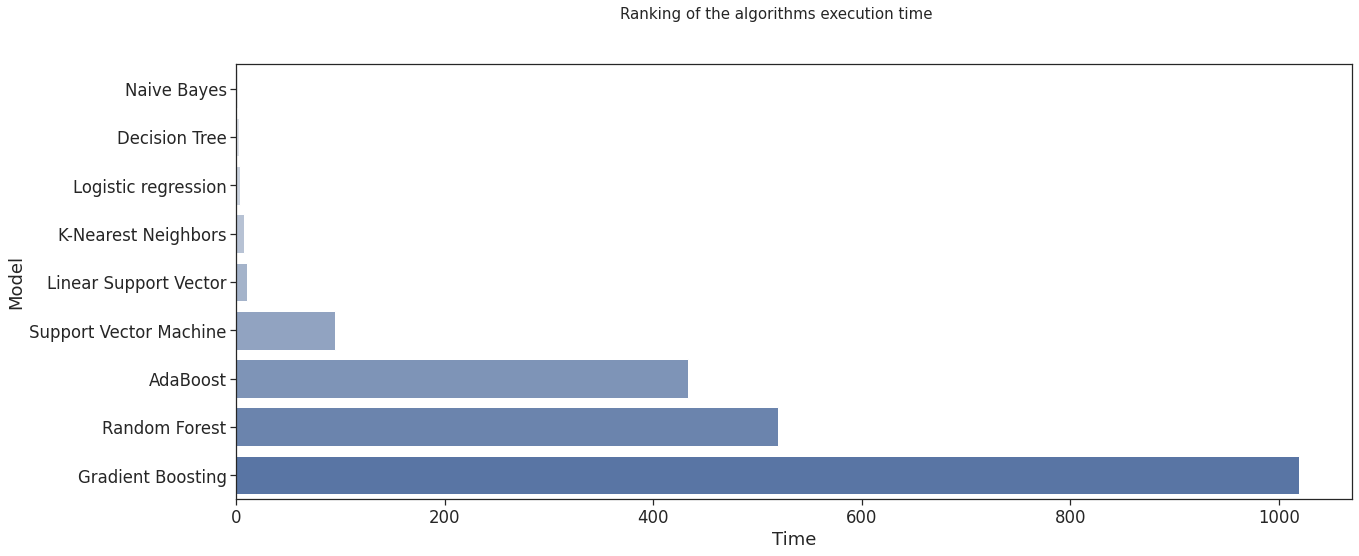

In [ ]:
tableScores_smote = {'Model': ['Naive Bayes', 'K-Nearest Neighbors', 'Logistic regression',
                                  'Decision Tree', 'Artifical Neural Networks',
                               'Support Vector Machine', 'Linear Support Vector', 
                               'Random Forest' , 'Gradient Boosting', 'AdaBoost'],
                       'Time': [difnb_s, difknn_s, diflr_s, difdt_s, difann_s, 
                                difsvm_s, difsvc_s, difrf_s, difgb_s, difab_s]}

dfScores_smote = pd.DataFrame(tableScores_smote)
dfScores_smote['Ranking'] = dfScores_smote['Time'].rank(ascending=1)
dfScores_smote = dfScores_smote.set_index('Ranking')
dff = dfScores_smote.sort_index()
print(dff)

dfScores_smote['Time'] = dfScores_smote['Time'].astype("timedelta64[ms]").astype("int64")/1000
plt.figure(figsize=(20, 8))
plt.suptitle('Ranking of the algorithms execution time', fontsize=15)
sns.barplot(x=dfScores_smote['Time'], y=dfScores_smote['Model'], data=pd.melt(dfScores_smote), orient = "h", order=dfScores_smote.sort_values('Time').Model, palette="light:b")
plt.show()

### Oversampling

                          Model                   Time
Ranking                                               
1.0                 Naive Bayes 0 days 00:00:01.258793
2.0               Decision Tree 0 days 00:00:02.198901
3.0         Logistic regression 0 days 00:00:04.270994
4.0         K-Nearest Neighbors 0 days 00:00:05.001803
5.0       Linear Support Vector 0 days 00:00:10.671383
6.0      Support Vector Machine 0 days 00:01:18.835852
7.0                    AdaBoost 0 days 00:06:41.809795
8.0               Random Forest 0 days 00:07:36.402983
9.0           Gradient Boosting 0 days 00:13:48.170894


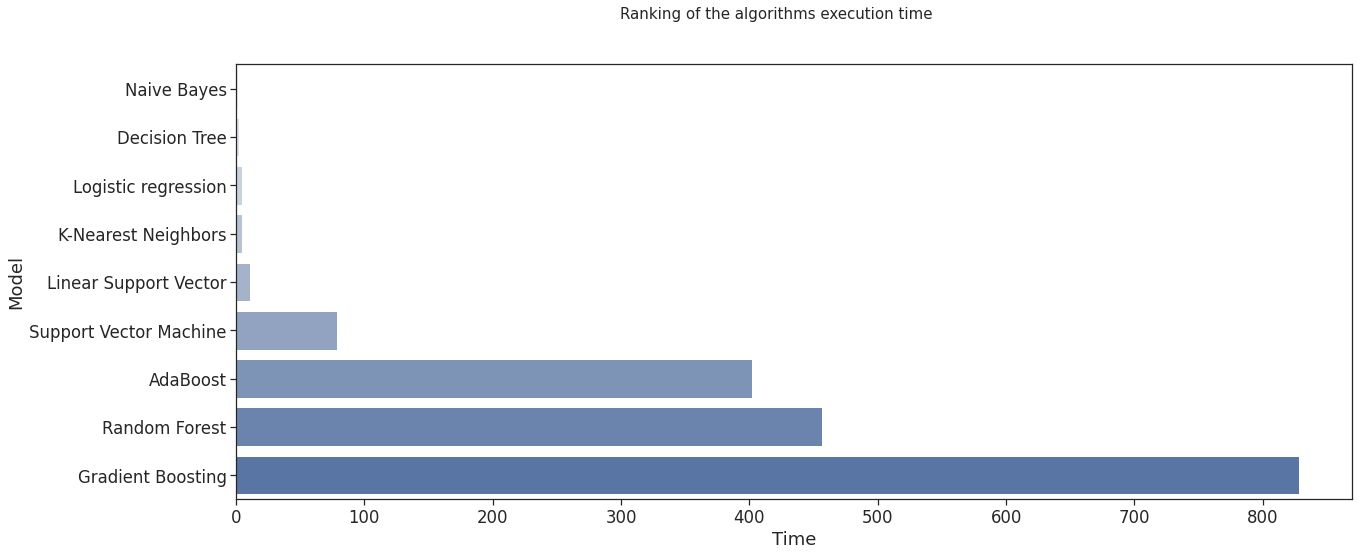

In [ ]:
tableScores_oversampling = {'Model': ['Naive Bayes', 'K-Nearest Neighbors', 'Logistic regression',
                                  'Decision Tree', 'Artifical Neural Networks', 
                         'Support Vector Machine', 'Linear Support Vector',
                         'Random Forest' , 'Gradient Boosting', 'AdaBoost'],
                       'Time': [difnb_o, difknn_o, diflr_o, difdt_o, difann_o, 
                                difsvm_o, difsvc_o, difrf_o, difgb_o, difab_o]}

dfScores_over = pd.DataFrame(tableScores_oversampling)
dfScores_over['Ranking'] = dfScores_over['Time'].rank(ascending=1)
dfScores_over = dfScores_over.set_index('Ranking')
dff = dfScores_over.sort_index()
print(dff)

dfScores_over['Time'] = dfScores_over['Time'].astype("timedelta64[ms]").astype("int64")/1000
plt.figure(figsize=(20, 8))
plt.suptitle('Ranking of the algorithms execution time', fontsize=15)
sns.barplot(x=dfScores_over['Time'], y=dfScores_over['Model'], data=pd.melt(dfScores_over), orient = "h", order=dfScores_over.sort_values('Time').Model, palette="light:b")
plt.show()